<h2 style="text-align: center;"><span style="color: #003300;"><center>Can Loan Be Repayed or Not EDA Analysis</center></span></h2>
<h2 style="text-align: left;"><span style="color: #003300;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #000080;">&nbsp; By</span></span></h2>
<h2 style="text-align: left;"><span style="color: #000080;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Steaphen antony Venansious&nbsp;</span></h2>
<p>&nbsp;</p>
<p><strong><span style="color: #000080;">Problem Statement<br />Analyze loan application at the time of application to identify applicants who are capable&nbsp;of repaying loan and if not&nbsp; are rejected<br />&bull; The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent<br />credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Consumer<br />finance company which specializes in lending various types of loans to urban customers have to use EDA to<br />analyze the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are<br />not rejected.<br />&bull; EDA to understand how consumer attributes and loan attributes influence the tendency to default.</span></strong></p>

In [1]:
# Group Case Study EDA Upgrad 
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re

# Import seaborn for advanced visulization in Phython for the assigment on Upgrad group case study
import seaborn as sns
print('seaborn version\t:',sns.__version__)
pd.options.mode.chained_assignment = None 
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', 100) # 

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
import os, sys
import warnings
warnings.filterwarnings('ignore') # to ingnore warnings in the output which is not that importnt for the assigment EDA


numpy version	: 1.16.2
pandas version	: 0.24.2
seaborn version	: 0.9.0


In [2]:
#Create DataFrame

df_application = pd.read_csv(r"C:\application_data.csv",dtype='object')
print(df_application.shape)

(307511, 122)


In [3]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08303696739132256,0.2629485927471776,0.13937578009978951,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,...,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003540999999999999,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3112673113812225,0.6222457752555098,NaN,0.0959,0.0529,0.9851,0.7959999999999999,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559120833904428,0.7295666907060153,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.6504416904014653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,

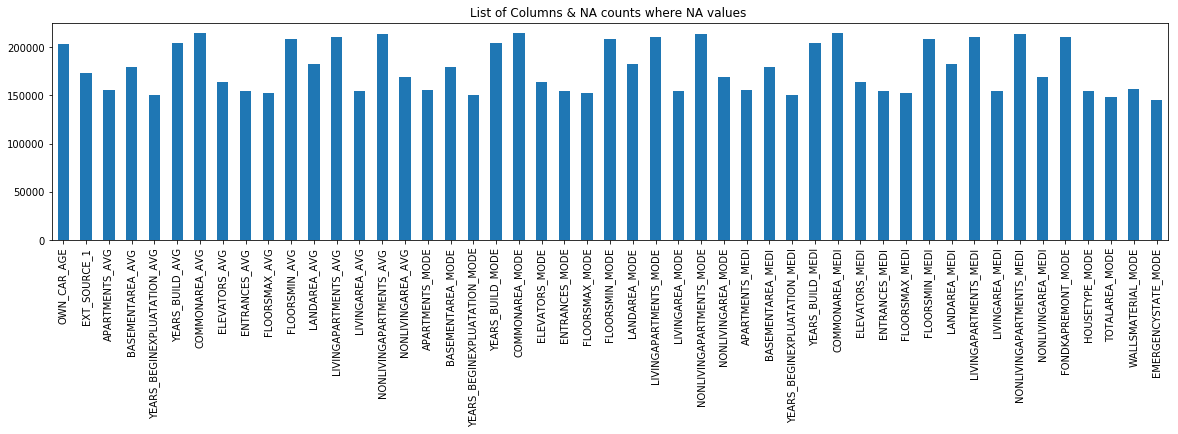

In [4]:
# Find out Columns with more than 40% Data missing
NA_col = df_application.isnull().sum()
NA_col = NA_col[NA_col.values >(0.4*len(df_application))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values ')
plt.show()

In [5]:
#Function for removing columns or rows based on precentage missing data

def removeNulls(dataframe, axis =1, percent=0.3):
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [6]:
#Remove columns with more than 40% Data missing
df_application_fil = removeNulls(df_application, axis =1,percent = 0.4)

Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [7]:
df_application_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     307511 non-null object
TARGET                         307511 non-null object
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null object
AMT_INCOME_TOTAL               307511 non-null object
AMT_CREDIT                     307511 non-null object
AMT_ANNUITY                    307499 non-null object
AMT_GOODS_PRICE                307233 non-null object
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIV

In [8]:
#Convert numerical columns datatype

object_cols=['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
cols = df_application_fil.columns.drop(object_cols)
df_application_fil[cols] = df_application_fil[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
df_application_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     307511 non-null object
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELAT

In [10]:
df_application_fil.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.5559,0.7296,0.0000,0.0000,0.0000,0.0000,-815.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,-19005,-3039,-9833.0000,-2437,1,1,0,1,0,0,Laborers,2.0000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.6504,nan,2.0000,0.0000,2.0000,0.0000,-617.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,-19932,-3038,-4311.0000,-3458,1,1,0,1,0,0,Core staff,1.0000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.3227,nan,0.0000,0.0000,0.0000,0.0000,-1106.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [11]:
#Check for imbalance for the traget variable 
df_application_fil['TARGET'].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
#Imabalance Ratio
round((len(df_application_fil.loc[(df_application_fil['TARGET']==1)])/len(df_application_fil.loc[(df_application_fil['TARGET']==0)]))*100,2)

8.78

There is an 8.78% data imbalance

In [13]:
#List of numerical columns
num_cols=df_application_fil.select_dtypes(include=[np.int,np.float]).columns.tolist()

In [14]:
#BOx plot for columns which could possibly have outliers
df_application_fil.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307509.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,306851.0000,246546.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,0.0807,0.4171,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-16036.9951,63815.0459,-4986.1203,-2994.2024,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,2.1527,2.0525,2.0315,12.0634,0.0151,0.0508,0.0407,0.0782,0.2305,0.1796,0.5144,0.5109,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0000,0.7100,0.0001,0.0151,0.0881,0.0002,0.0814,0.0039,0.0000,0.0039,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,0.2724,0.7221,237123.1463,402490.7770,14493.7373,369446.4605,0.0138,4363.9886,141275.7665,3522.8863,1509.4504,0.0018,0.3843,0.3995,0.0432,0.4495,0.2313,0.9107,0.5090,0.5027,3.2658,0.1221,0.2195,0.1975,0.2684,0.4211,0.3838,0.1911,0.1948,2.4010,0.4467,2.3798,0.3623,826.8085,0.0065,0.4538,0.0090,0.1220,0.2834,0.0139,0.2734,0.0623,0.0048,0.0624,0.0026,0.0593,0.0541,0.0348,0.0991,0.0163,0.0898,0.0244,0.0225,0.0183,0.0838,0.1108,0.2047,0.9160,0.7941,1.8693
min,0.0000,0.0000,25650.0000,45000.0000,1615.5000,40500.0000,0.0003,-25229.0000,-17912.0000,-24672.0000,-7197.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,-4292.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,112500.0000,270000.0000,16524.0000,238500.0000,0.0100,-19682.0000,-2760.0000,-7479.5000,-4299.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.0000,2.0000,2.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3925,0.3706,0.0000,0.0000,0.0000,0.0000,-1570.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,147150.0000,513531.0000,24903.0000,450000.0000,0.0188,-15750.0000,-1213.0000,-4504.0000,-3254.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.0000,2.0000,2.0000,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5660,0.5353,0.0000,0.0000,0.0000,0.0000,-757.0000,0.0000,1.0000,0.

Columns that seem to have outliers looking at the mean and max value seem to CNT_Children and AMT_INCOME_TOTAL<br>
Days Employed also can not have positive values



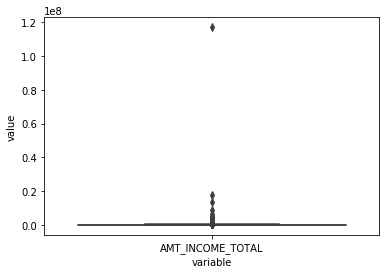

In [15]:
#Lets look at the box plot for these columns
sns.boxplot(x="variable", y="value", data=pd.melt(df_application_fil[['AMT_INCOME_TOTAL']]))

clearly value of around 12000K in the income column is an outlier 

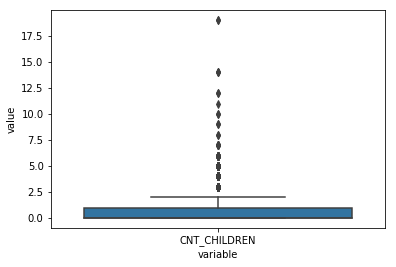

In [16]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_application_fil[['CNT_CHILDREN']]))

19 Children could possibly be an outlier

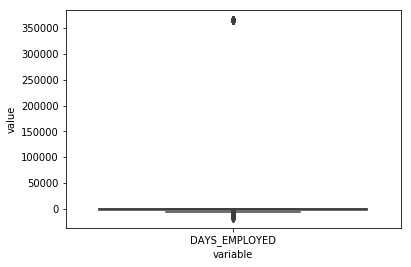

In [17]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_application_fil[['DAYS_EMPLOYED']]))

Days employed has to be negative values, so these high positive values are outliers

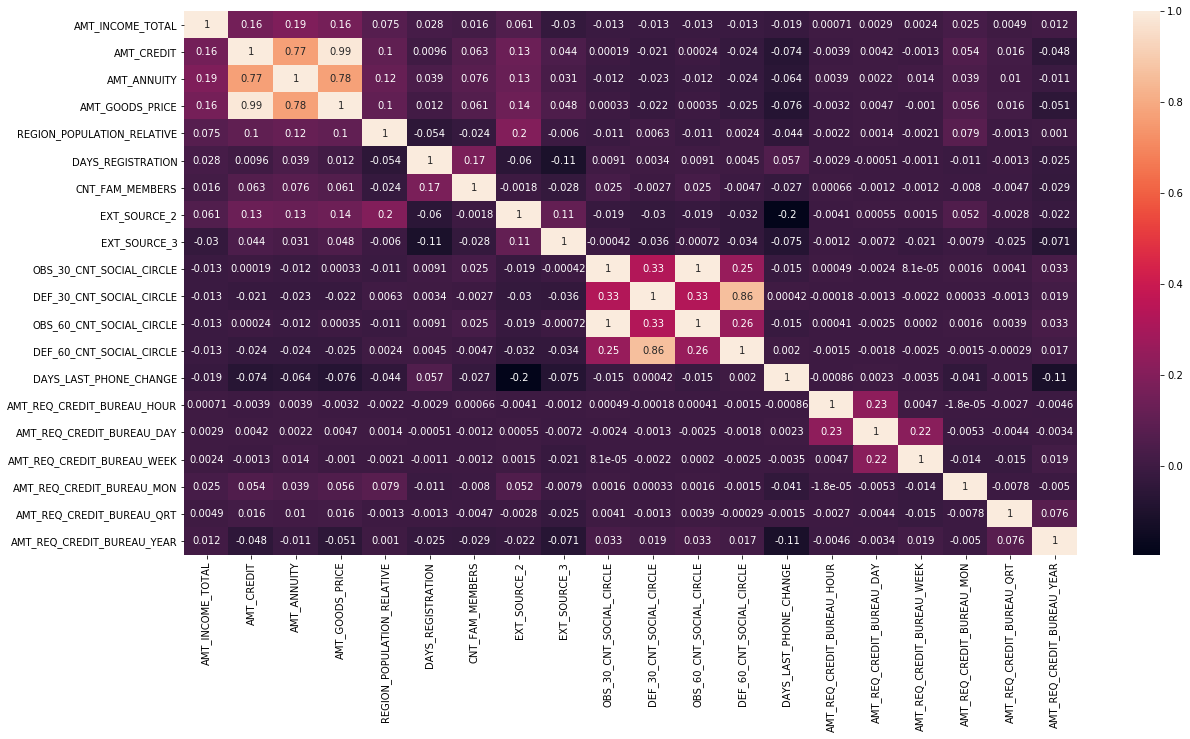

In [18]:
#Lets look at correlation so that we can discard highly correlated columns and reduce the number of columns to be analy

plt.figure(figsize=(20,10))
sns.heatmap(df_application_fil[num_cols].corr(method='pearson'), annot=True)

High correlation between amt credited, annuity and goods price.<br>
DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE have high correlation so we can analyse only one of them<br>
OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE have high correlation so we can analyse only one of them

****Univariant Analysis****<br>
Lets first look at the variables/columns in our data set

In [19]:
#Plots bars charts for categorical columns
def uniCatPLOT(df,col):
    ax = df[col].value_counts().plot(kind='bar', title =col,figsize=(25,10), fontsize=12)
    for nr, p in enumerate(ax.patches):
        # height of bar, which is basically the data value
        height = p.get_height() 

        # add text to specified position
        ax.text(
        # bar to which data label will be added 
        # so this is the x-coordinate of the data label
        nr, 

        # height of data label: height / 2. is in the middle of the bar
        # so this is the y-coordinate of the data label
        height, 

        # formatting of data label
        u'{:0.0f}'.format(height), 

        # color of data label
        color='black', 

        # size of data label
        fontsize=12, 

        # horizontal alignment: possible values are center, right, left
        ha='center', 

        # vertical alignment: possible values are top, bottom, center, baseline
        va='bottom'
        )

    plt.show()

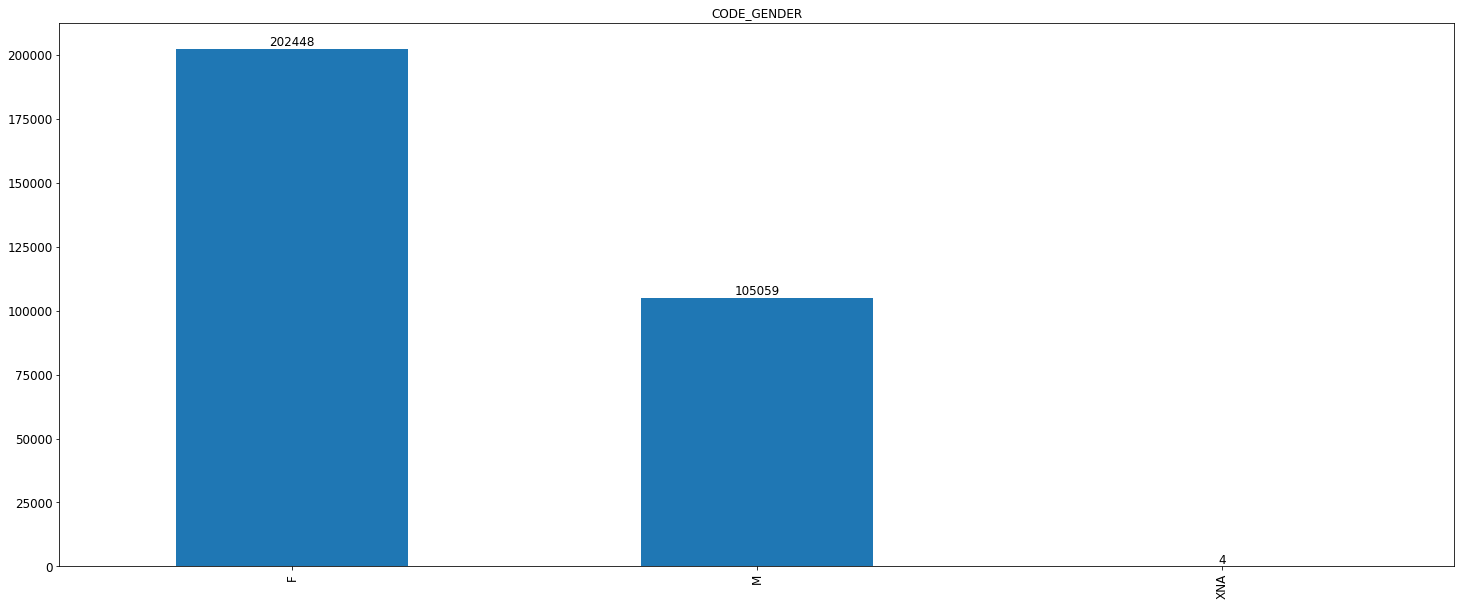

In [20]:
uniCatPLOT(df_application_fil,"CODE_GENDER")
    

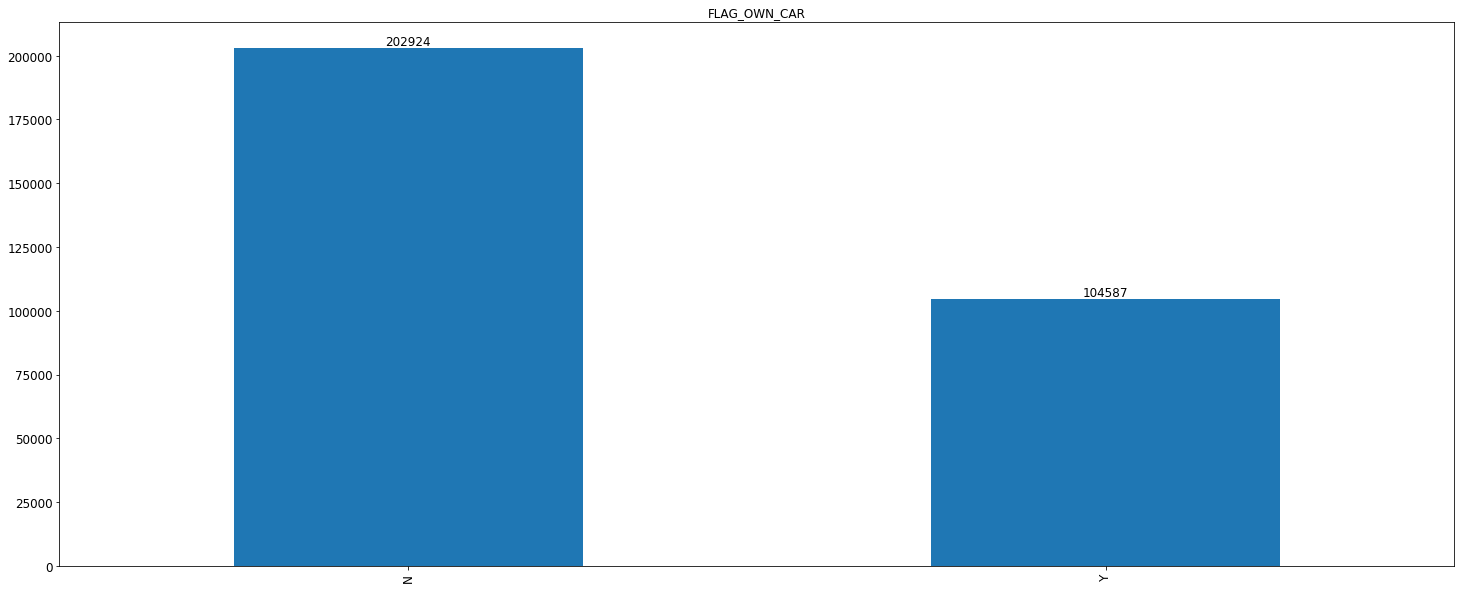

In [21]:
uniCatPLOT(df_application_fil,"FLAG_OWN_CAR")

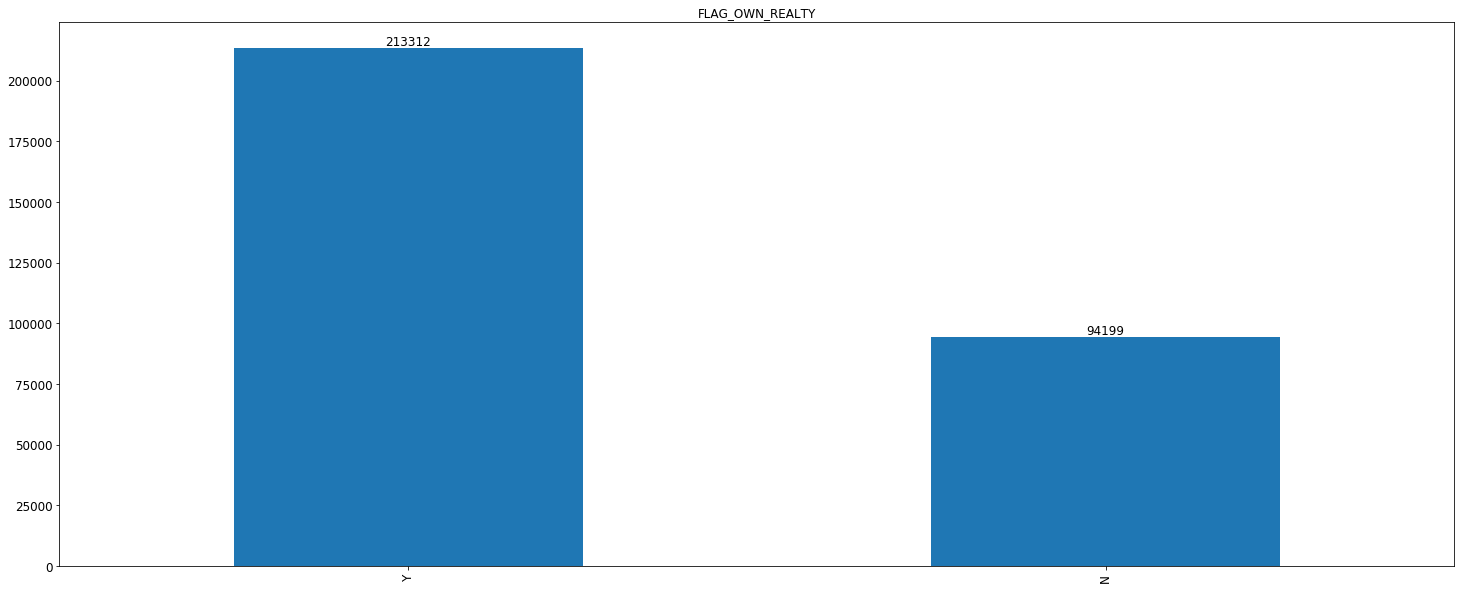

In [22]:
uniCatPLOT(df_application_fil,"FLAG_OWN_REALTY")

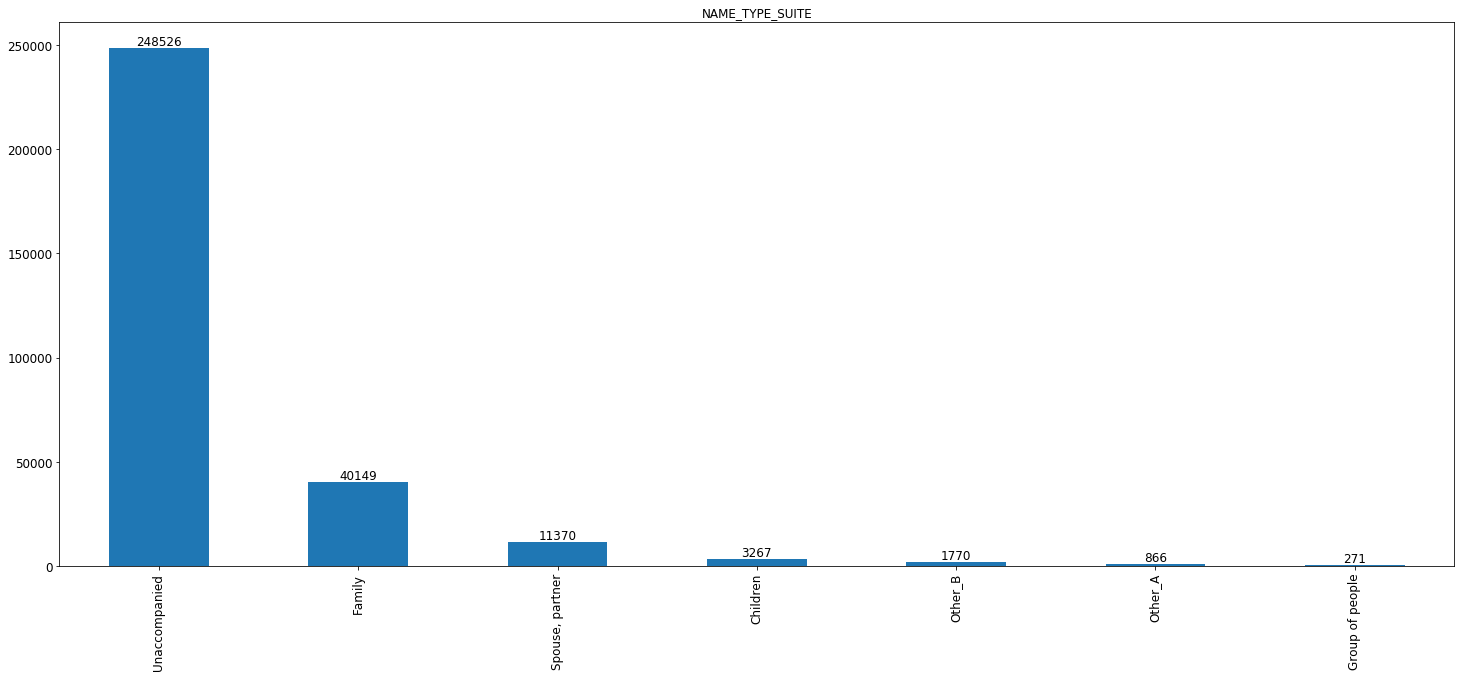

In [23]:
uniCatPLOT(df_application_fil,"NAME_TYPE_SUITE")

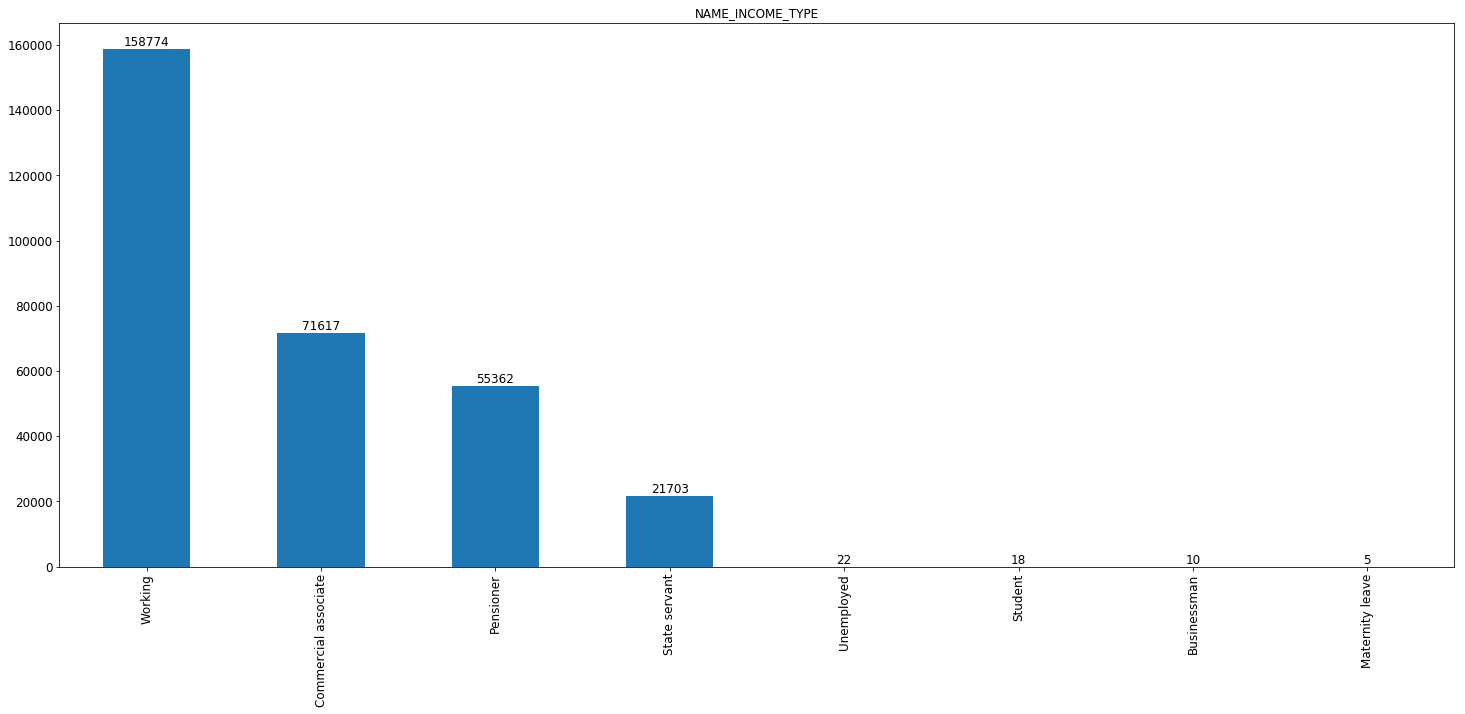

In [24]:
uniCatPLOT(df_application_fil,"NAME_INCOME_TYPE")

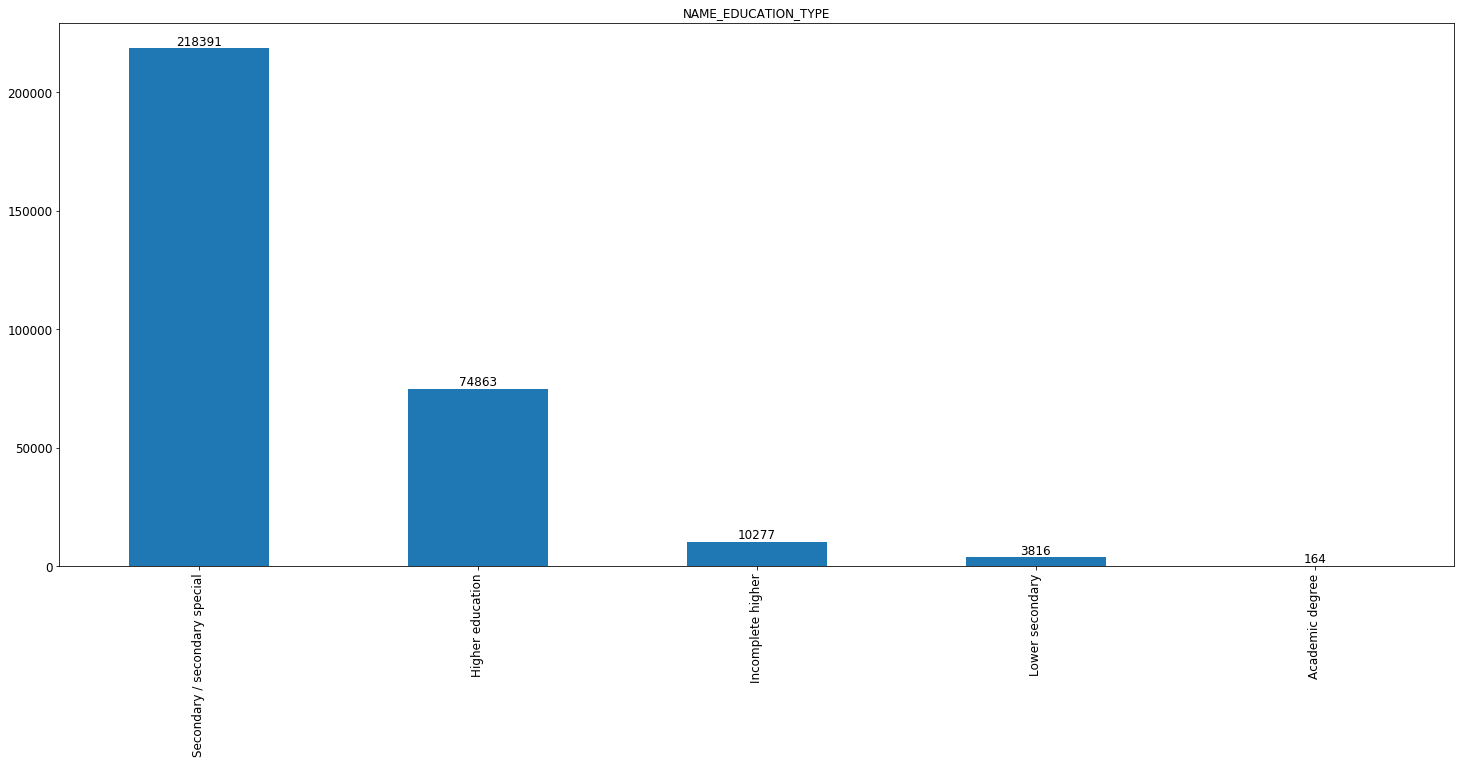

In [25]:
uniCatPLOT(df_application_fil,"NAME_EDUCATION_TYPE")

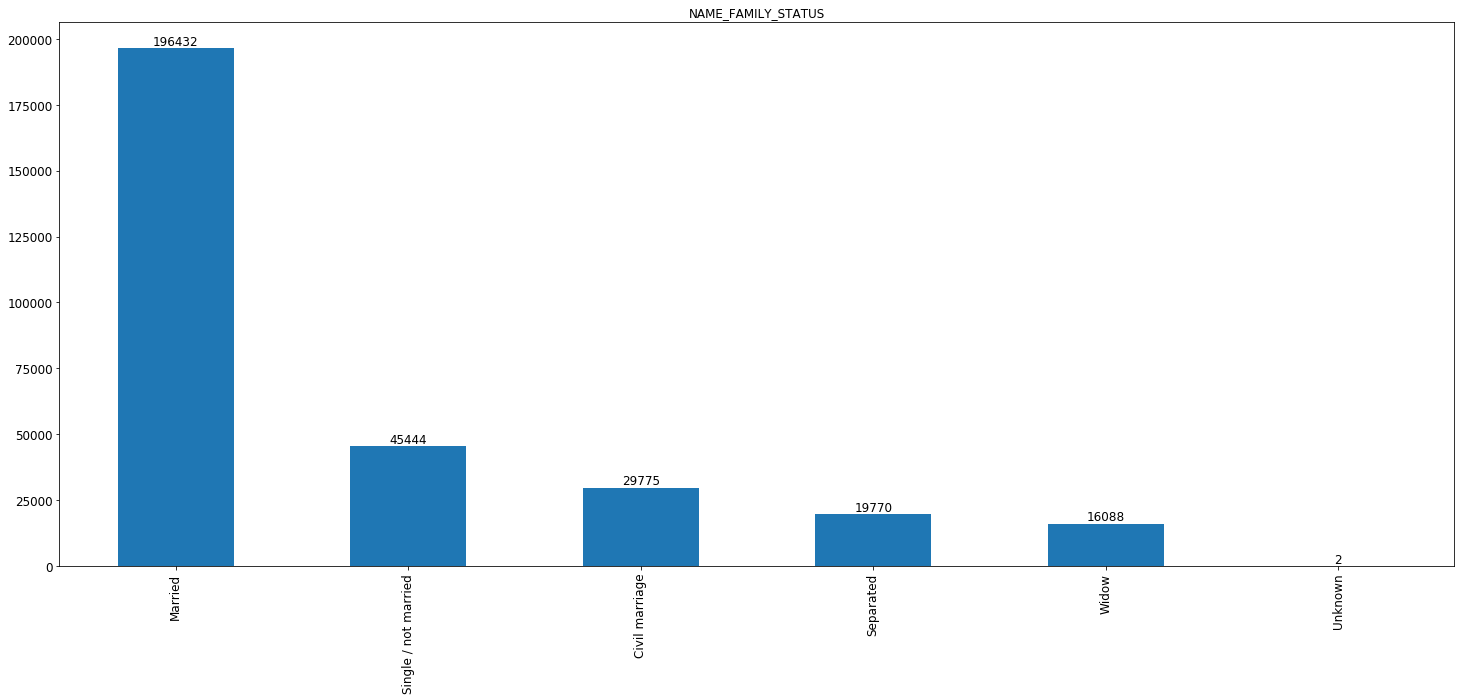

In [26]:
uniCatPLOT(df_application_fil,"NAME_FAMILY_STATUS")

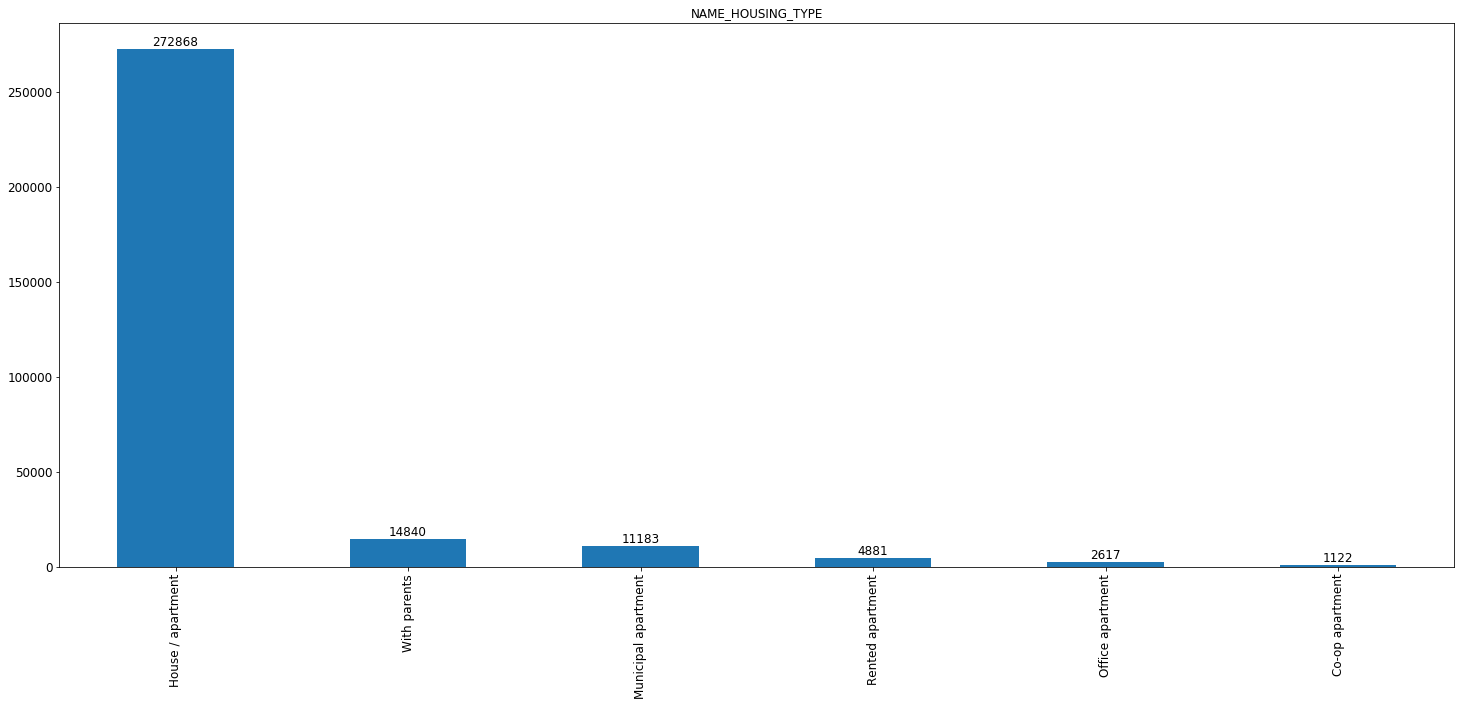

In [27]:
uniCatPLOT(df_application_fil,"NAME_HOUSING_TYPE")

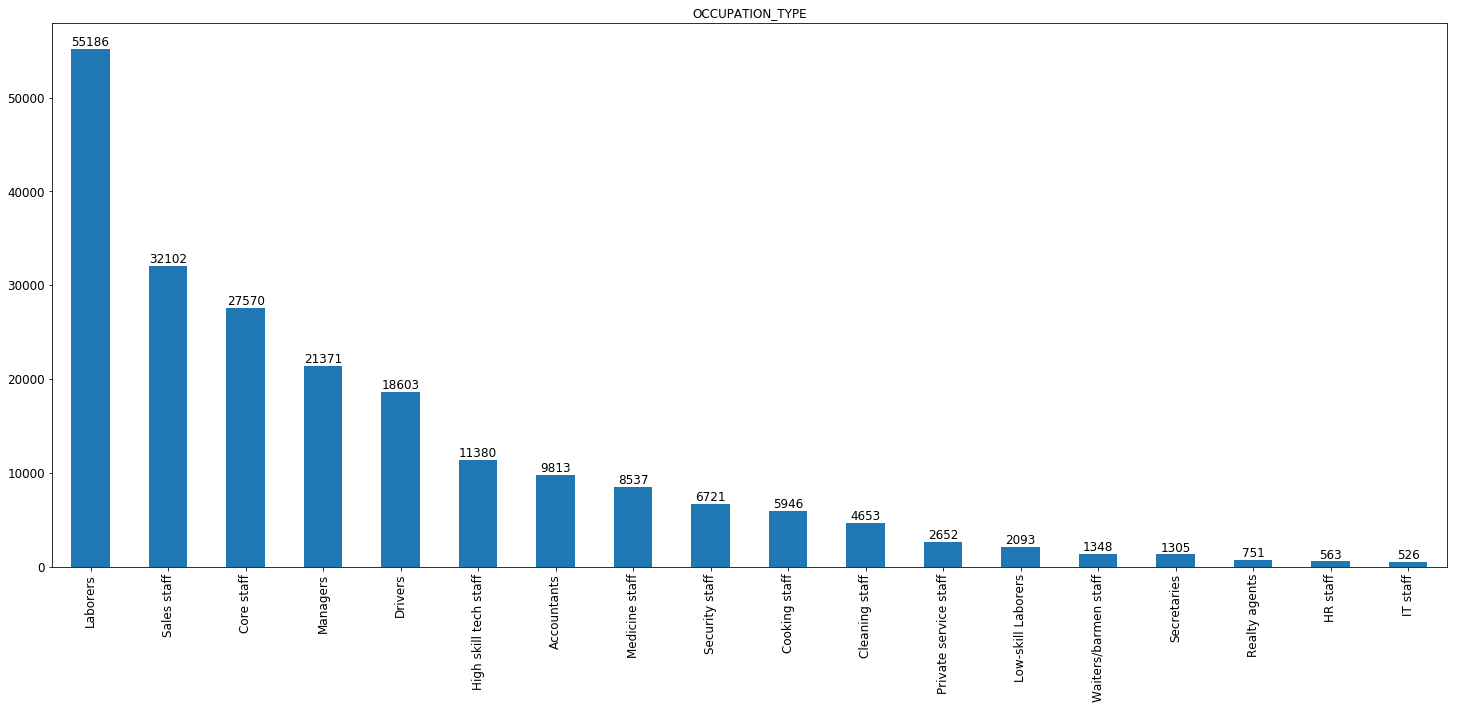

In [28]:
uniCatPLOT(df_application_fil,"OCCUPATION_TYPE")

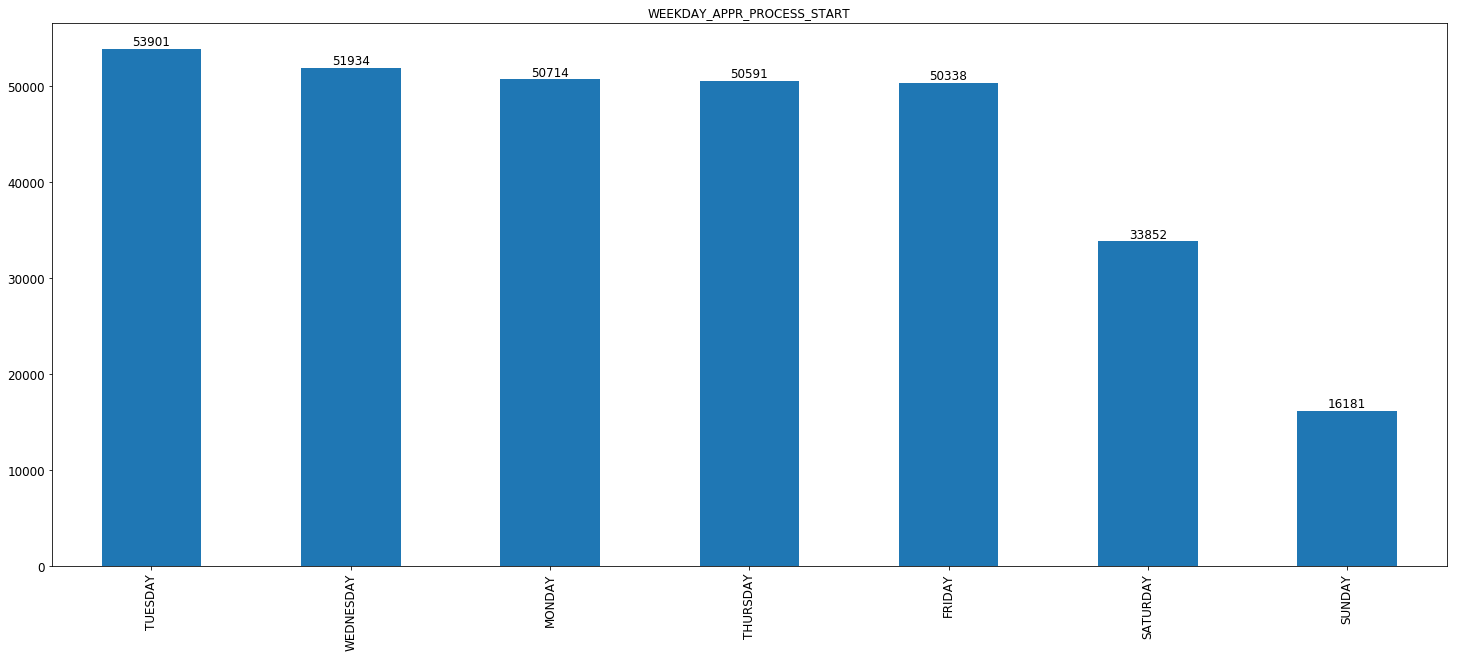

In [29]:
uniCatPLOT(df_application_fil,"WEEKDAY_APPR_PROCESS_START")

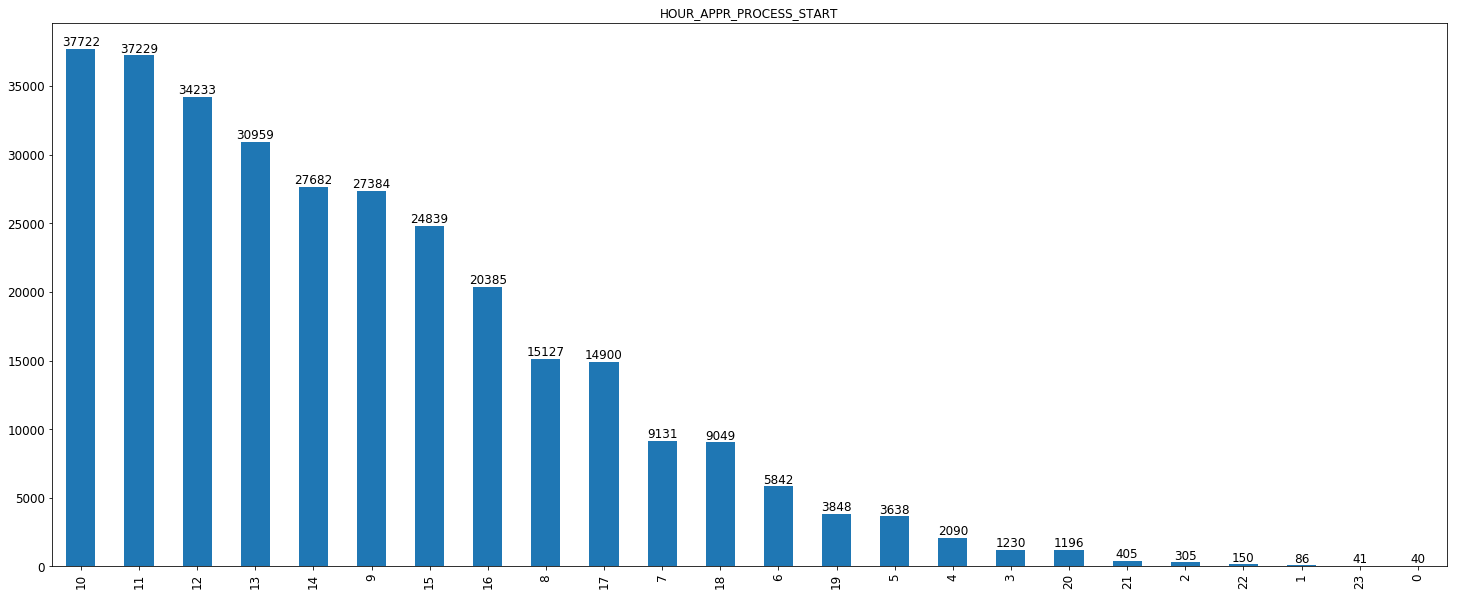

In [30]:
uniCatPLOT(df_application_fil,"HOUR_APPR_PROCESS_START")

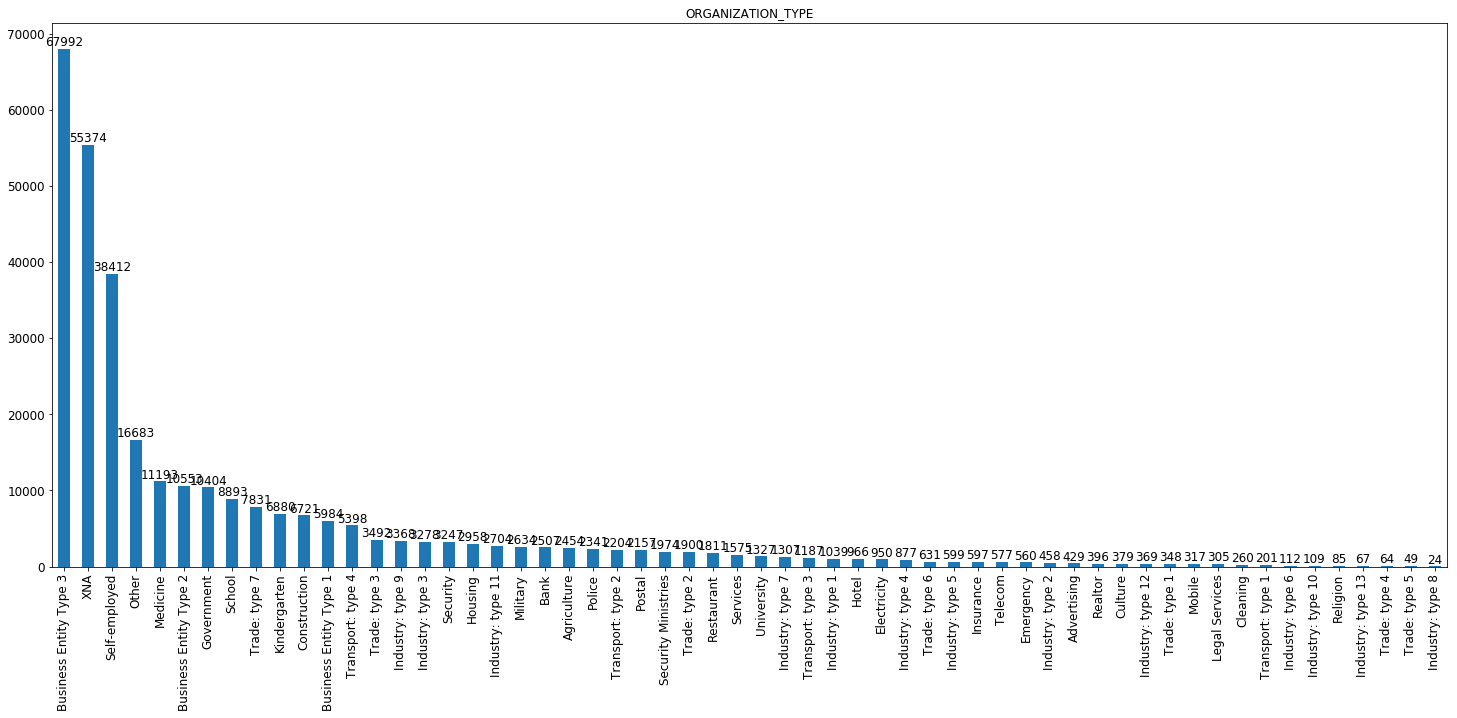

In [31]:
uniCatPLOT(df_application_fil,"ORGANIZATION_TYPE")

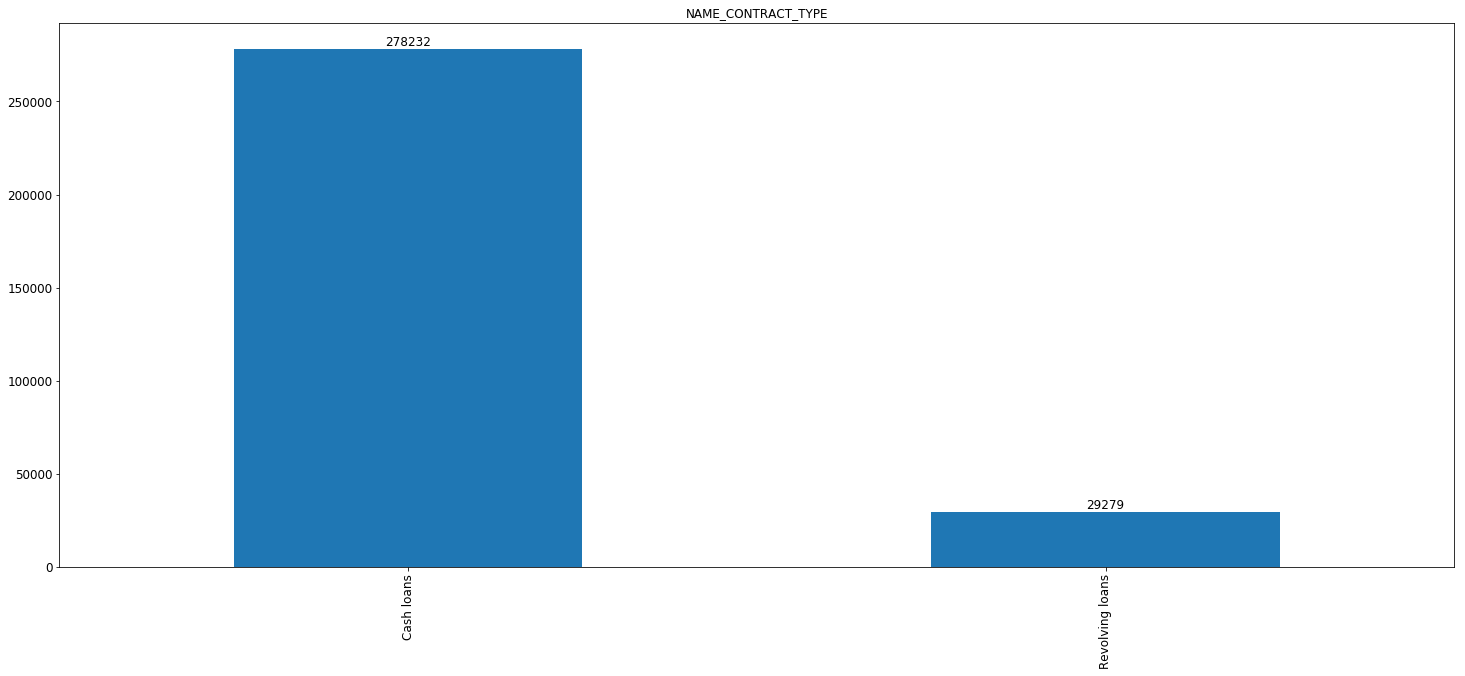

In [32]:
uniCatPLOT(df_application_fil,"NAME_CONTRACT_TYPE")

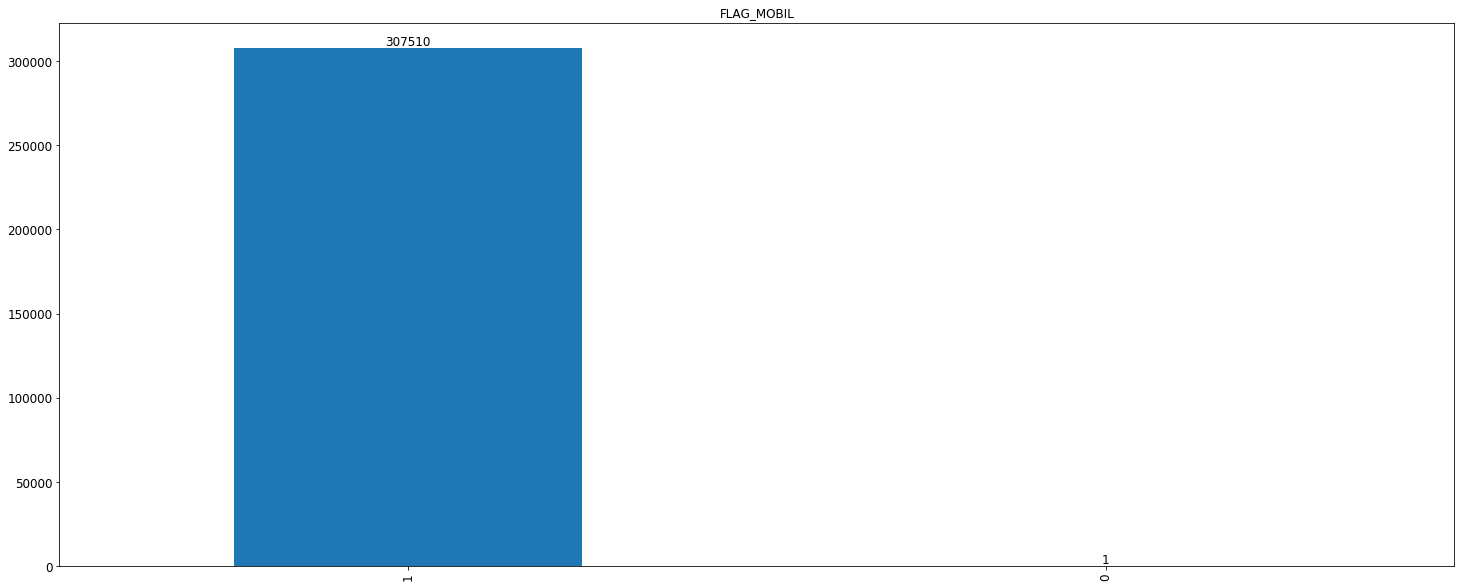

In [33]:
uniCatPLOT(df_application_fil,"FLAG_MOBIL")

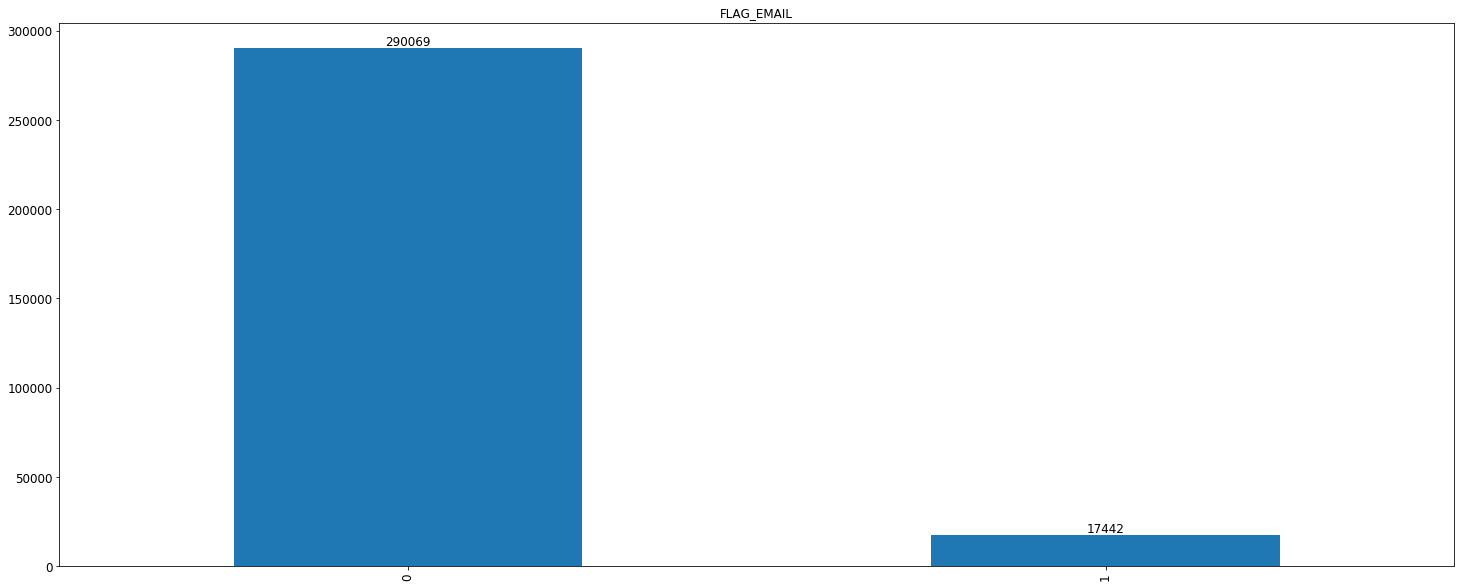

In [34]:
uniCatPLOT(df_application_fil,"FLAG_EMAIL")

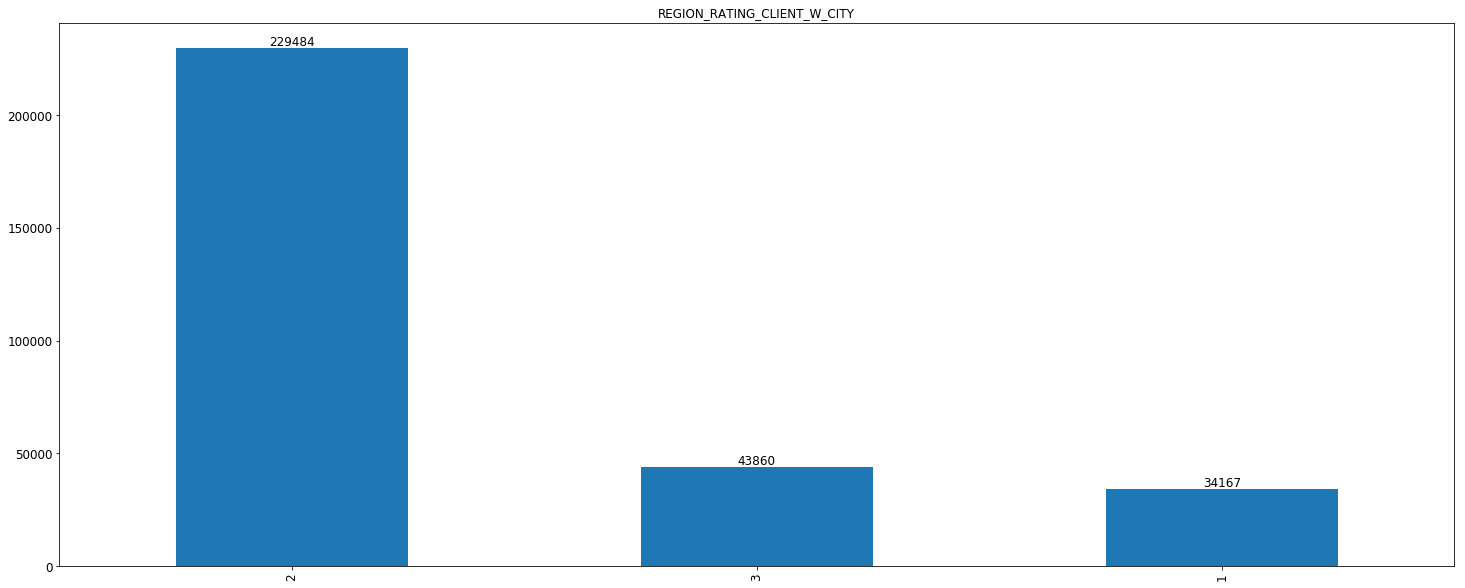

In [35]:
uniCatPLOT(df_application_fil,"REGION_RATING_CLIENT_W_CITY")

Lets look at Univariate analysis for numerical variables

In [36]:
# Lets look at Univariate analysis for numerical variables
#Start with count of children
def Children_Bin(x):
    if x < 1:
        return "No children"
    elif x < 2:
        return "One child"
    elif x < 3:
        return "Two children"
    elif x < 6:
        return "3-5 children"
    return "More than 5 children"

df_application_fil['number_children'] = df_application_fil['CNT_CHILDREN'].apply(lambda x: Children_Bin(x))

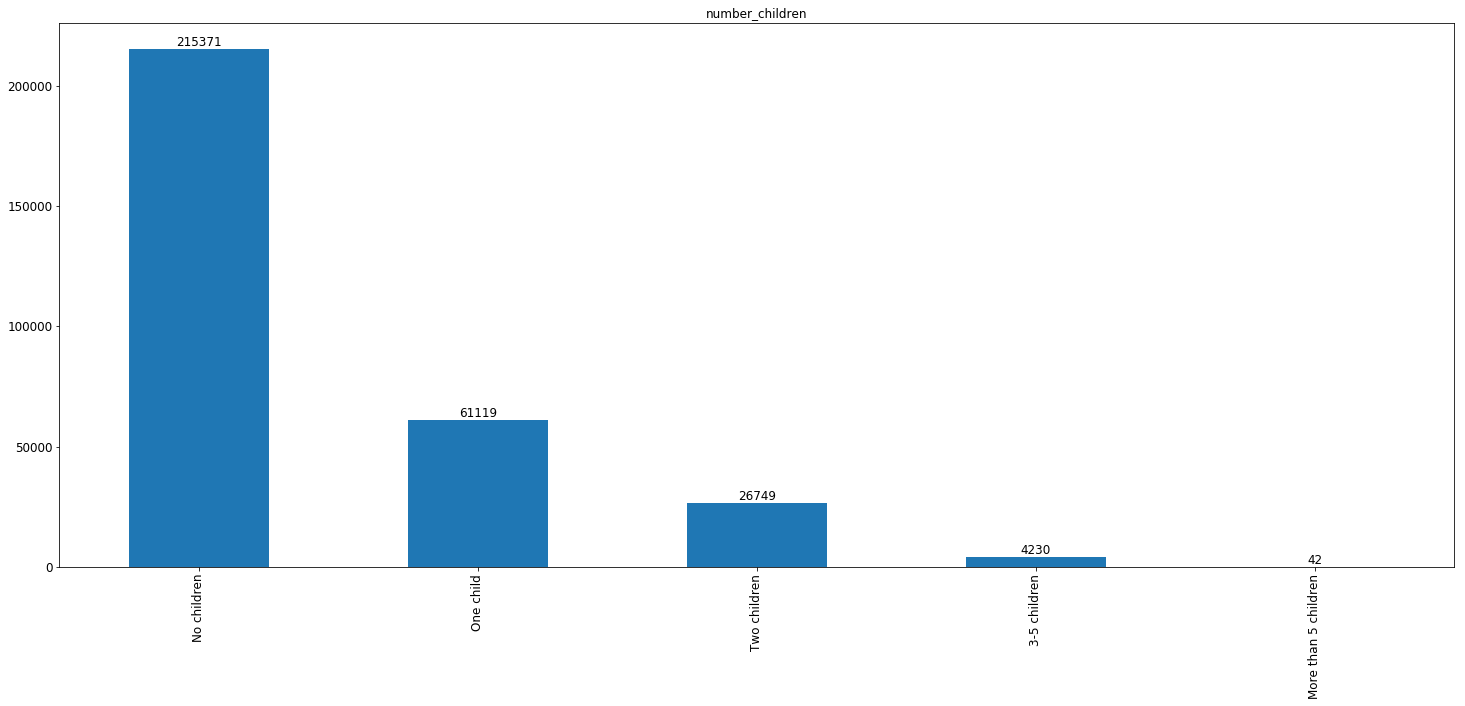

In [37]:
uniCatPLOT(df_application_fil,"number_children")

In [38]:
# AMT_INCOME_TOTAL

def INCOME_TOTAL(x):
    if x < 100000:
        return "Less than One Lac"
    elif x < 200000:
        return "1 to 2 lacs"
    elif x < 500000:
        return "2 to 5 lacs"
    elif x < 100000:
        return "5 to 10 lacs"
    else:
        return "More than 10 lacs"

df_application_fil['AMT_INCOME_TOTAL_BIN'] = df_application_fil['AMT_INCOME_TOTAL'].apply(lambda x: INCOME_TOTAL(x))

In [39]:
df_application_fil['AMT_CREDIT_BIN'] = df_application_fil['AMT_CREDIT'].apply(lambda x: INCOME_TOTAL(x))

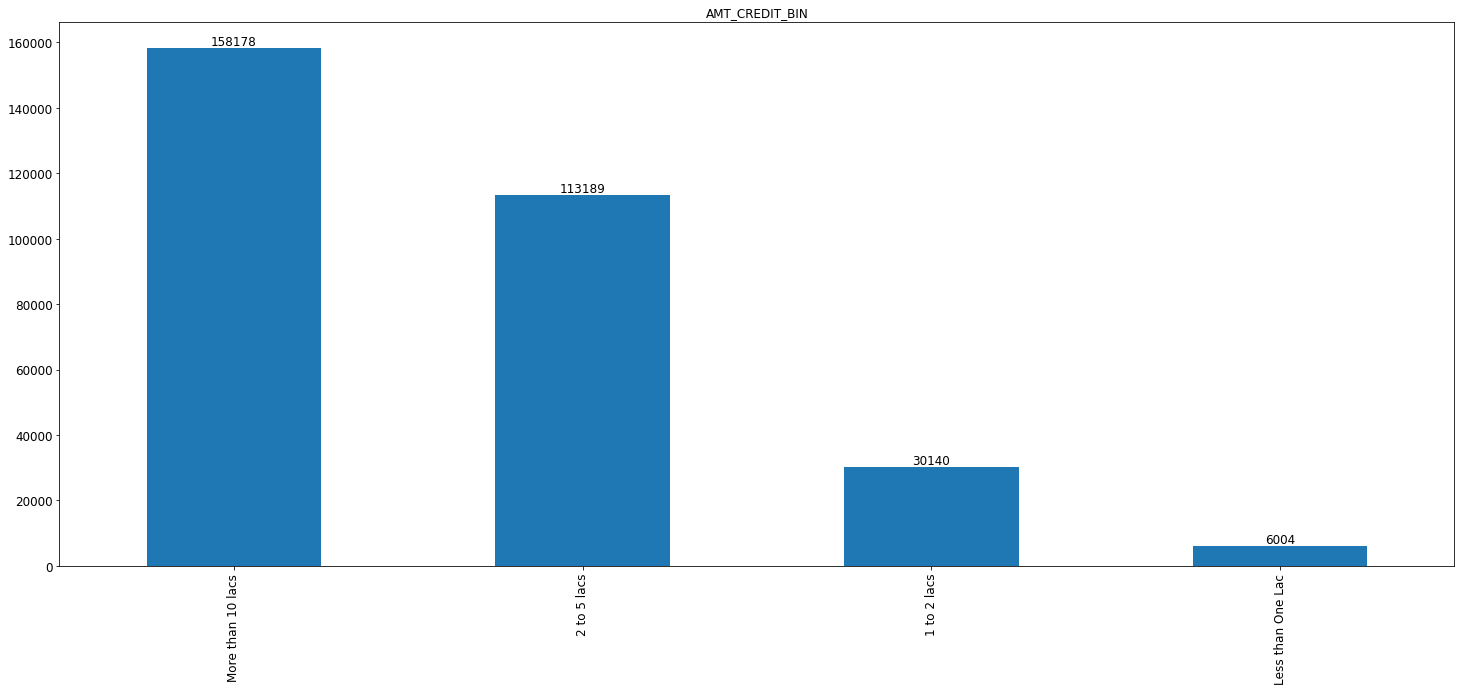

In [40]:
uniCatPLOT(df_application_fil,"AMT_CREDIT_BIN")

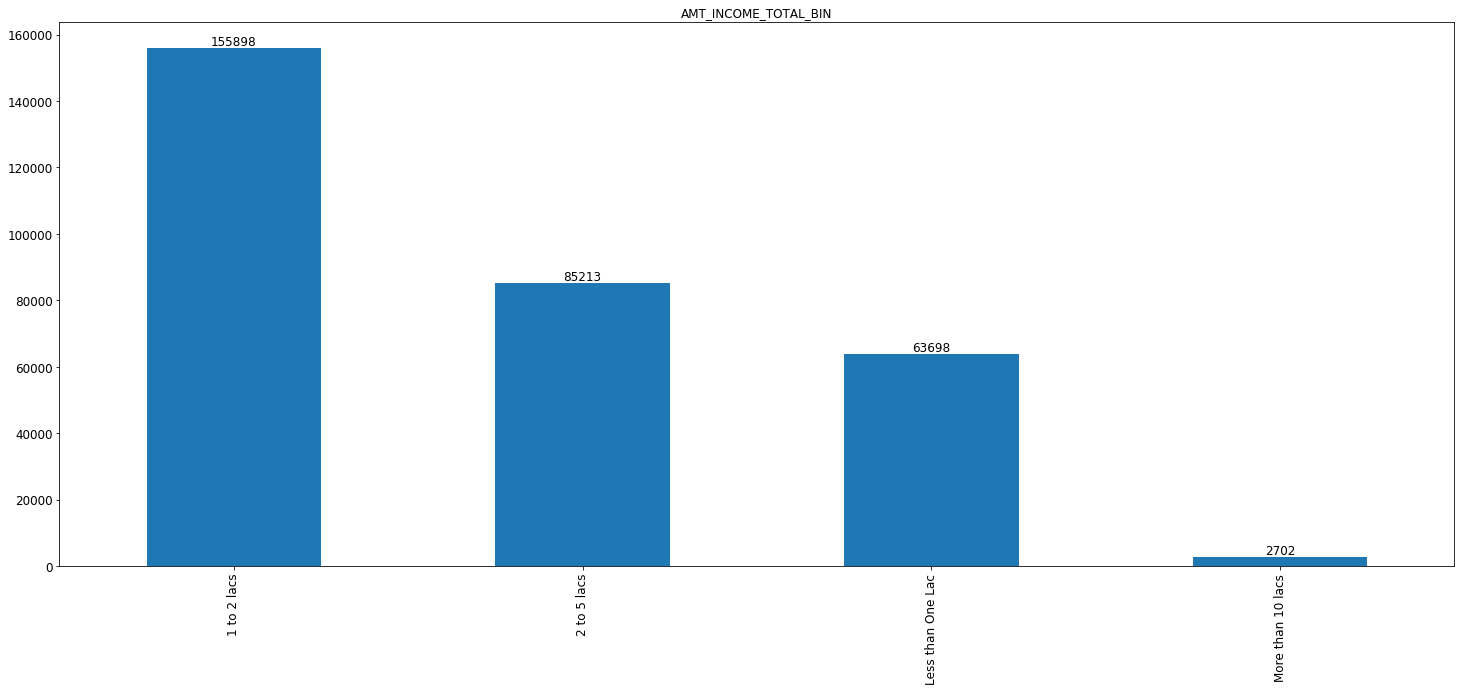

In [41]:
uniCatPLOT(df_application_fil,"AMT_INCOME_TOTAL_BIN")

In [42]:
#Create derivted metrixs
#Precentage of income with respect to the amt credited

df_application_fil["PRECENTAGE_INCOME"]=(df_application_fil["AMT_INCOME_TOTAL"]/df_application_fil["AMT_CREDIT"])*100

In [43]:
bins = [-1, 1, 2, 5, 10, 25, 50, 100]
labels = ["0-1","1-2","2-5","5-10","10-25","25-50","50-100"]
df_application_fil['PRECENTAGE_INCOME_BIN'] = pd.cut(df_application_fil['PRECENTAGE_INCOME'], bins=bins, labels=labels)

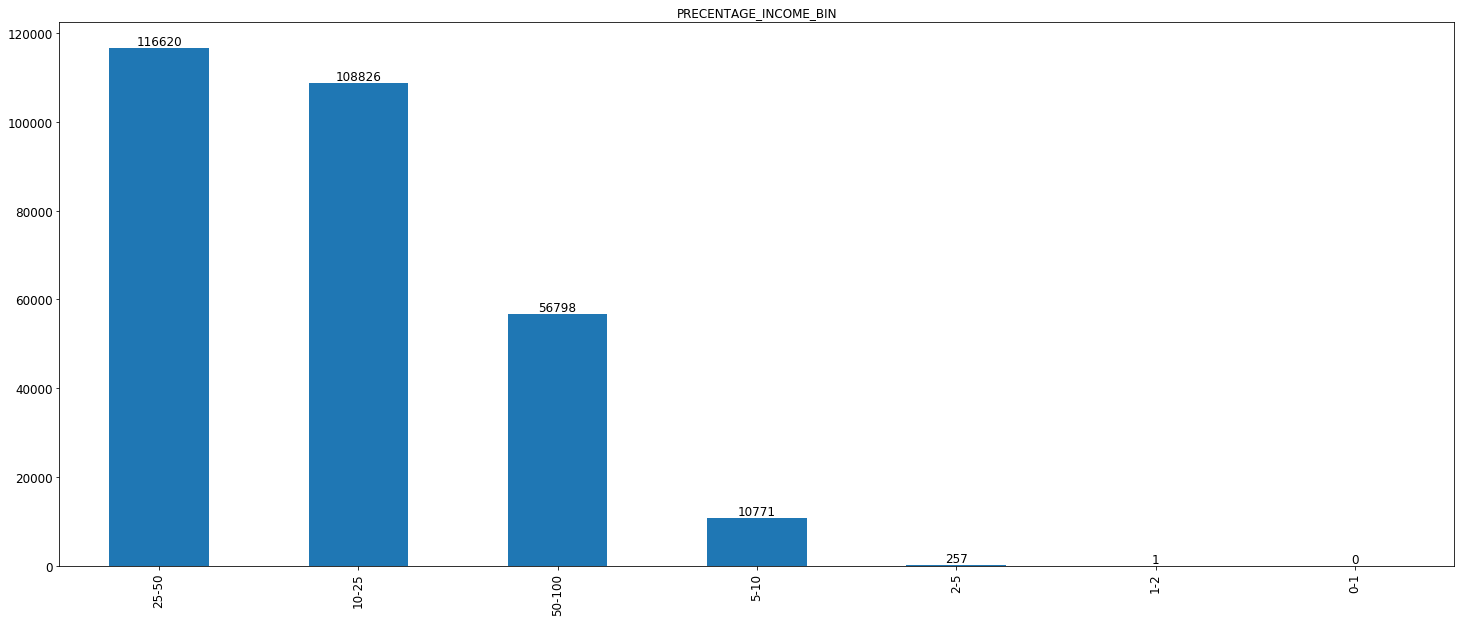

In [44]:
uniCatPLOT(df_application_fil,"PRECENTAGE_INCOME_BIN")

In [45]:
#Create derivted metrixs
#Precentage of Annuity with respect to the Goods Price

df_application_fil["PRECENTAGE_ANNUITY"]=(df_application_fil["AMT_ANNUITY"]/df_application_fil["AMT_GOODS_PRICE"])*100

In [46]:
bins = [-1, 1, 2, 5, 10, 25, 50, 100]
labels = ["0-1","1-2","2-5","5-10","10-25","25-50","50-100"]
df_application_fil['PRECENTAGE_ANNUITY_BIN'] = pd.cut(df_application_fil['PRECENTAGE_ANNUITY'], bins=bins, labels=labels)

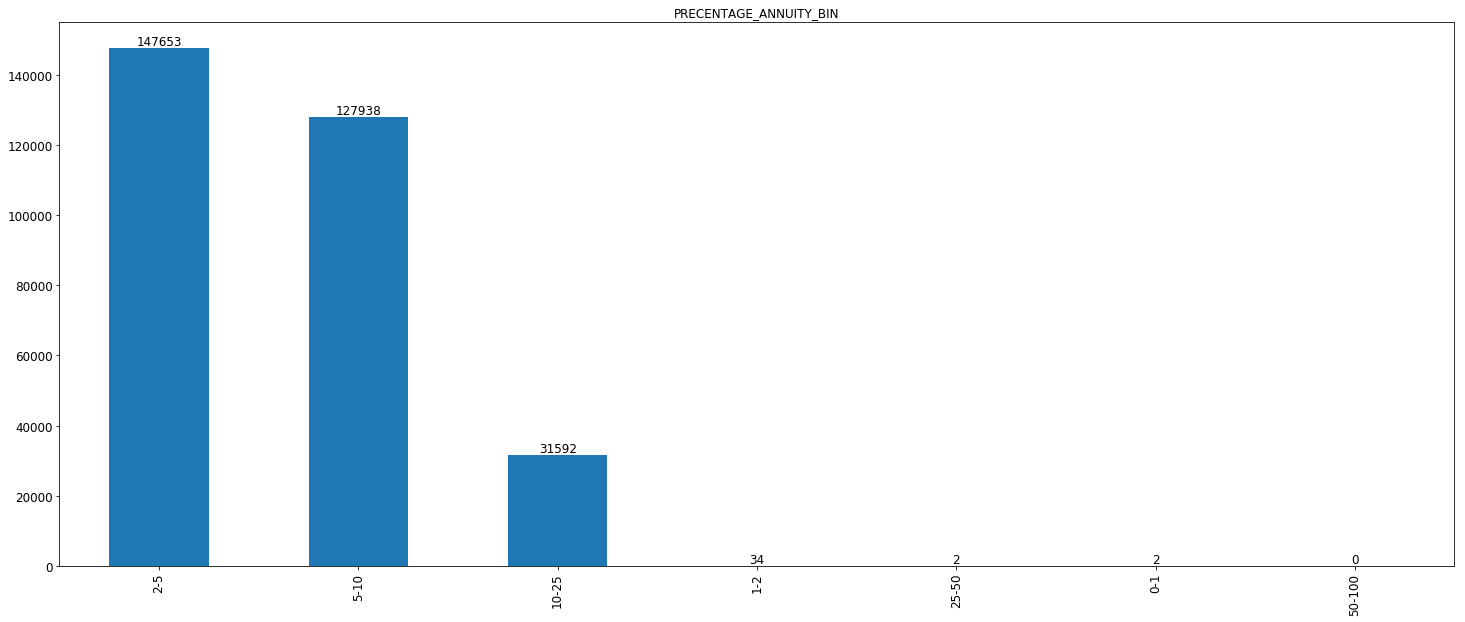

In [47]:
uniCatPLOT(df_application_fil,"PRECENTAGE_ANNUITY_BIN")

In [48]:
# Lets Bin continuous variable REGION_POPULATION_RELATIV to see what kind of areas the loan applicants are from
bins = [-1,0.01,0.02,0.03,0.04,0.06,0.08,0.1]
labels = ["0-0.01","0.01-0.02","0.02-0.03","0.03-0.04","0.04-0.06","0.06-0.08","0.08-0.1"]
df_application_fil['REGION_POPULATION_RELATIVE_BIN'] = pd.cut(df_application_fil['REGION_POPULATION_RELATIVE'], bins=bins, labels=labels)

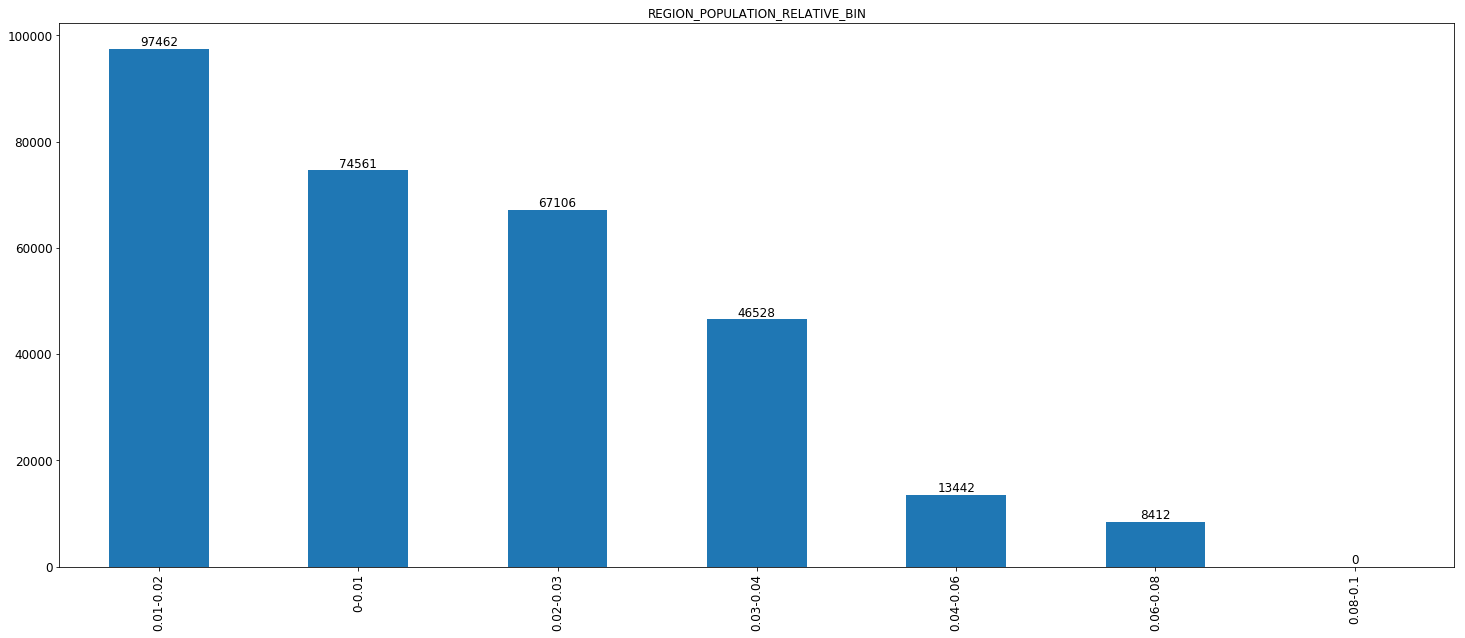

In [49]:
uniCatPLOT(df_application_fil,"REGION_POPULATION_RELATIVE_BIN")

In [50]:
# Lets get an estimate of the age of the applicants based on the days birth
df_application_fil["AGE"]=(df_application_fil["DAYS_BIRTH"]/365)*-1

In [51]:
# Bin the age column to get an understanding of the age distribution
bins = [-1,20,25,30,40,50,60,100]
labels = ["0-20","20-25","25-30","30-40","40-50","50-60","60-100"]
df_application_fil['AGE_BIN'] = pd.cut(df_application_fil['AGE'], bins=bins, labels=labels)

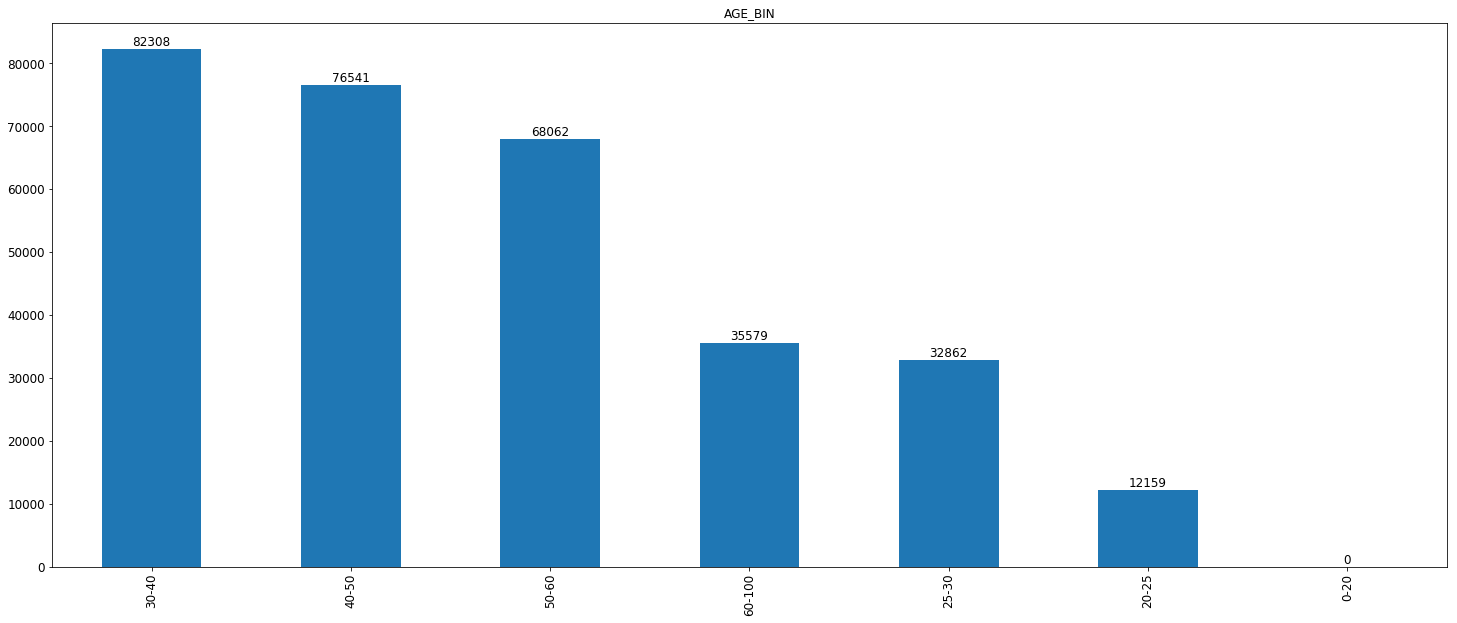

In [52]:
uniCatPLOT(df_application_fil,"AGE_BIN")

In [53]:
#Estimate the months applicant have been working for
df_application_fil["WORKING_MONTHS"]=(df_application_fil["DAYS_EMPLOYED"]/365)*-12

In [54]:
#Bins months working for to get an distribution
bins = [-1,6,12,24,36,72]
labels = ["0-6","6-12","12-24","24-36","36-72"]
df_application_fil['WORKING_MONTHS_BIN'] = pd.cut(df_application_fil['WORKING_MONTHS'], bins=bins, labels=labels)

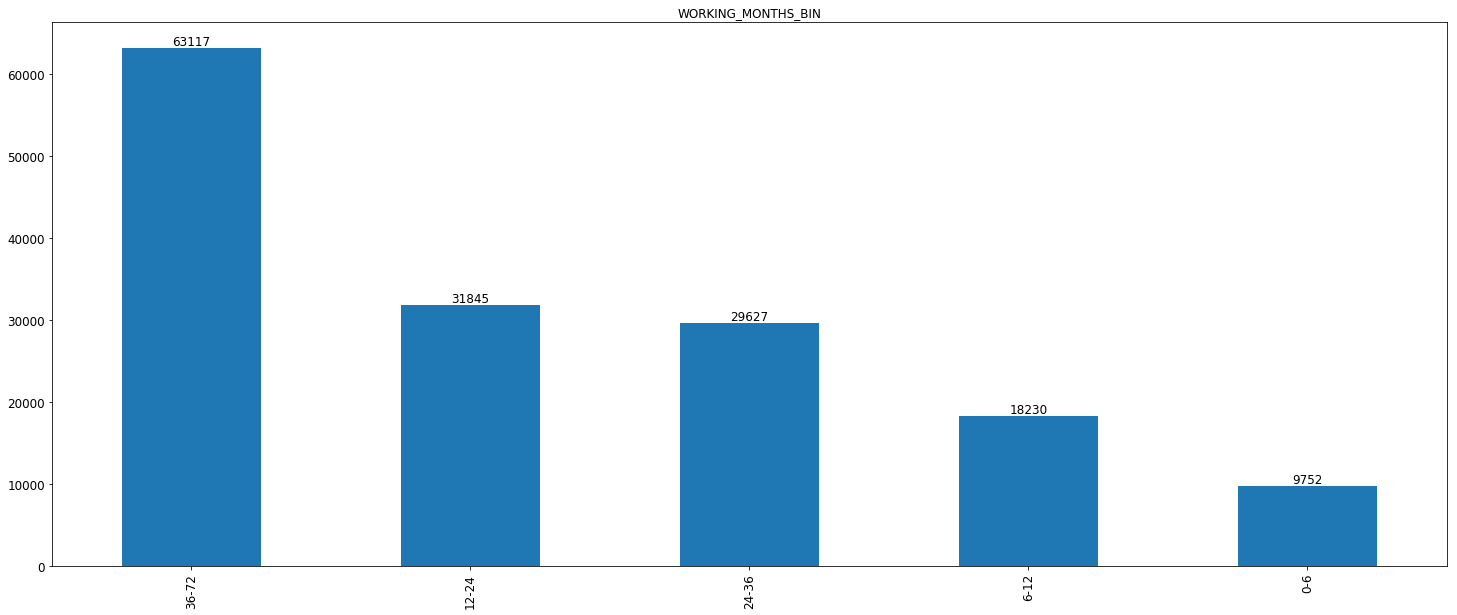

In [55]:
uniCatPLOT(df_application_fil,"WORKING_MONTHS_BIN")

In [56]:
#Estimate the months since last changed their mobile number 
df_application_fil["DAYS_LAST_PHONE_CHANGE_MONTHS"]=(df_application_fil["DAYS_LAST_PHONE_CHANGE"]/365)*-12

In [57]:
#Bin the variable to get and distribution
bins = [-1,6,12,24,36,72]
labels = ["0-6","6-12","12-24","24-36","36-72"]
df_application_fil['DAYS_LAST_PHONE_CHANGE_MONTHS_BIN'] = pd.cut(df_application_fil['DAYS_LAST_PHONE_CHANGE_MONTHS'], bins=bins, labels=labels)

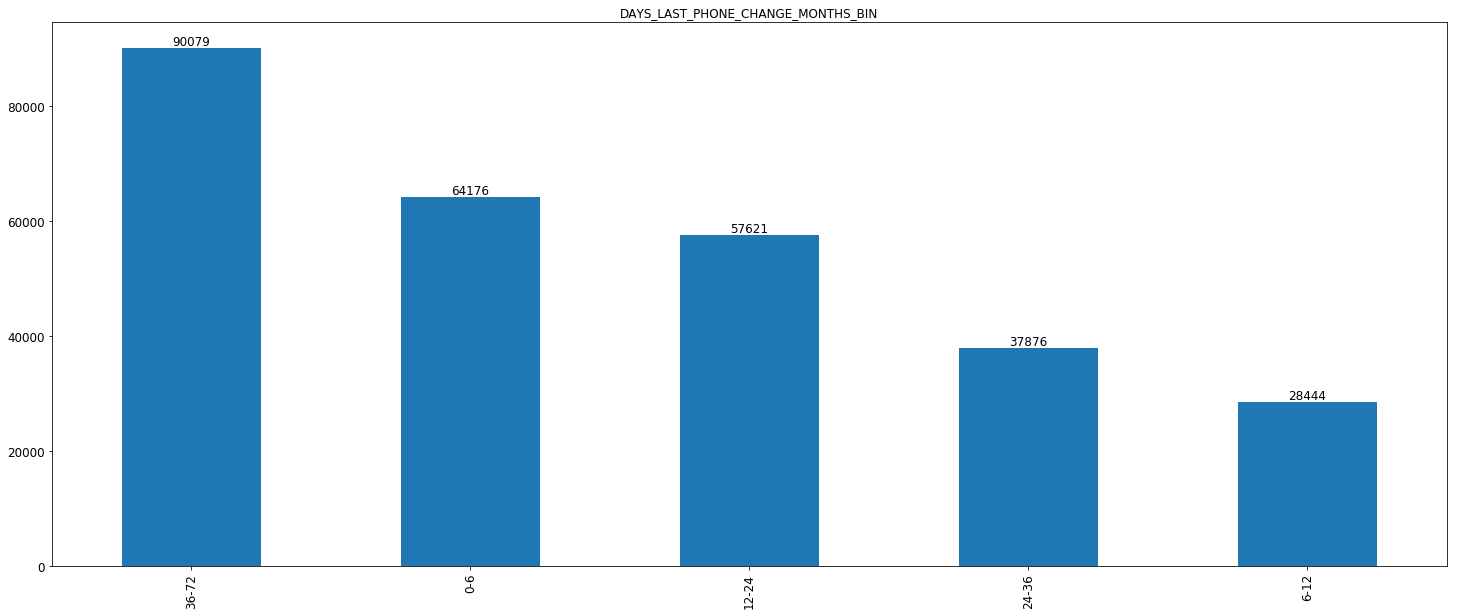

In [58]:
uniCatPLOT(df_application_fil,"DAYS_LAST_PHONE_CHANGE_MONTHS_BIN")

In [59]:
#Bin continuous variable EXT_SOURCE_2
bins = [-1,0.1,0.2,0.4,0.6,0.8,1]
labels = ["0-0.1","0.1-0.2","0.2-0.4","0.4-0.6","0.6-0.8","0.8-1"]
df_application_fil['EXT_SOURCE_2_BIN'] = pd.cut(df_application_fil['EXT_SOURCE_2'], bins=bins, labels=labels)

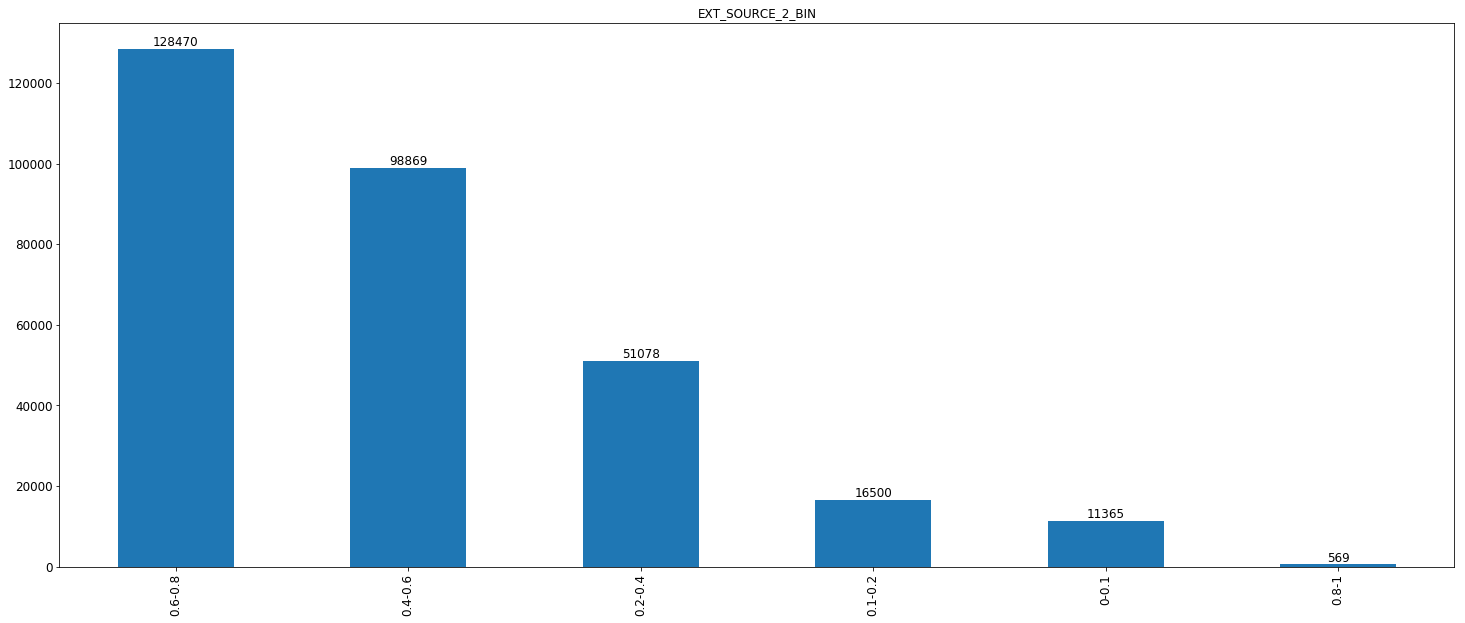

In [60]:
uniCatPLOT(df_application_fil,"EXT_SOURCE_2_BIN")

In [61]:
#Bin continuous variable EXT_SOURCE_3
bins = [-1,0.1,0.2,0.4,0.6,0.8,1]
labels = ["0-0.1","0.1-0.2","0.2-0.4","0.4-0.6","0.6-0.8","0.8-1"]
df_application_fil['EXT_SOURCE_3_BIN'] = pd.cut(df_application_fil['EXT_SOURCE_3'], bins=bins, labels=labels)

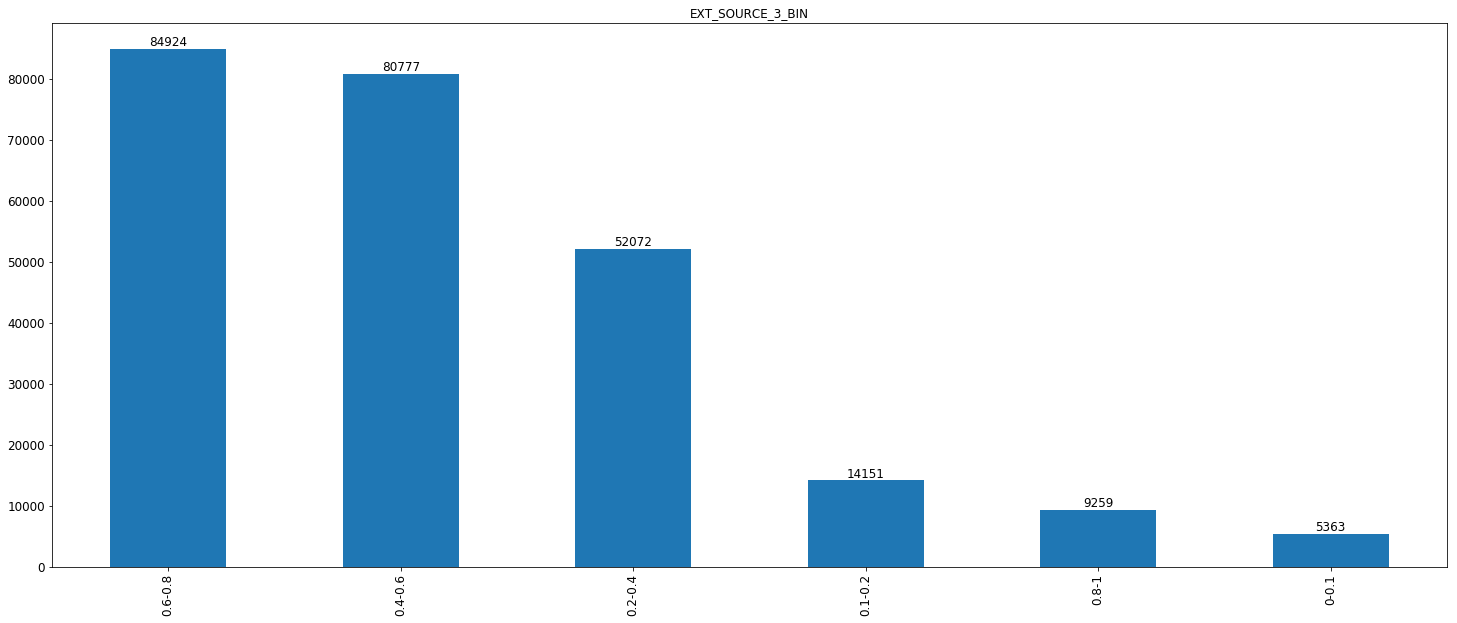

In [62]:
uniCatPLOT(df_application_fil,"EXT_SOURCE_3_BIN")

In [63]:
#Estimate and bin Days published
df_application_fil["DAYS_ID_PUBLISH_MONTHS"]=(df_application_fil["DAYS_ID_PUBLISH"]/365)*-12

In [64]:
bins = [0,6,12,24,36,72]
labels = ["0-6","6-12","12-24","24-36","36-72"]
df_application_fil['DAYS_ID_PUBLISH_BIN'] = pd.cut(df_application_fil['DAYS_ID_PUBLISH_MONTHS'], bins=bins, labels=labels)

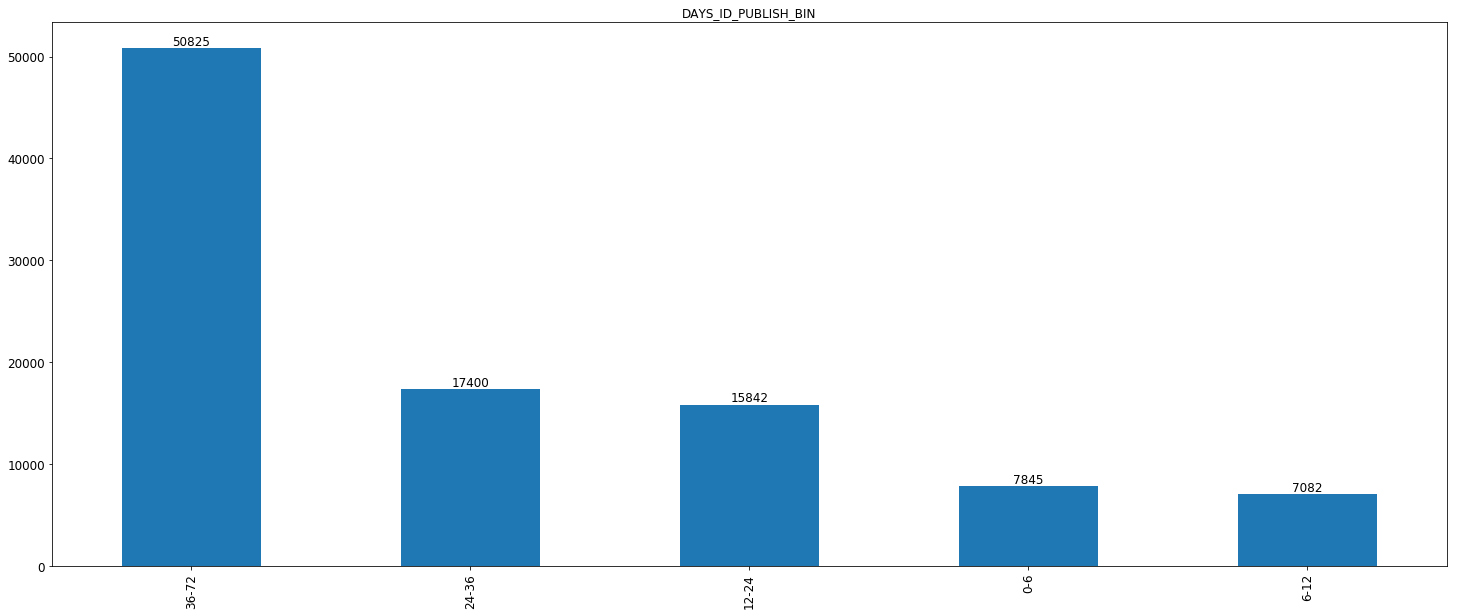

In [65]:
uniCatPLOT(df_application_fil,"DAYS_ID_PUBLISH_BIN")

In [66]:
#Estimate and bin Days Registered
df_application_fil["DAYS_REGISTRATION_MONTHS"]=(df_application_fil["DAYS_REGISTRATION"]/365)*-12

In [67]:
bins = [-1,6,12,24,36,72]
labels = ["0-6","6-12","12-24","24-36","36-72"]
df_application_fil['DAYS_REGISTRATION_MONTHS_BIN'] = pd.cut(df_application_fil['DAYS_REGISTRATION_MONTHS'], bins=bins, labels=labels)

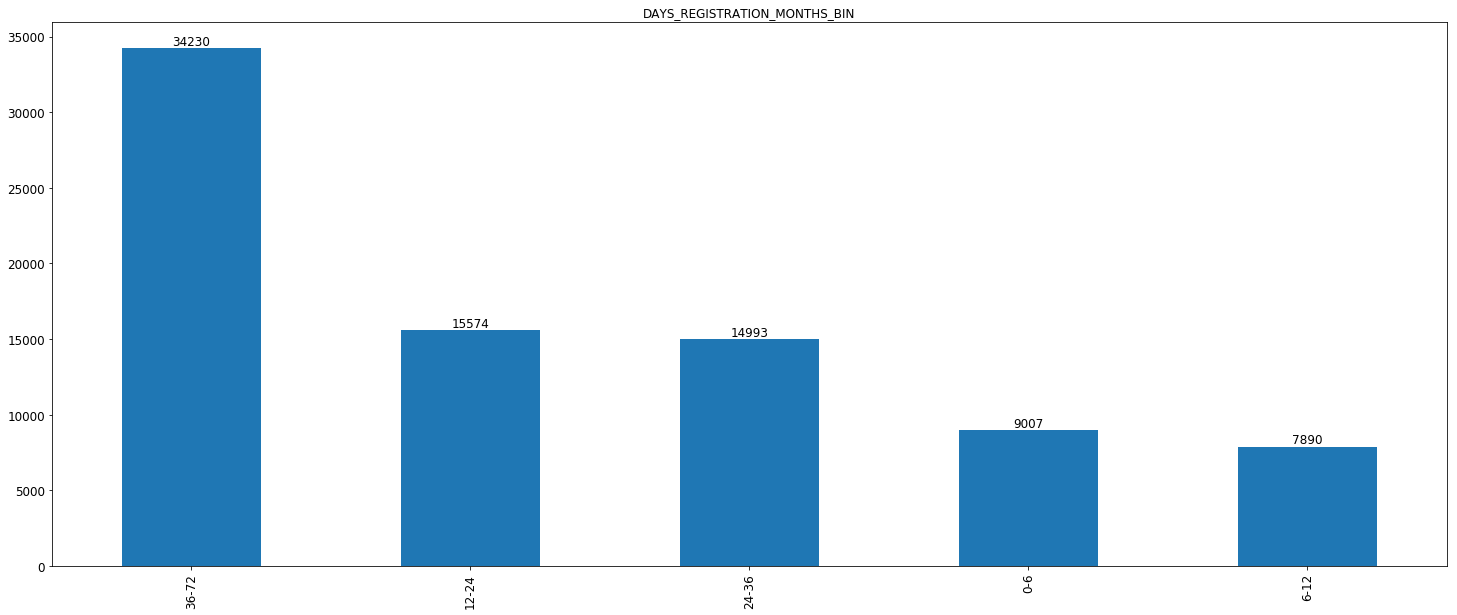

In [68]:
uniCatPLOT(df_application_fil,"DAYS_REGISTRATION_MONTHS_BIN")

In [69]:
#OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE have high correlation with OBS_30_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE Respectively
#We create new varibale %of defaulters in last 60 days in clients social surrounding
df_application_fil["Defaulter_Sur"]=(df_application_fil["DEF_60_CNT_SOCIAL_CIRCLE"]/df_application_fil["OBS_60_CNT_SOCIAL_CIRCLE"])*100

In [70]:
#Lets Bin this variable
bins = [-1,5,10,20,40,60,100]
labels = ["0-5","5-10","10-20","20-40","40-60","60-100"]
df_application_fil['Defaulter_Sur_BIN'] = pd.cut(df_application_fil['Defaulter_Sur'], bins=bins, labels=labels)

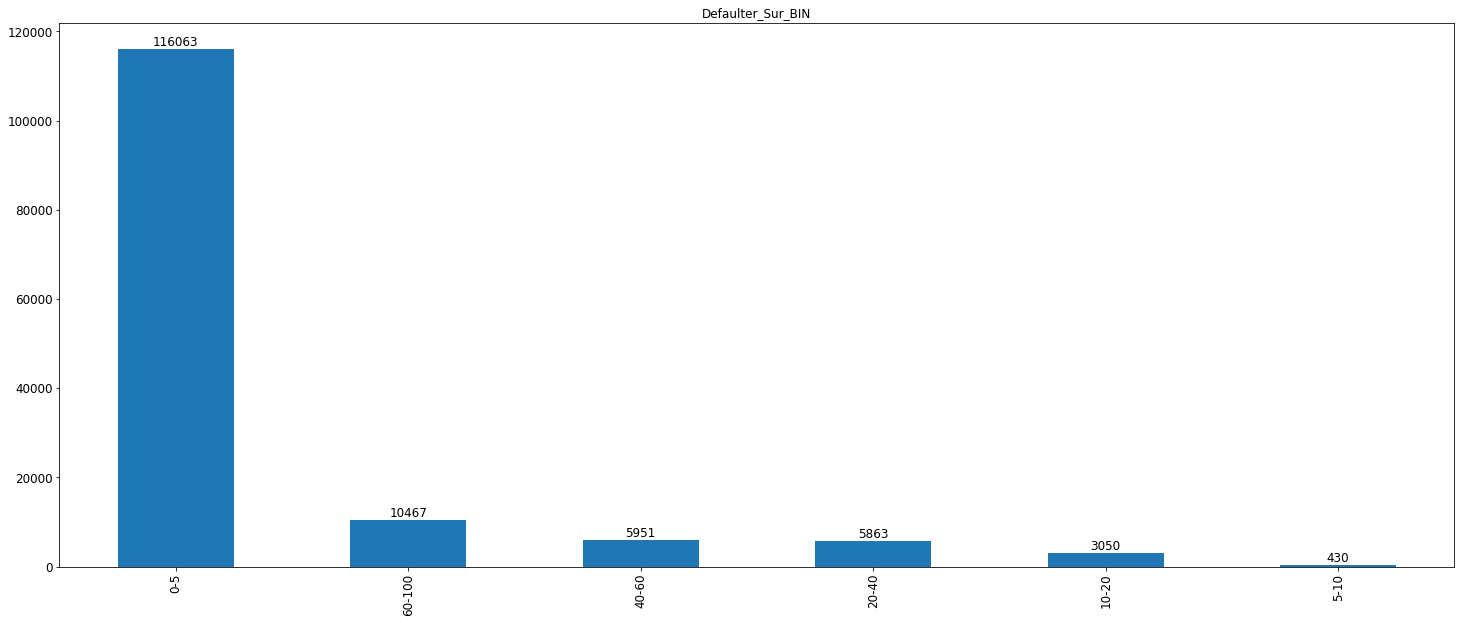

In [71]:
uniCatPLOT(df_application_fil,"Defaulter_Sur_BIN")

Since there is an high imbalance in the data set lets divide the data set into two by the target variable

In [72]:
df_others=df_application_fil.loc[(df_application_fil["TARGET"]==0)]
df_diff=df_application_fil.loc[(df_application_fil["TARGET"]==1)]


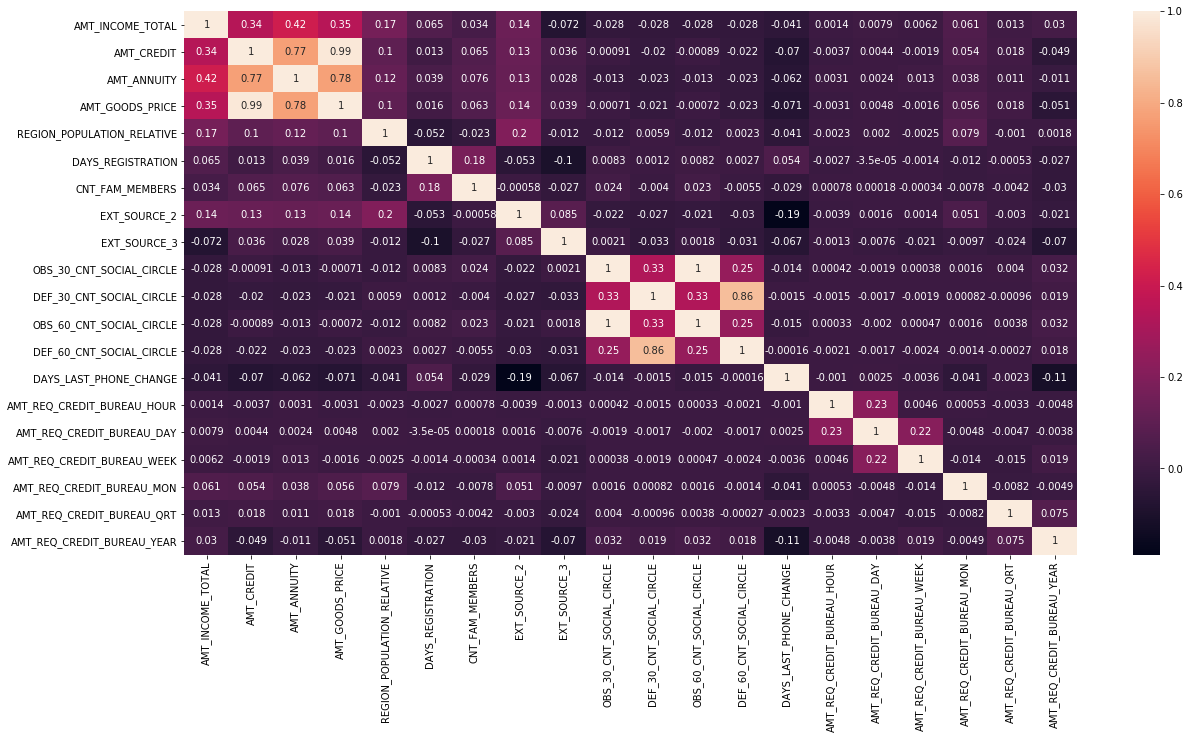

In [73]:
#Let look at the correlation of the numerial columns


plt.figure(figsize=(20,10))

sns.heatmap(df_others[num_cols].corr(method='pearson'), annot=True)


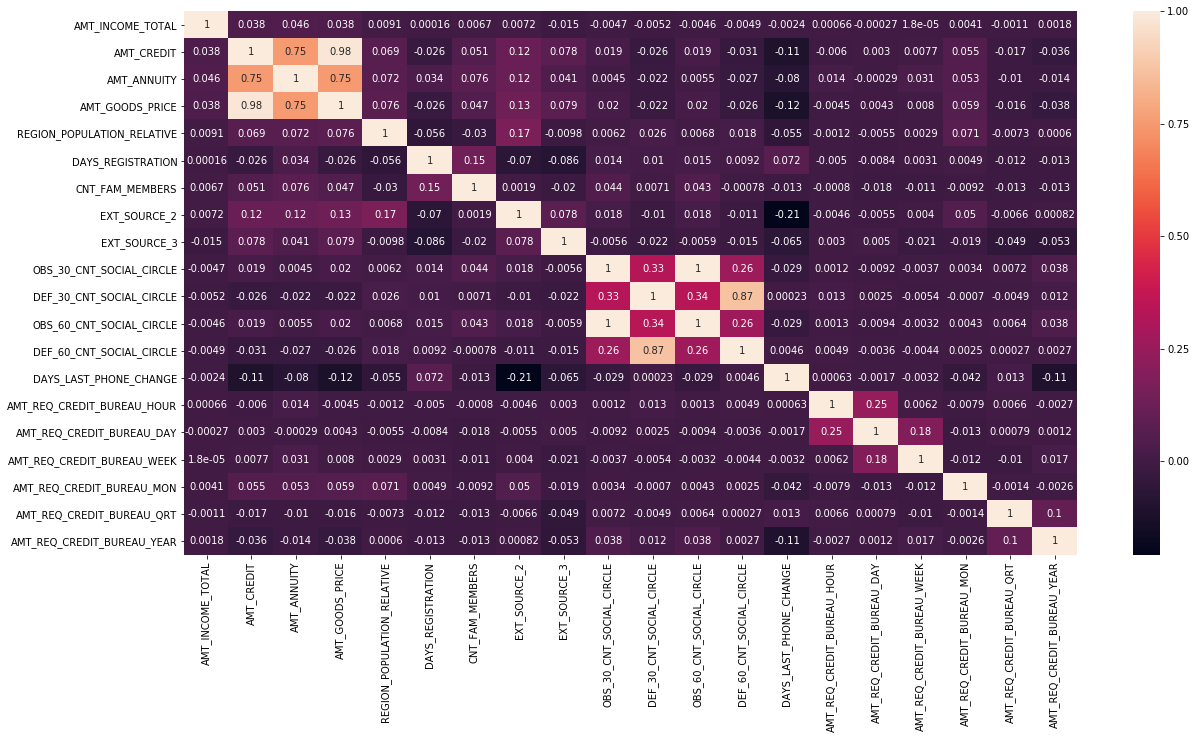

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(df_diff[num_cols].corr(method='pearson'), annot=True)

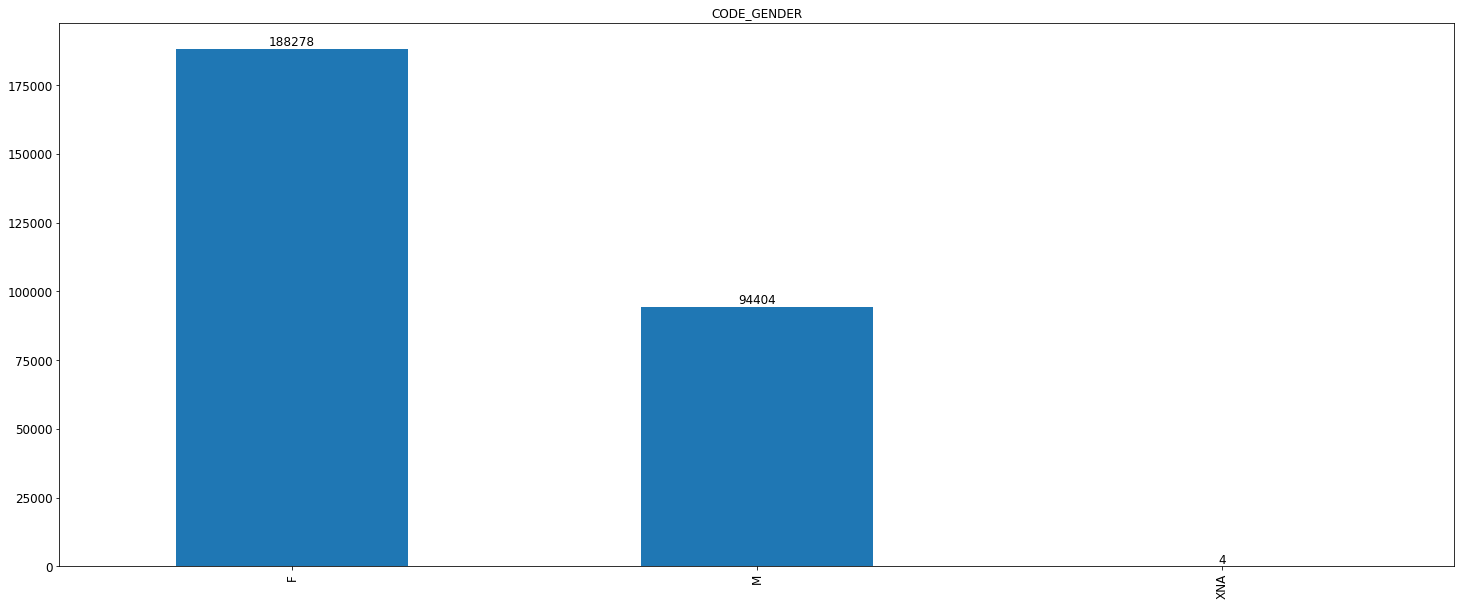

In [75]:
#Lets look at all variables in the 2 databases
uniCatPLOT(df_others,"CODE_GENDER")

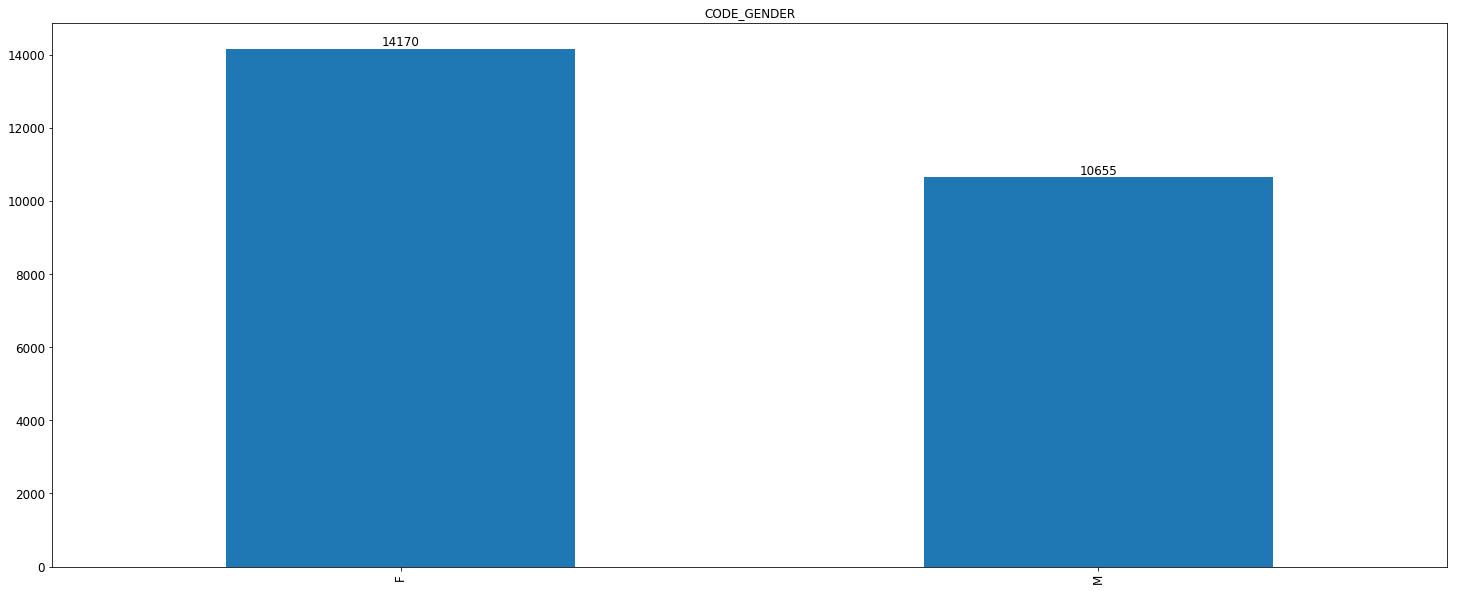

In [76]:
uniCatPLOT(df_diff,"CODE_GENDER")

In [77]:
#Precentage of male and female that find it difficult to repay
def precentagetotal (df,col,value):
    print(len(df.loc[(df[col]==value)])/len(df_application_fil.loc[(df_application_fil[col]==value)])*100)

def precentagedata (df,col,value):
    print((len(df.loc[(df[col]==value)])/len(df))*100)    
precentagetotal(df_diff,"CODE_GENDER","M")

10.141920254333279


In [78]:
precentagetotal(df_diff,"CODE_GENDER","F")

6.999328222555916


If the applicant is male then higher chances of applicant finding it difficult to pay loan

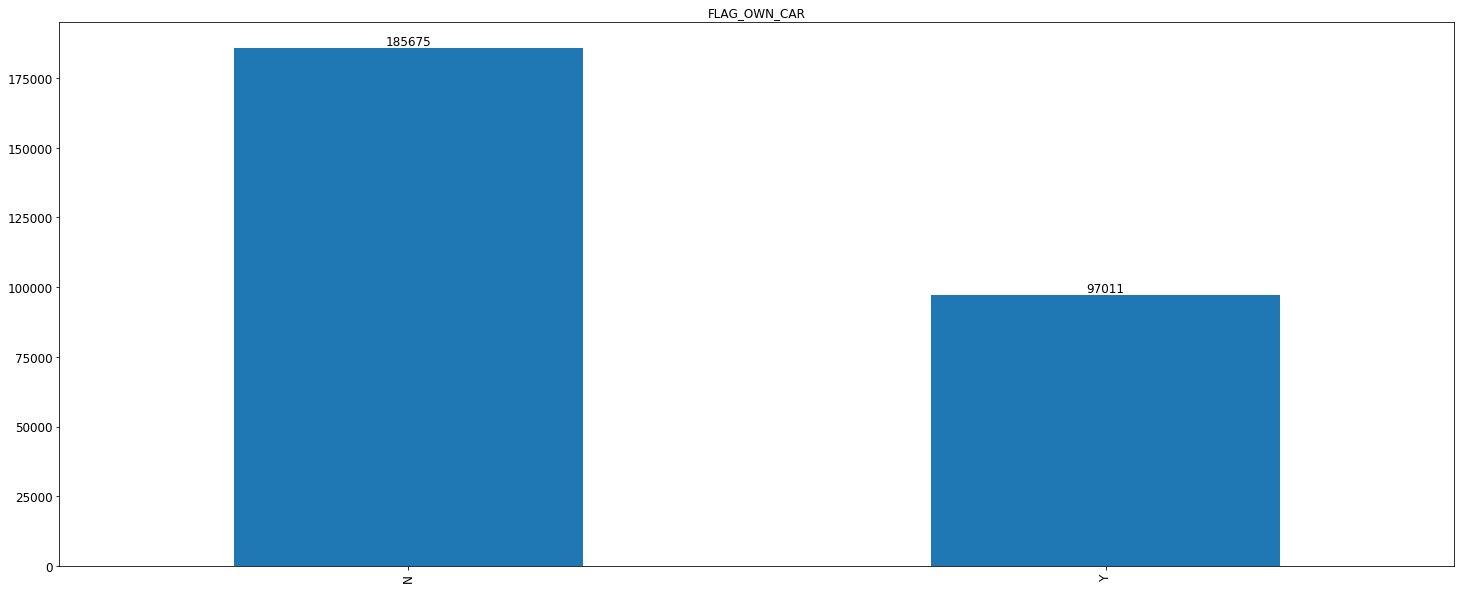

In [79]:
uniCatPLOT(df_others,"FLAG_OWN_CAR")

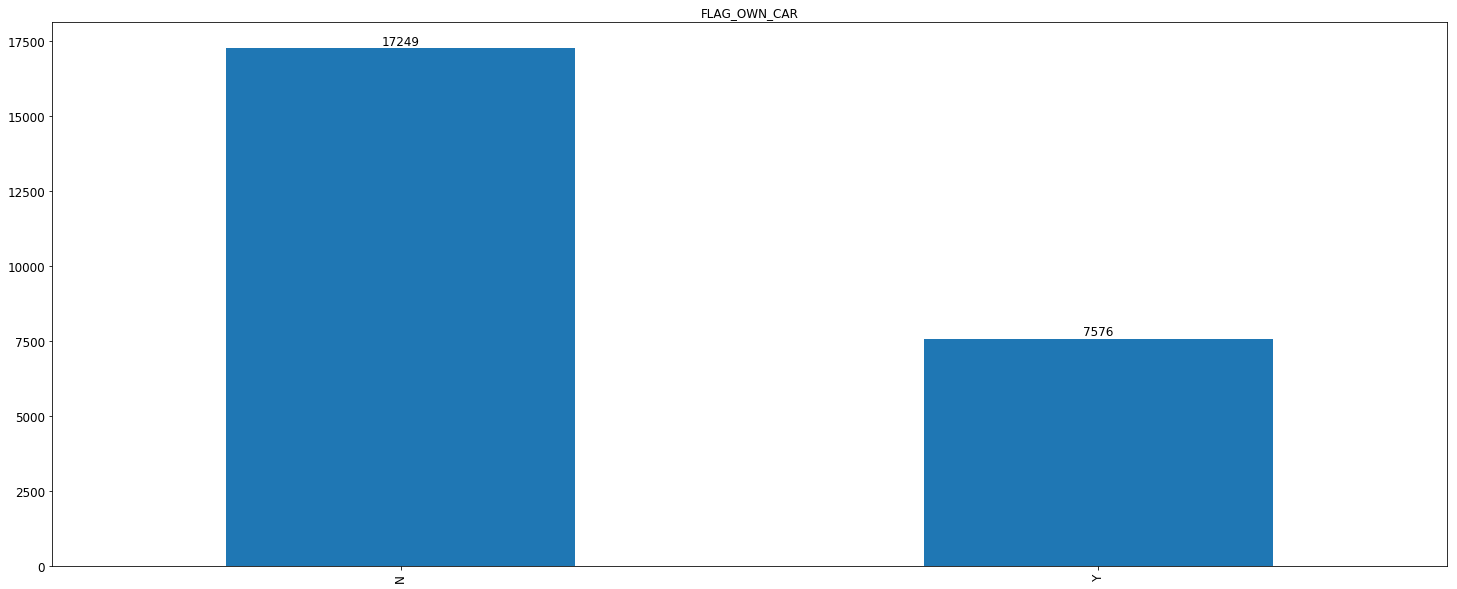

In [80]:
uniCatPLOT(df_diff,"FLAG_OWN_CAR")

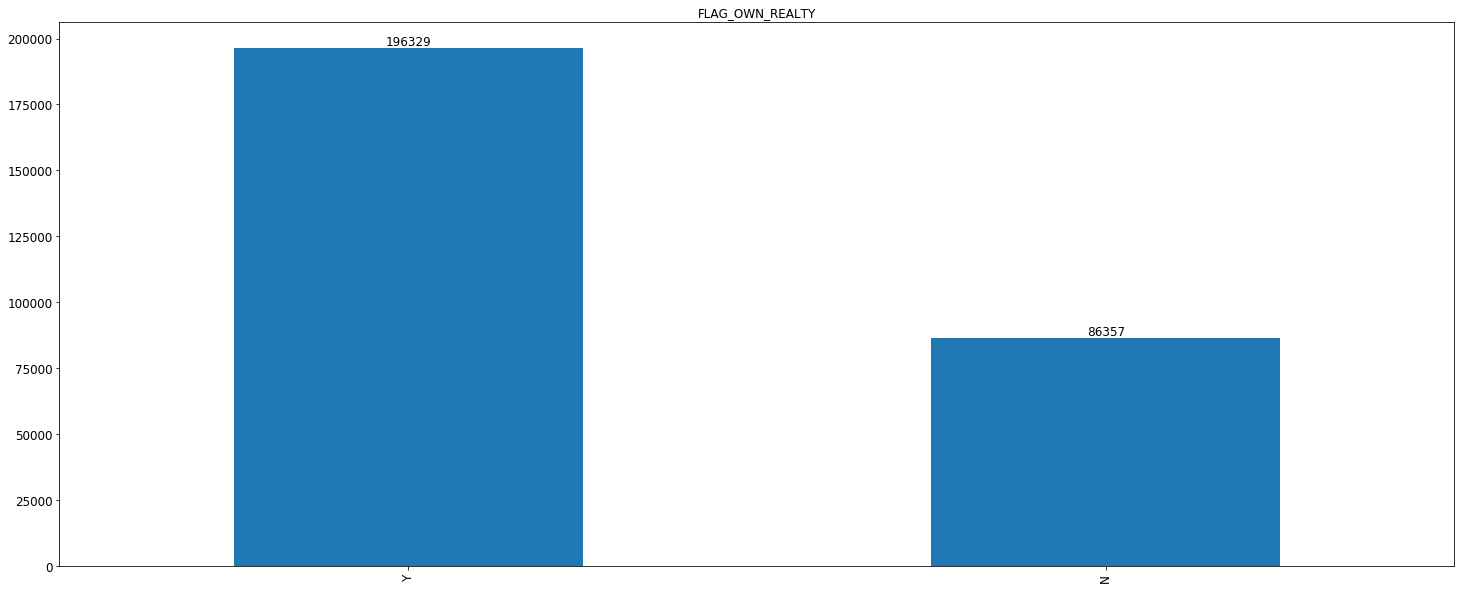

In [81]:
uniCatPLOT(df_others,"FLAG_OWN_REALTY")

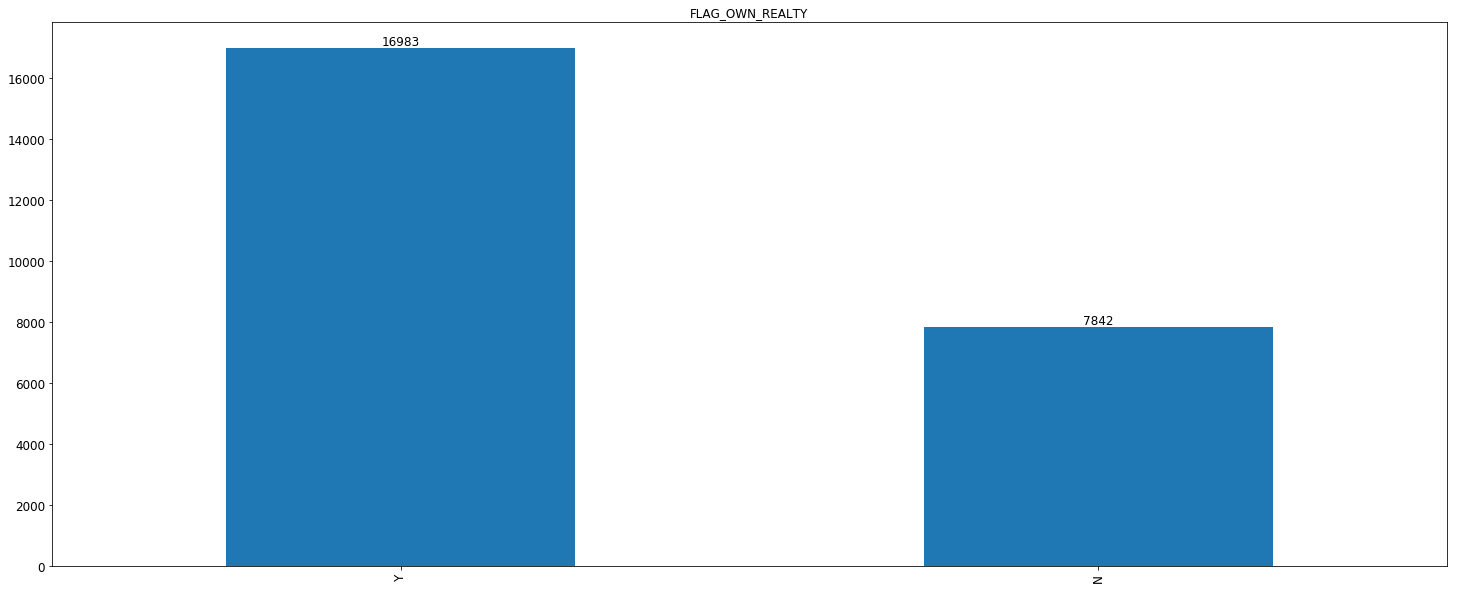

In [82]:
uniCatPLOT(df_diff,"FLAG_OWN_REALTY")

Car and realty ownership have similar distribution for both databases

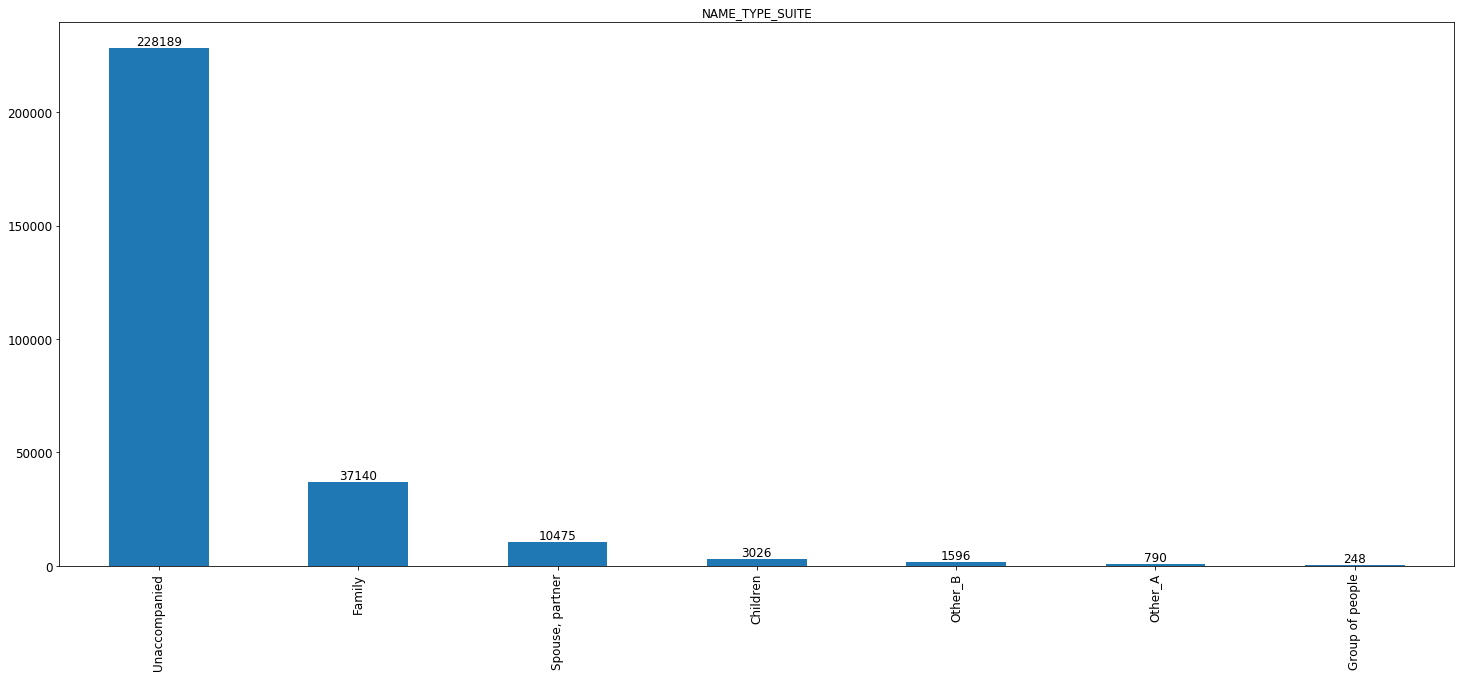

In [83]:
uniCatPLOT(df_others,"NAME_TYPE_SUITE")

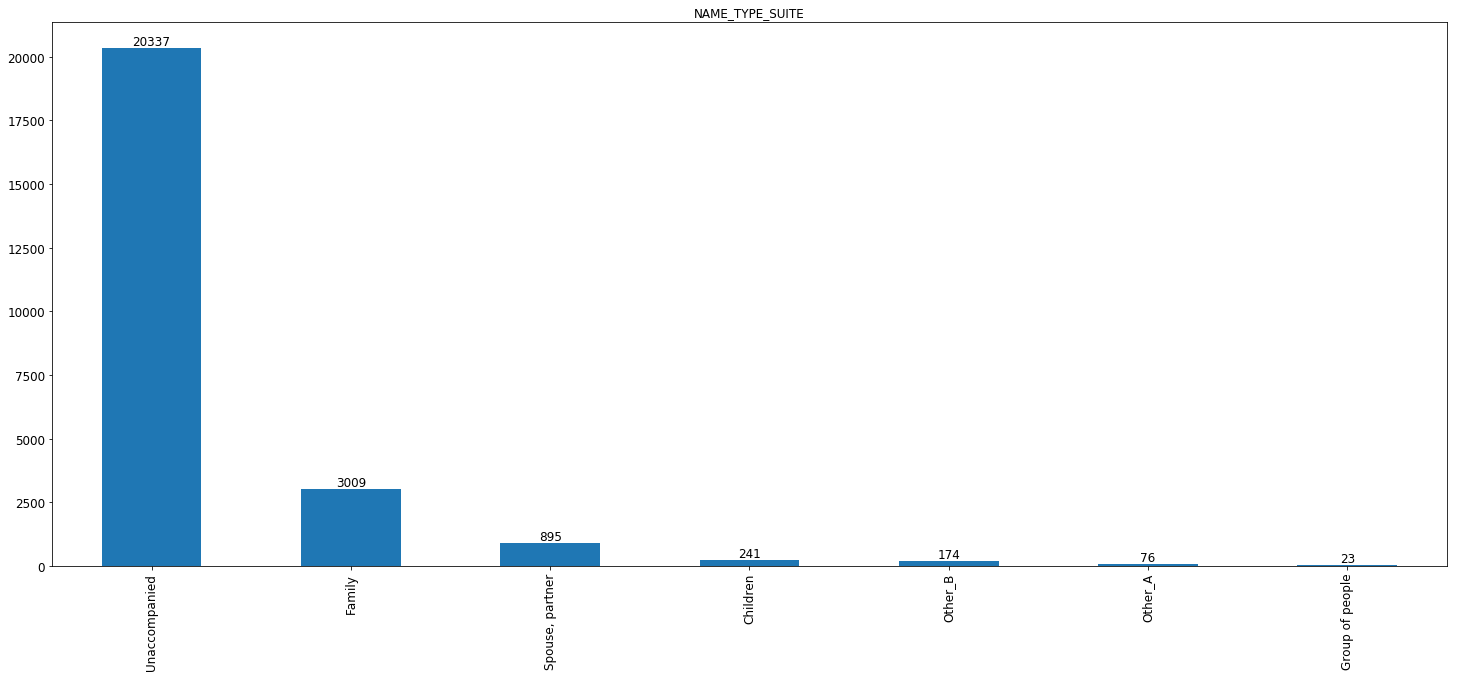

In [84]:
uniCatPLOT(df_diff,"NAME_TYPE_SUITE")

Similar distribution for people accompanying the applicant

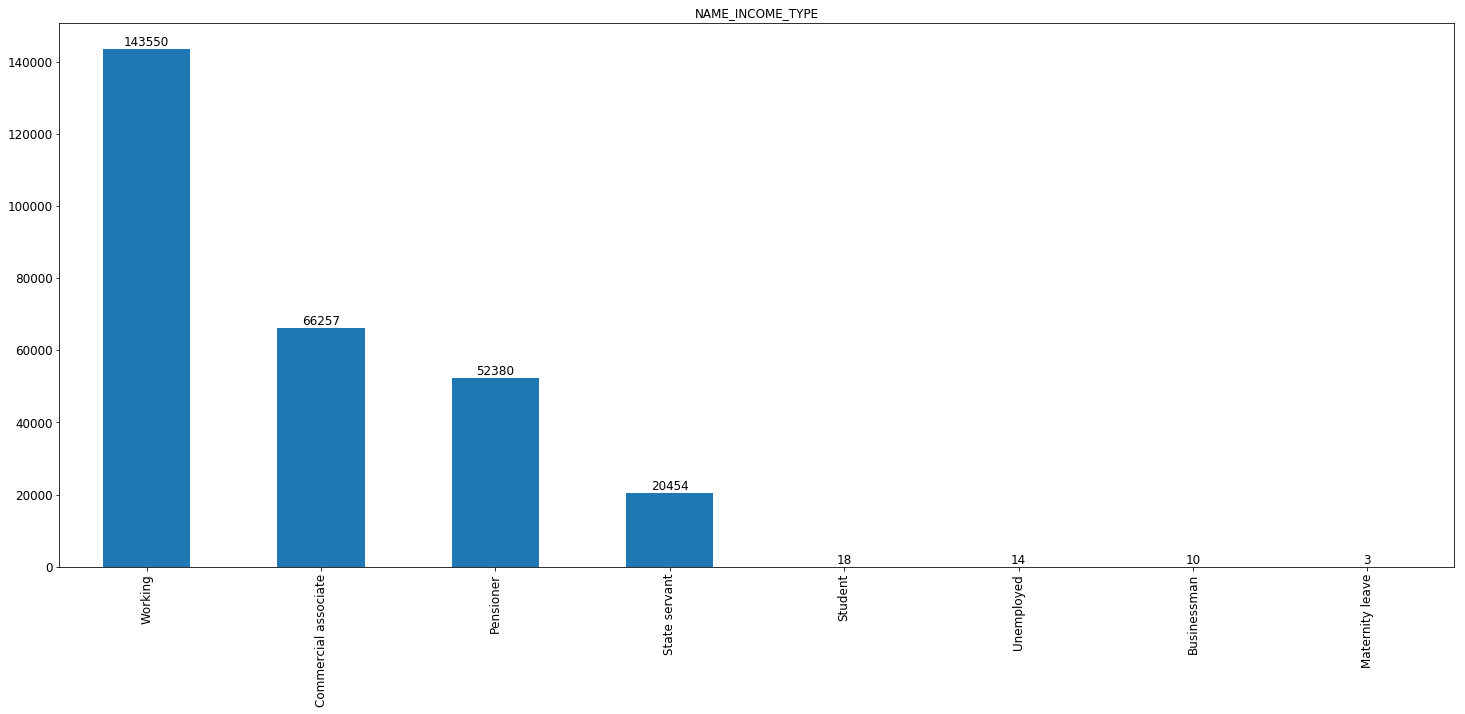

In [85]:
uniCatPLOT(df_others,"NAME_INCOME_TYPE")

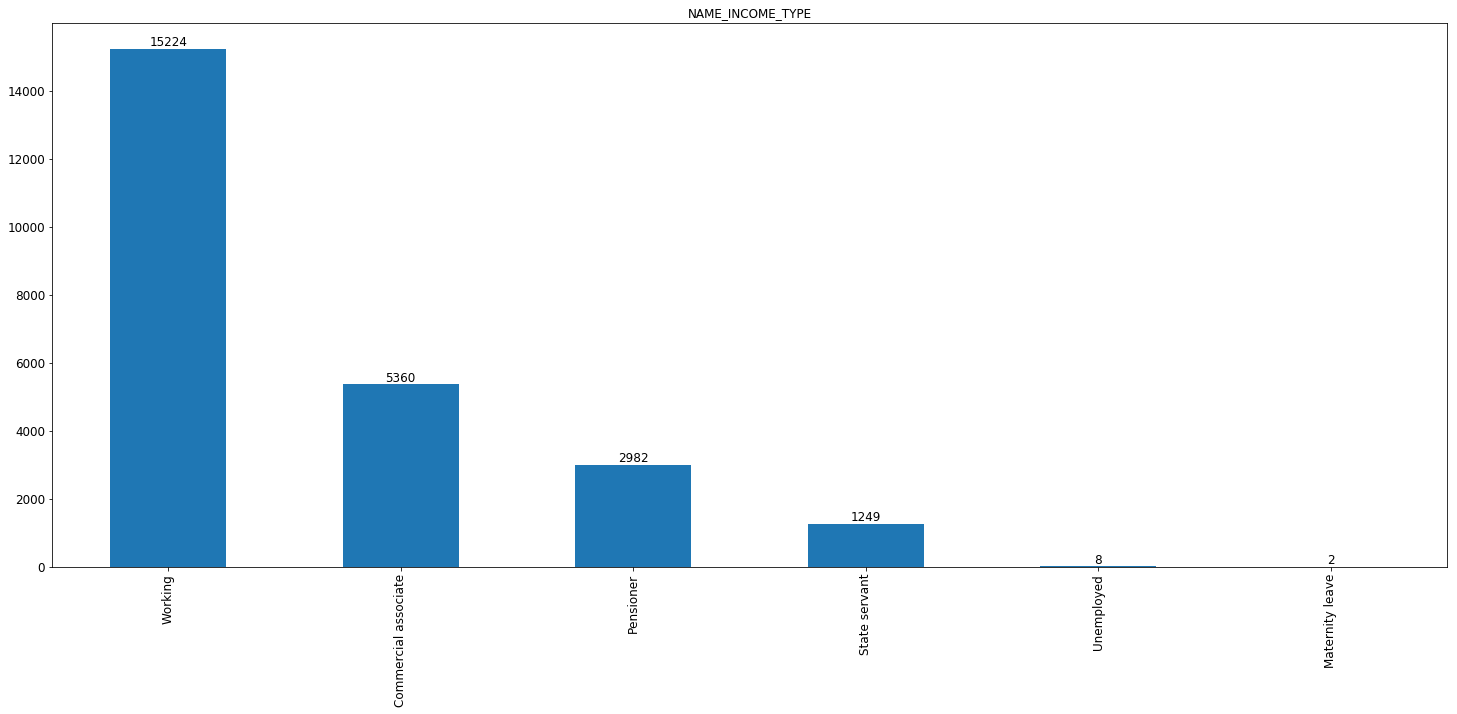

In [86]:
uniCatPLOT(df_diff,"NAME_INCOME_TYPE")

Similar distribution for income type

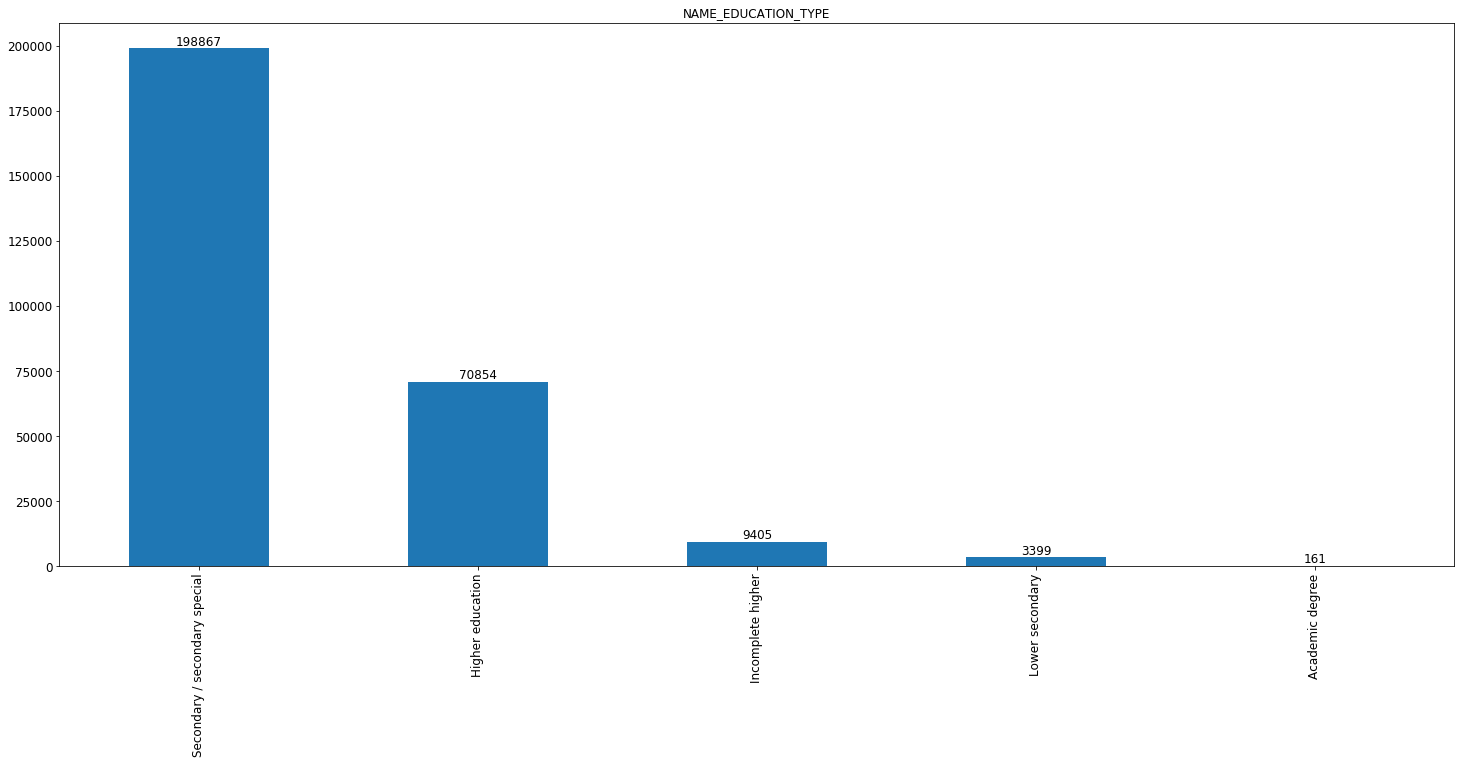

In [87]:
uniCatPLOT(df_others,"NAME_EDUCATION_TYPE")

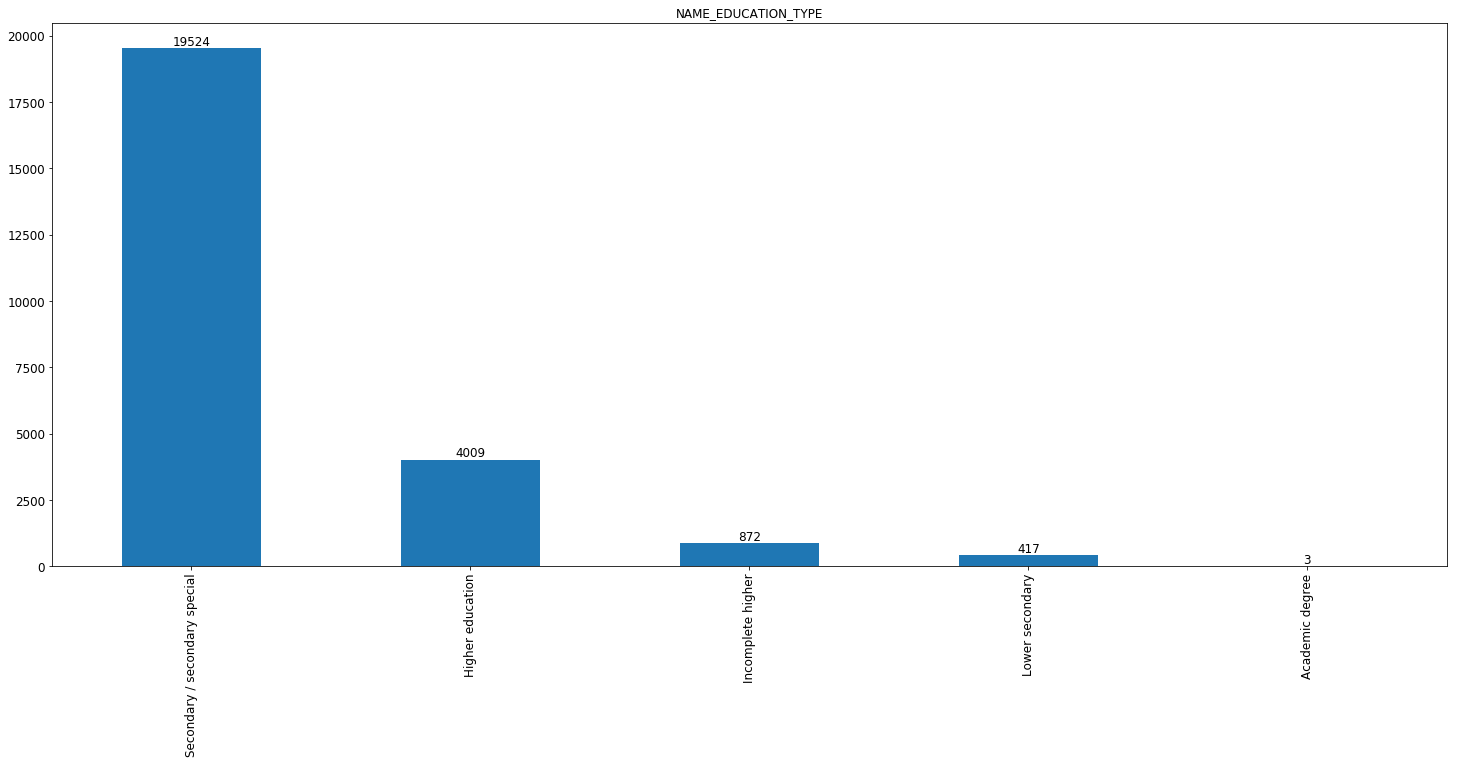

In [88]:
uniCatPLOT(df_diff,"NAME_EDUCATION_TYPE")

In [89]:
precentagetotal(df_diff,"NAME_EDUCATION_TYPE","Higher education")


5.355115344028425


In [90]:
precentagetotal(df_diff,"NAME_EDUCATION_TYPE","Secondary / secondary special")


8.939928843221562


Applicants with higher eductaiton less likely to face difficulty in repayment then applicants only with secondary education

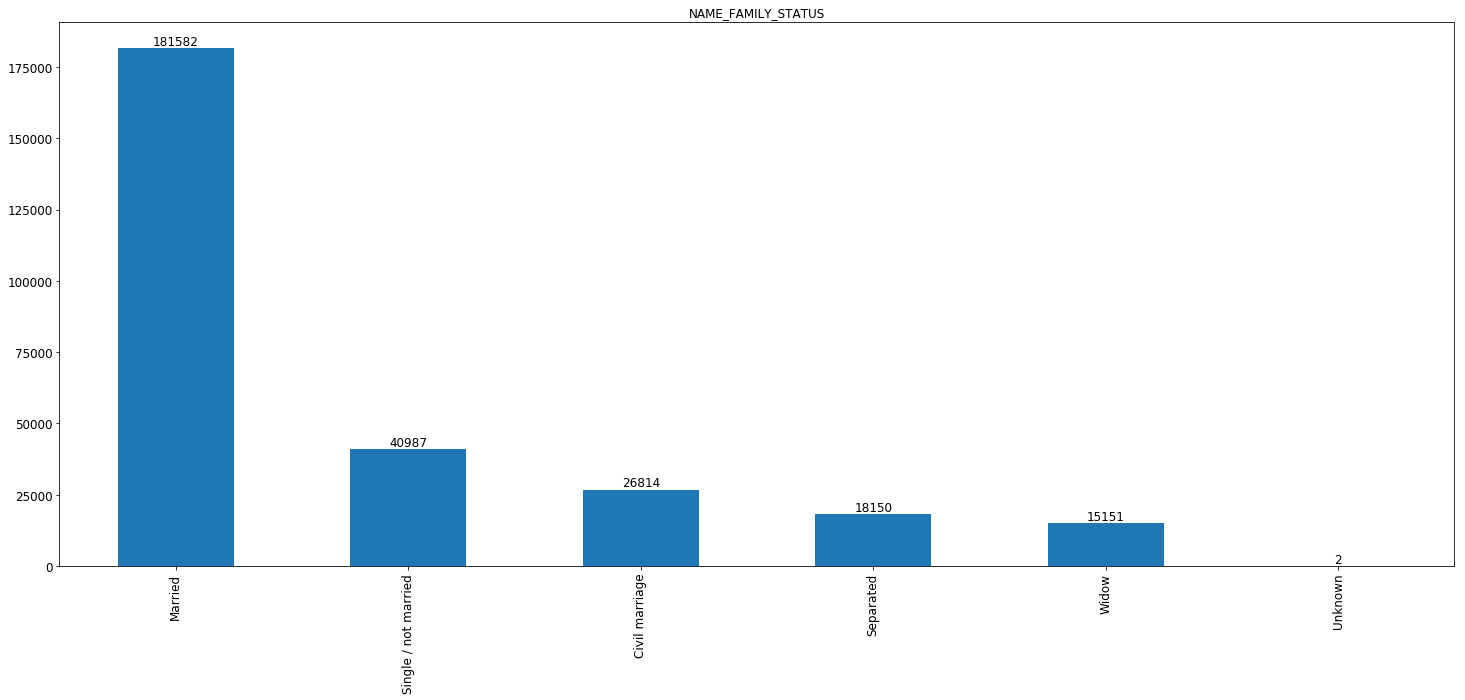

In [91]:
uniCatPLOT(df_others,"NAME_FAMILY_STATUS")

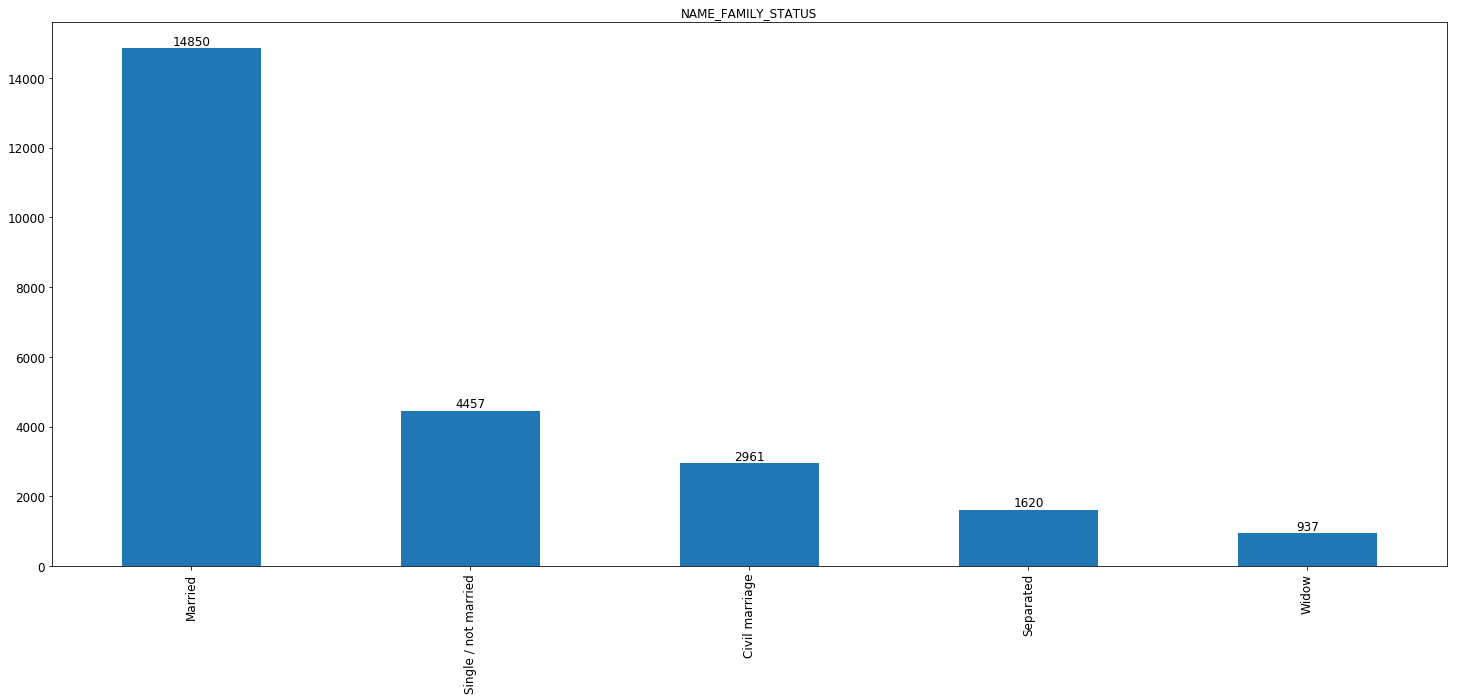

In [92]:
uniCatPLOT(df_diff,"NAME_FAMILY_STATUS")

In [93]:
precentagedata(df_others,"NAME_FAMILY_STATUS","Married")
precentagedata(df_diff,"NAME_FAMILY_STATUS","Married")

64.23452169545007
59.818731117824775


Similar distribution for the two databases
    
    

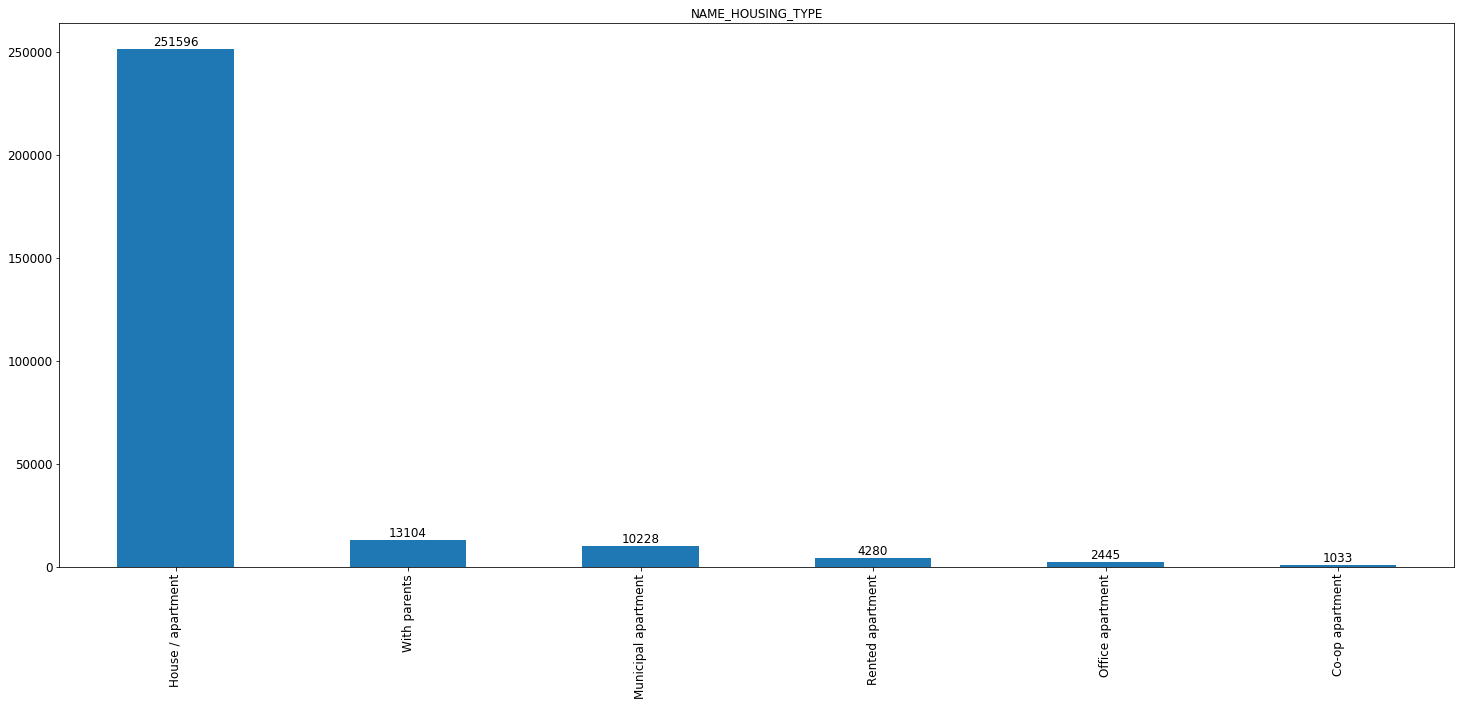

In [94]:
uniCatPLOT(df_others,"NAME_HOUSING_TYPE")

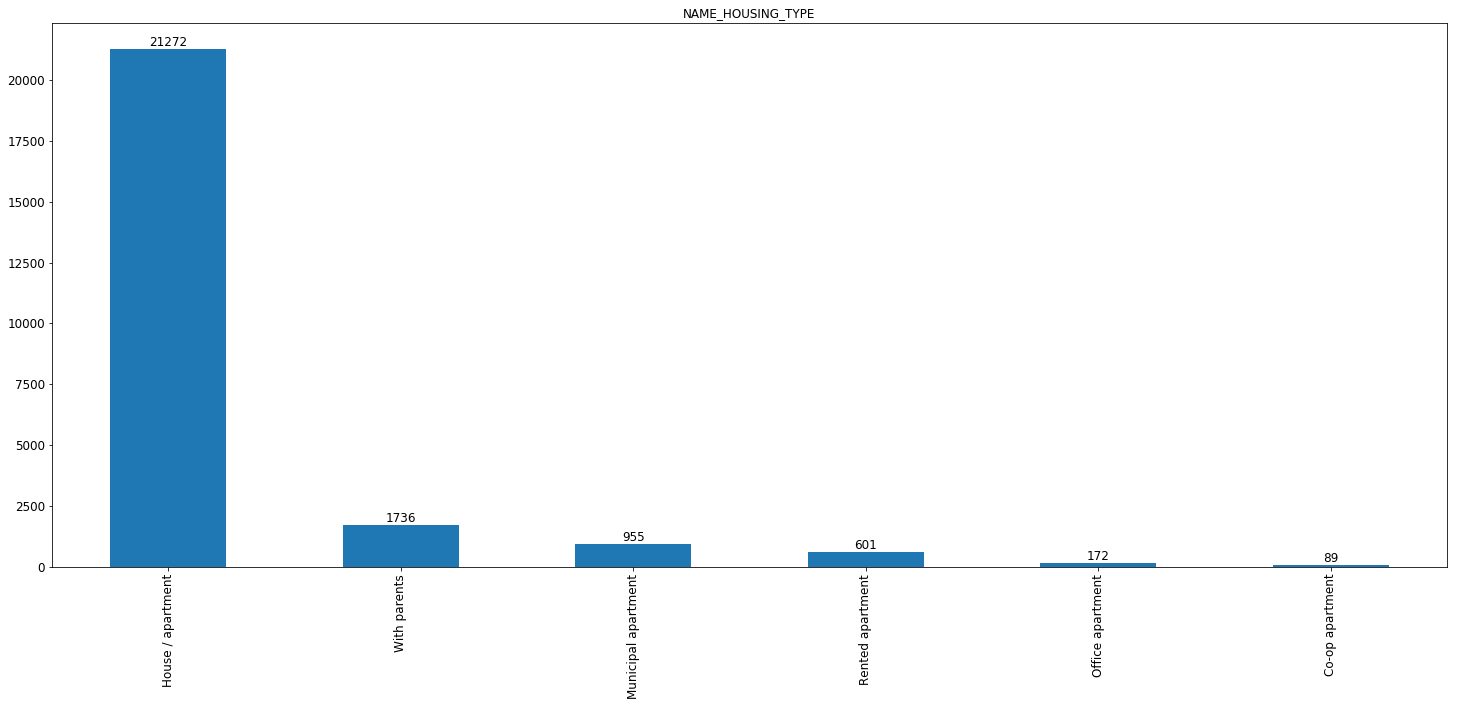

In [95]:
uniCatPLOT(df_diff,"NAME_HOUSING_TYPE")

Similar Distribution for the two databases

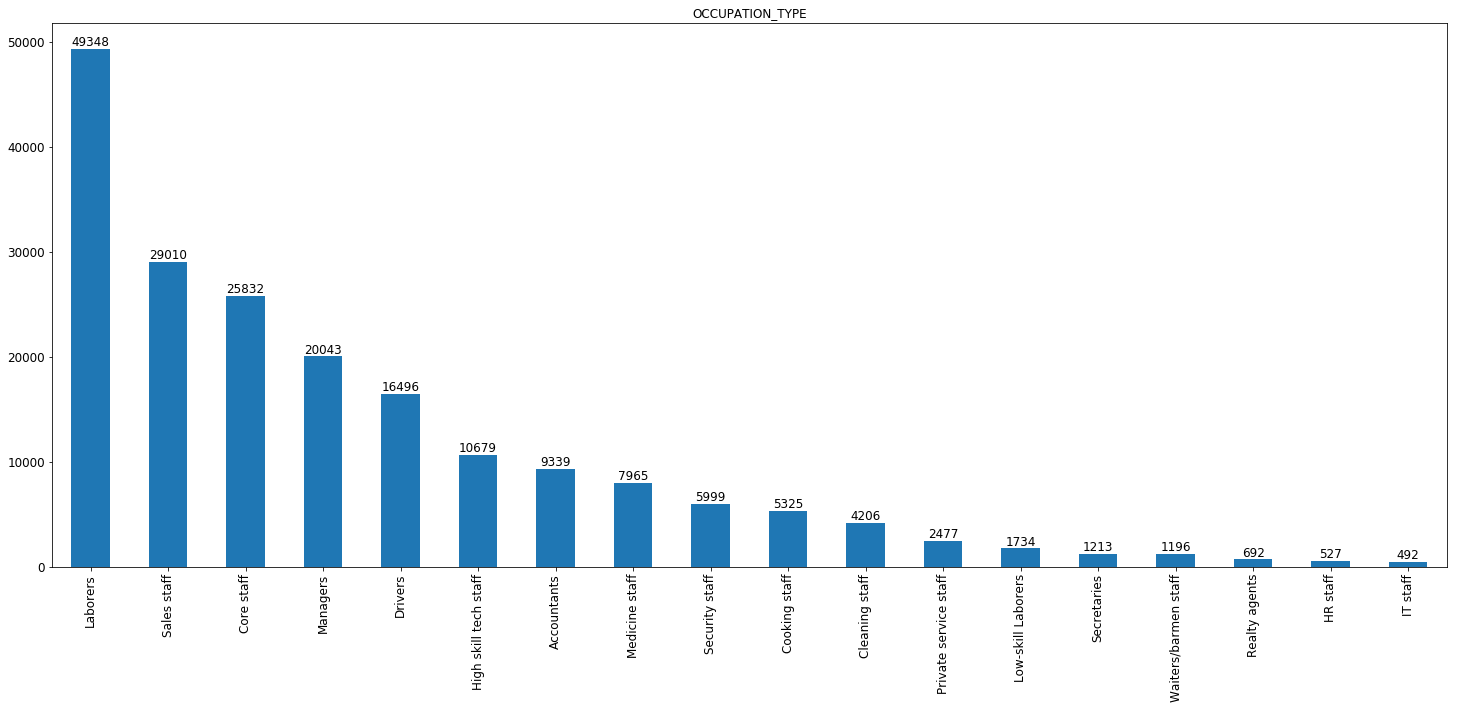

In [96]:
uniCatPLOT(df_others,"OCCUPATION_TYPE")

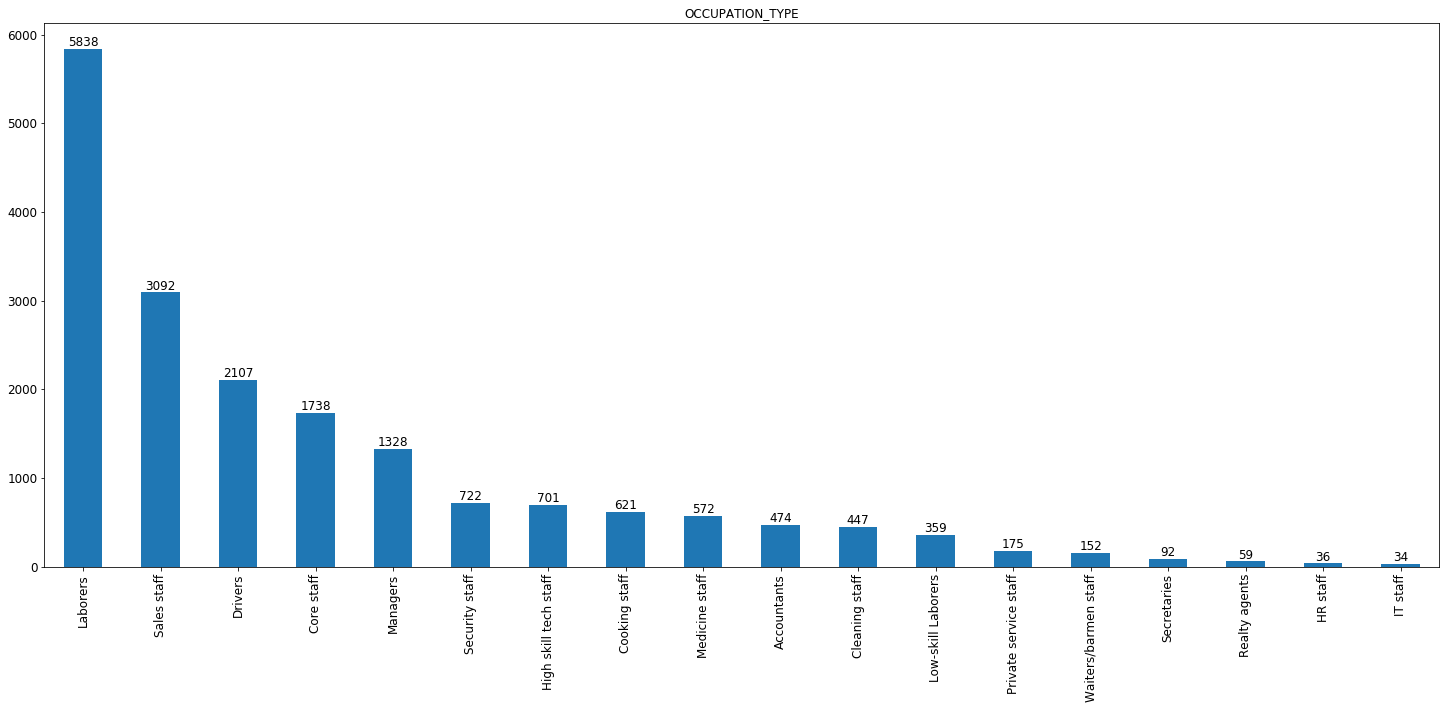

In [97]:
uniCatPLOT(df_diff,"OCCUPATION_TYPE")

In [98]:


precentagedata(df_diff,"OCCUPATION_TYPE","Laborers")

23.516616314199396


In [99]:
precentagedata(df_others,"OCCUPATION_TYPE","Laborers")

17.45682488697707


Clear to see higher precentage of laborers in applicants who are having difficulty in replayments

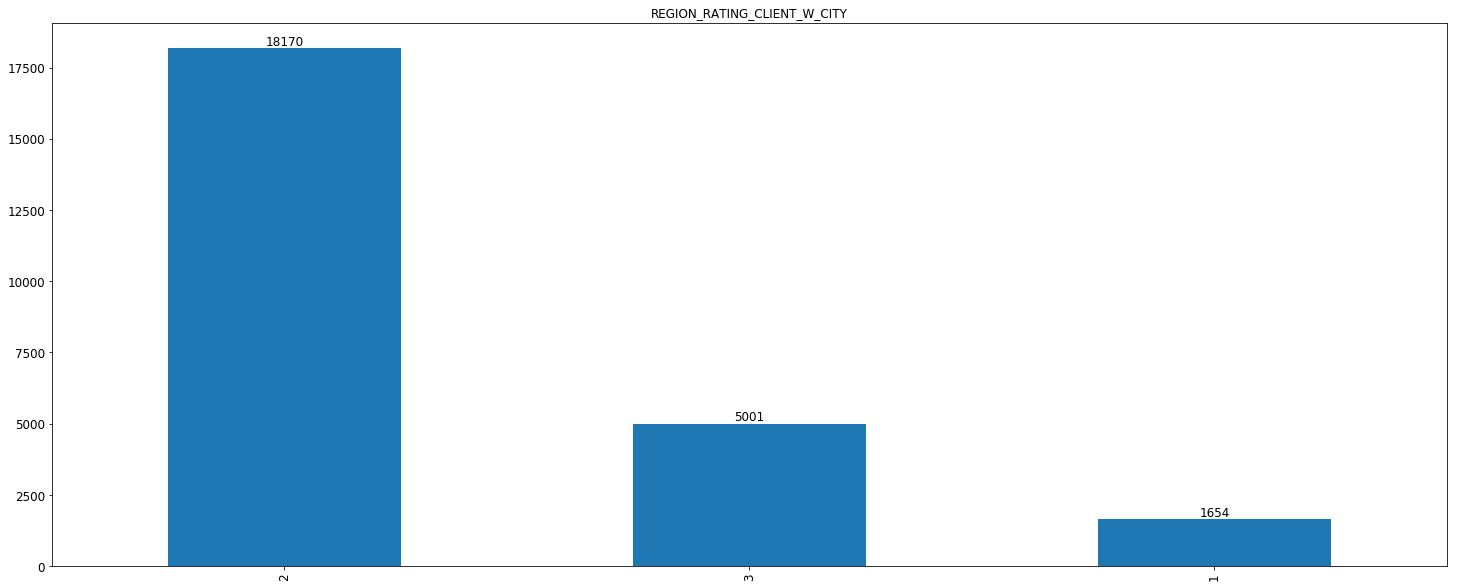

In [100]:
uniCatPLOT(df_diff,"REGION_RATING_CLIENT_W_CITY")

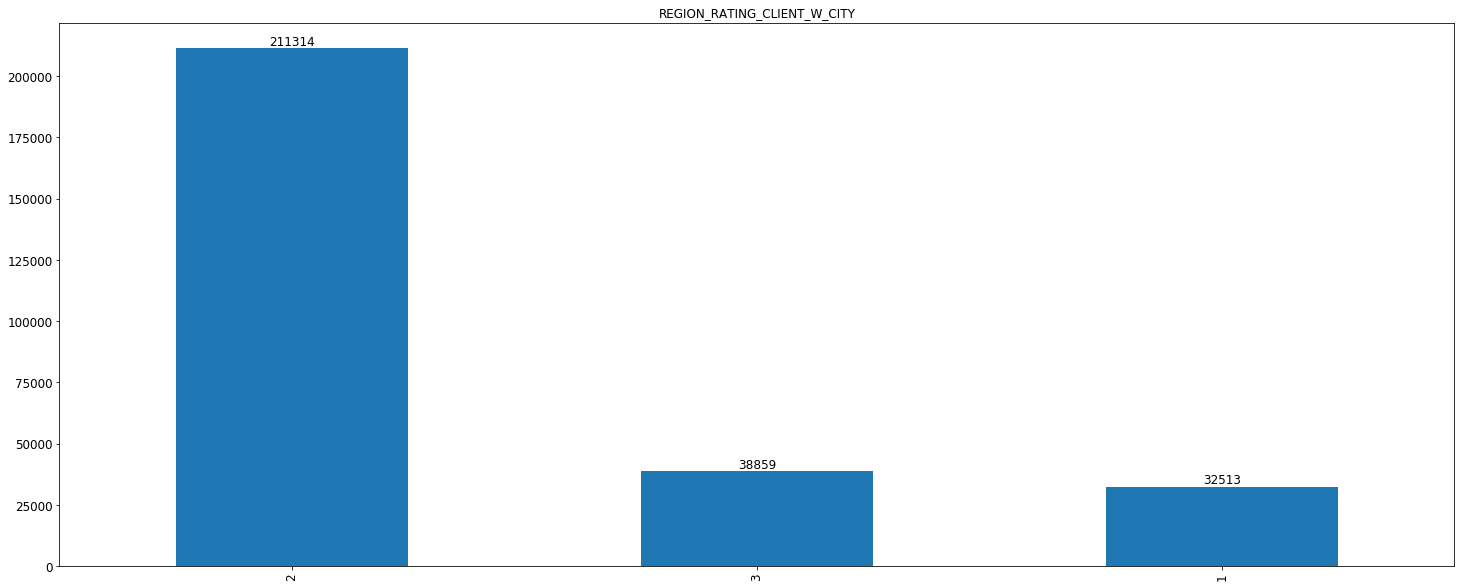

In [101]:
uniCatPLOT(df_others,"REGION_RATING_CLIENT_W_CITY")

In [102]:
precentagedata(df_diff,"REGION_RATING_CLIENT_W_CITY",3)


20.14501510574018


In [103]:
precentagedata(df_others,"REGION_RATING_CLIENT_W_CITY",3)

13.746347537550498


Region Rating is driving variable. appplicants are higher in precentage from region 3 if they are facing difficulty in repayment

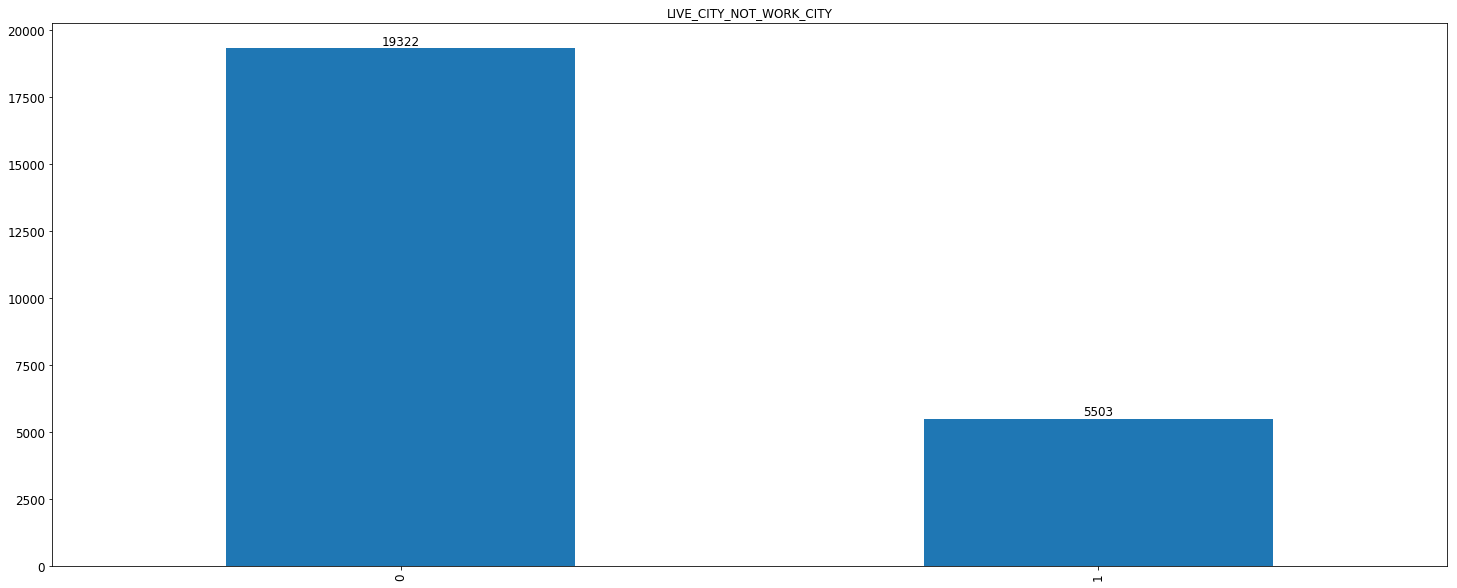

In [104]:
#Lets look at other living/housing parameters
uniCatPLOT(df_diff,"LIVE_CITY_NOT_WORK_CITY")

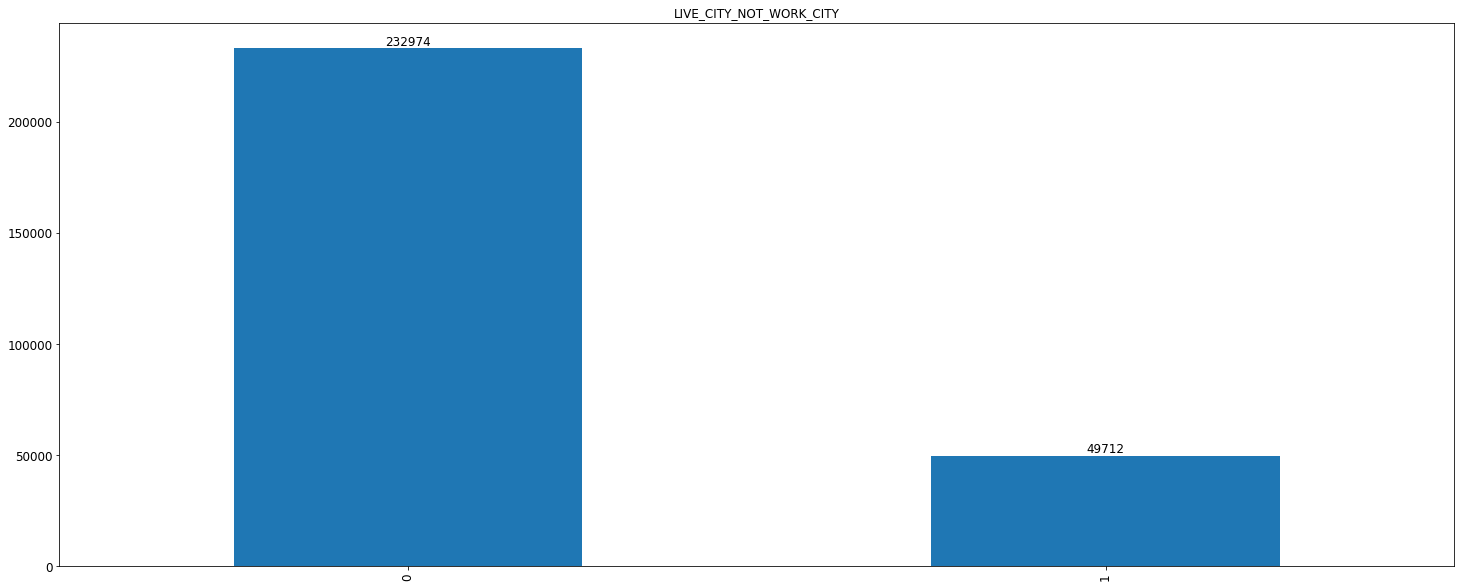

In [105]:
uniCatPLOT(df_others,"LIVE_CITY_NOT_WORK_CITY")

In [106]:
precentagedata(df_diff,"LIVE_CITY_NOT_WORK_CITY",1)
precentagedata(df_others,"LIVE_CITY_NOT_WORK_CITY",1)

22.167170191339373
17.585589664857828


Higher precentage of applicants having difficulty in repayment are working in cities which are different from their contact address

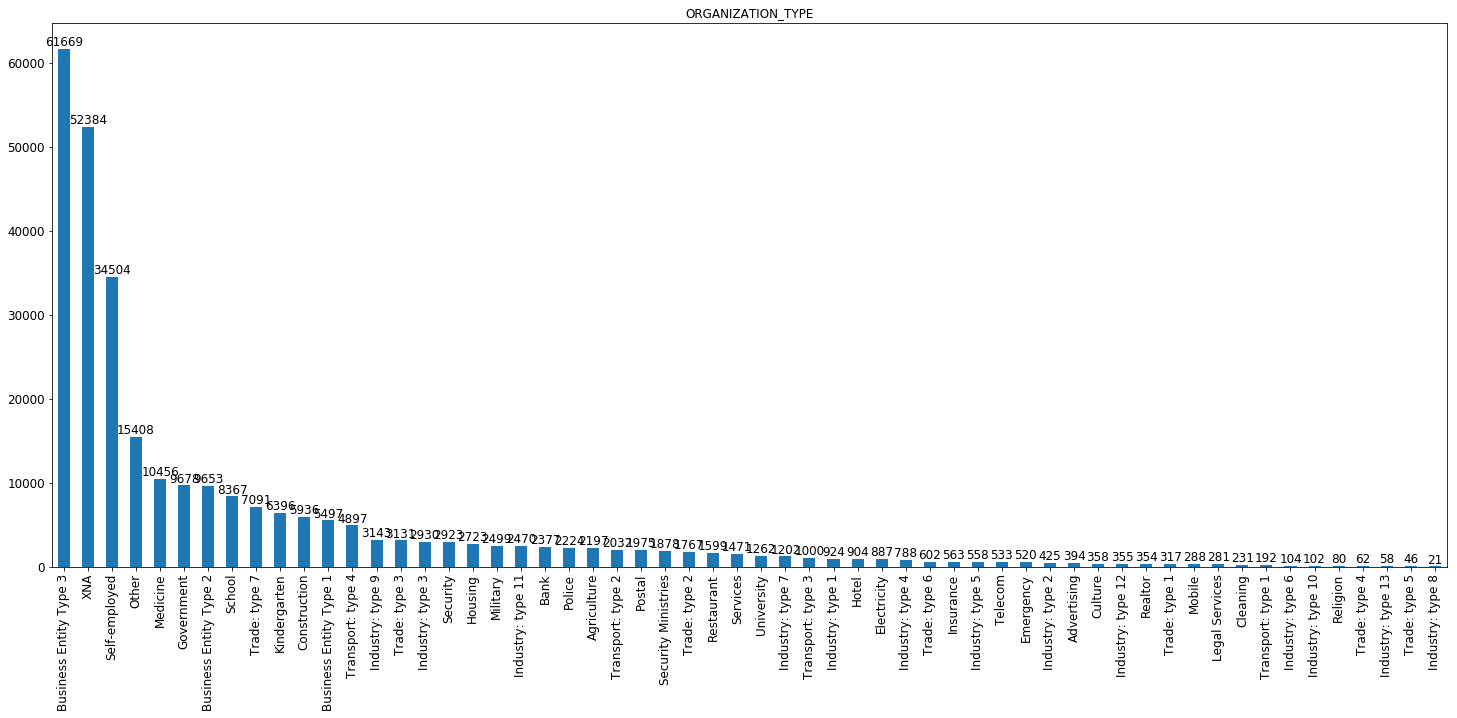

In [107]:
uniCatPLOT(df_others,"ORGANIZATION_TYPE")

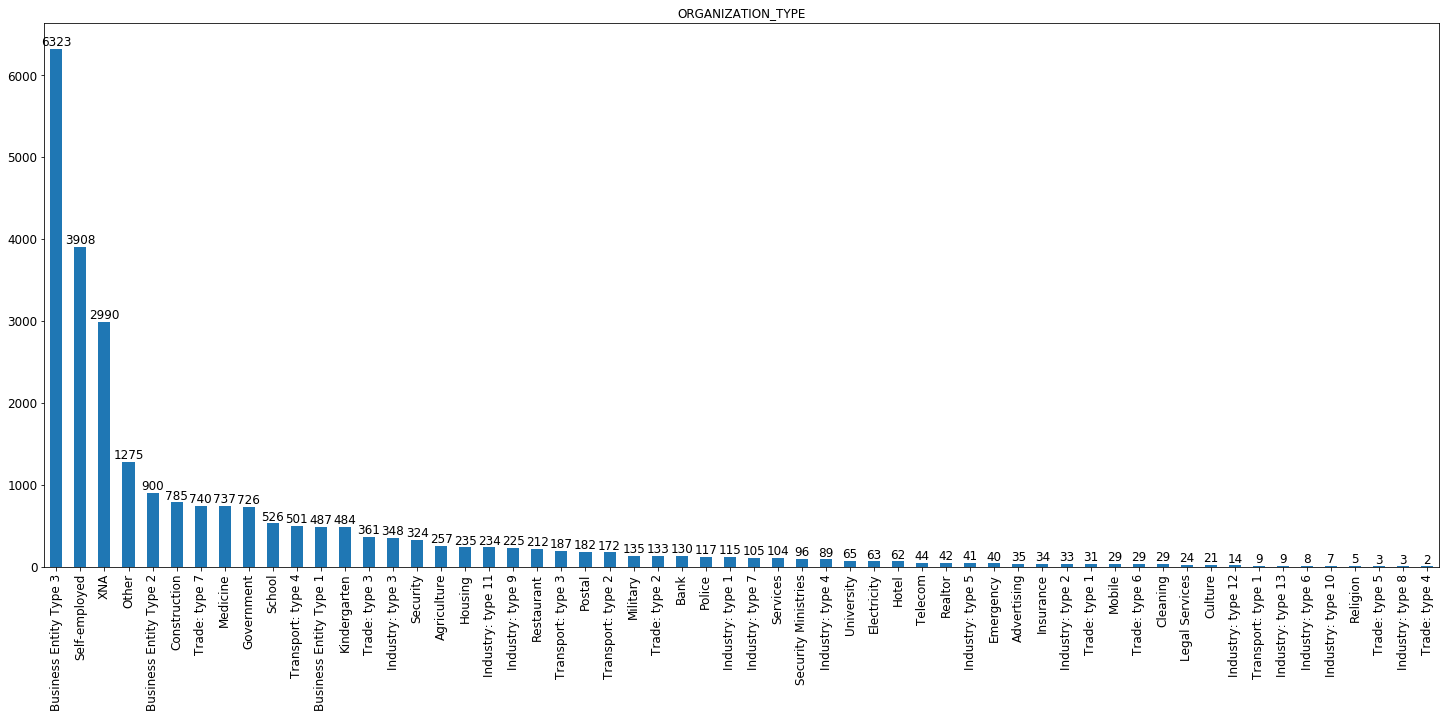

In [108]:
uniCatPLOT(df_diff,"ORGANIZATION_TYPE")

In [109]:
precentagedata(df_diff,"ORGANIZATION_TYPE","Self-employed")
precentagedata(df_others,"ORGANIZATION_TYPE","Self-employed")

15.74219536757301
12.20576894504857


Not much influence of Organization type on the difficulty in repayment

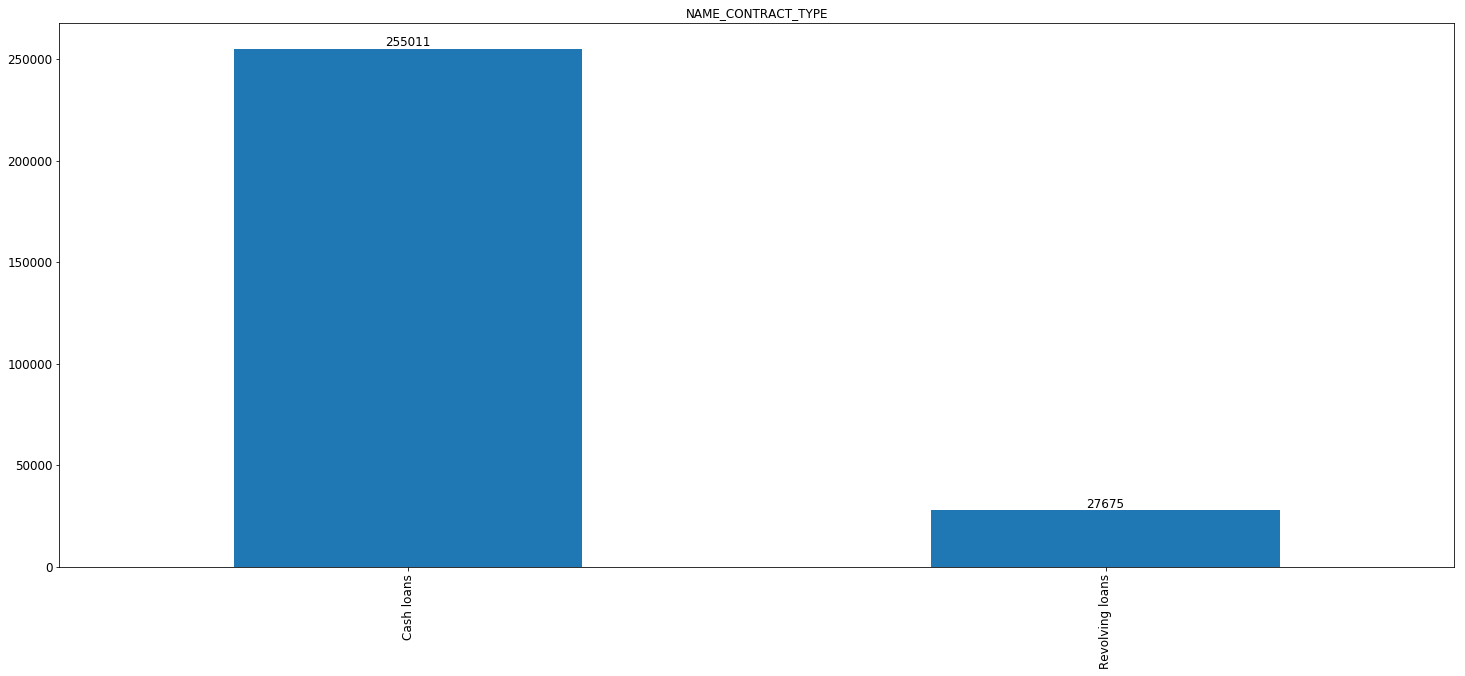

In [110]:
uniCatPLOT(df_others,"NAME_CONTRACT_TYPE")

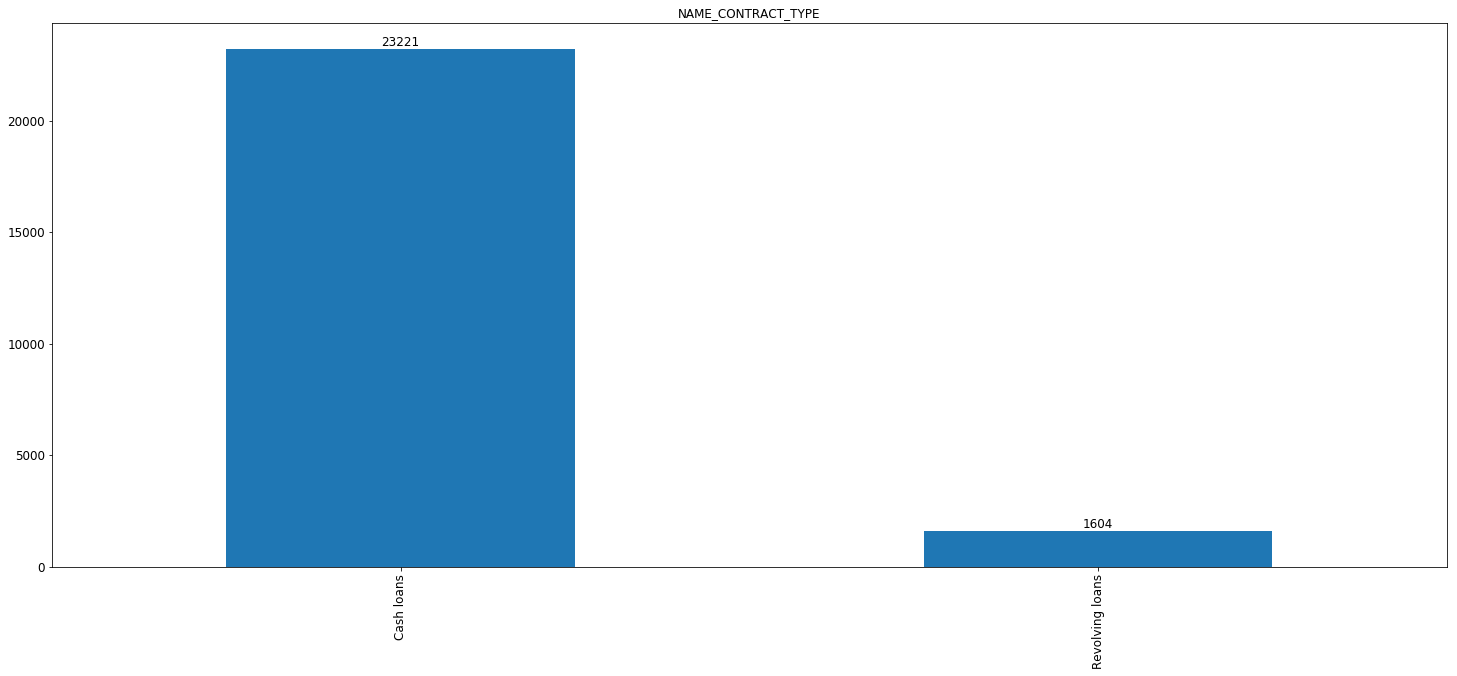

In [111]:
uniCatPLOT(df_diff,"NAME_CONTRACT_TYPE")

In [112]:
precentagedata(df_diff,"NAME_CONTRACT_TYPE","Revolving loans")

6.4612286002014105


In [113]:
precentagedata(df_others,"NAME_CONTRACT_TYPE","Revolving loans")

9.790014362225225


Revolving loans are less likely yo face difficulty in repayment but not a strong driving force. as difference and number of samples are low

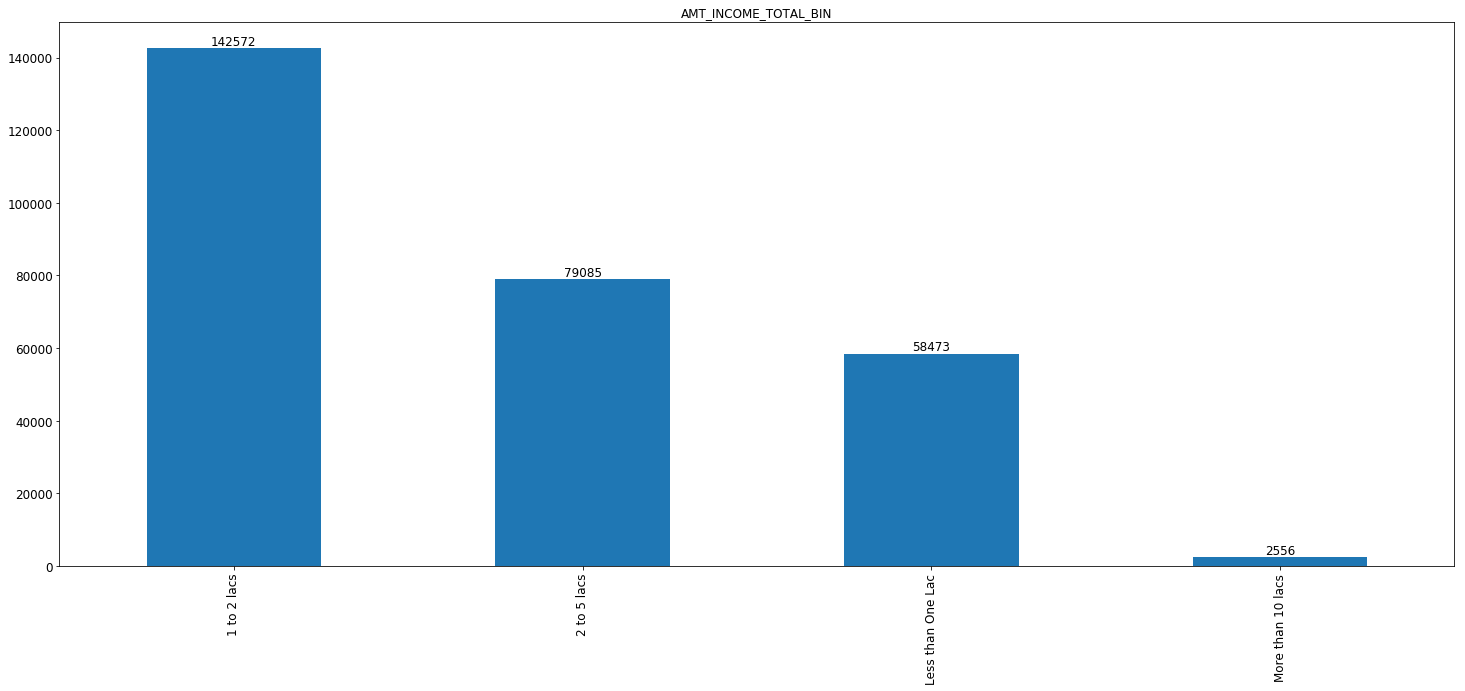

In [114]:
#Now lets look at our Bined values

uniCatPLOT(df_others,"AMT_INCOME_TOTAL_BIN")

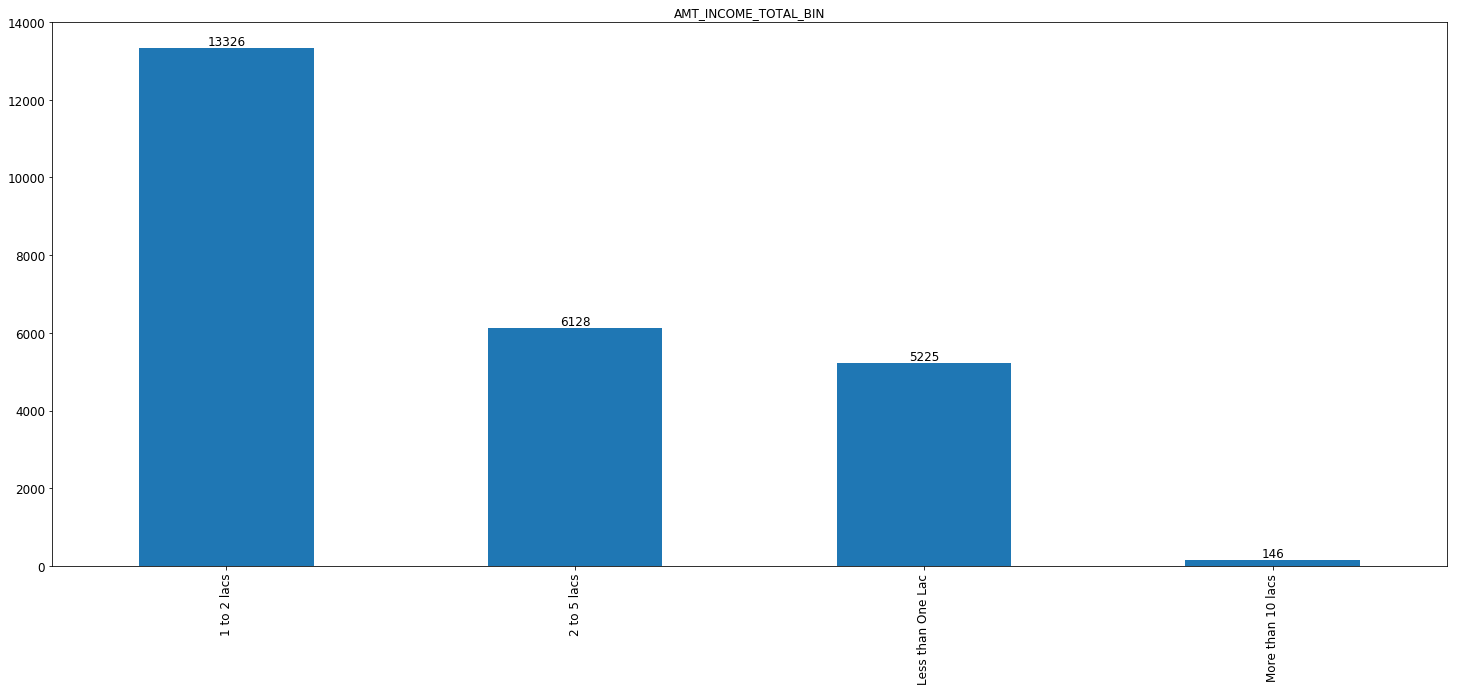

In [115]:
uniCatPLOT(df_diff,"AMT_INCOME_TOTAL_BIN")

In [116]:
precentagedata(df_diff,"AMT_INCOME_TOTAL_BIN","2 to 5 lacs")
precentagedata(df_others,"AMT_INCOME_TOTAL_BIN","2 to 5 lacs")

24.68479355488419
27.976270490933402


Income amount not a strong indicator

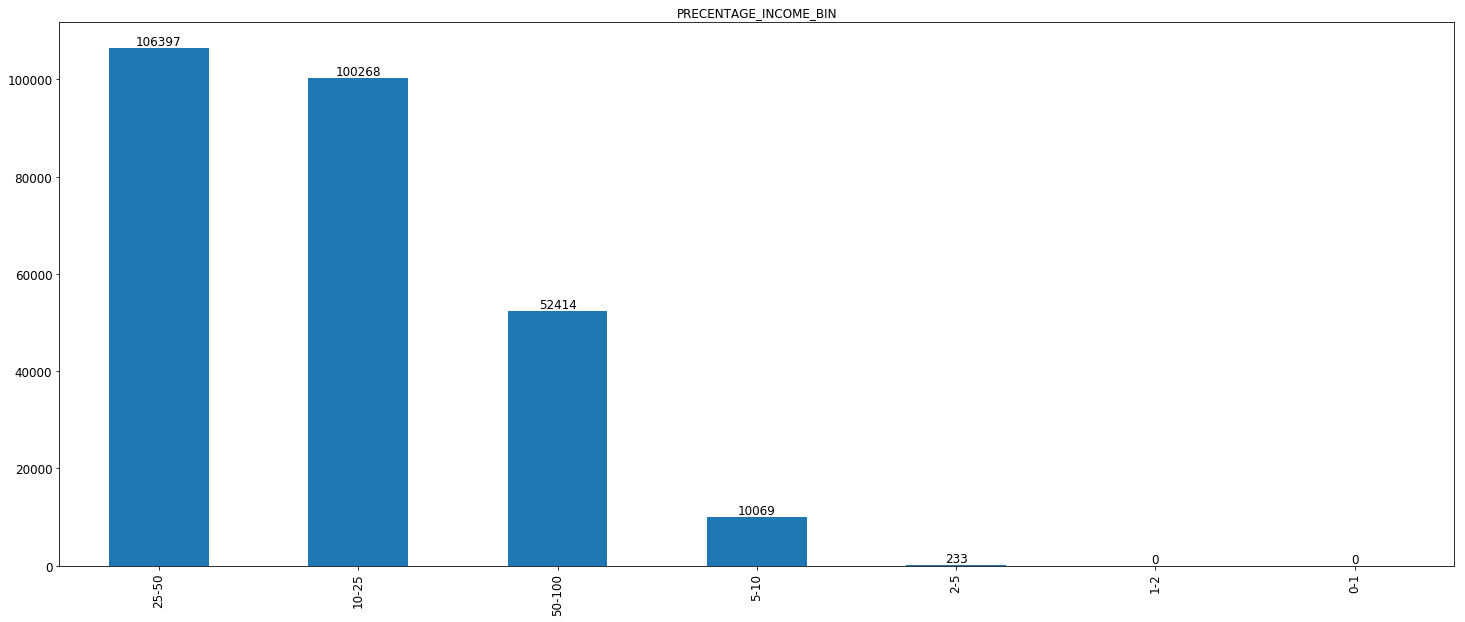

In [117]:
uniCatPLOT(df_others,"PRECENTAGE_INCOME_BIN")

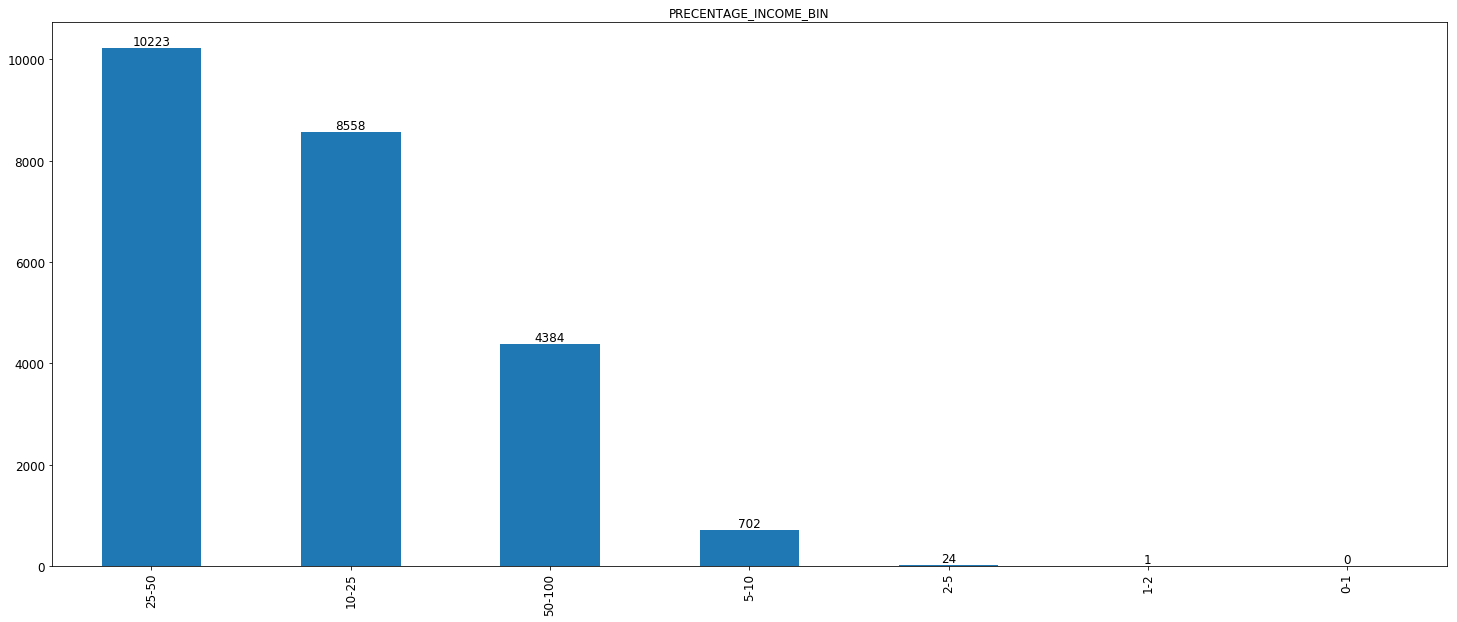

In [118]:
uniCatPLOT(df_diff,"PRECENTAGE_INCOME_BIN")

In [119]:
precentagedata(df_diff,"PRECENTAGE_INCOME_BIN","25-50")
precentagedata(df_others,"PRECENTAGE_INCOME_BIN","25-50")

41.18026183282981
37.63787382466765


Precentage of income with respective to credit amount also not a strong indicator

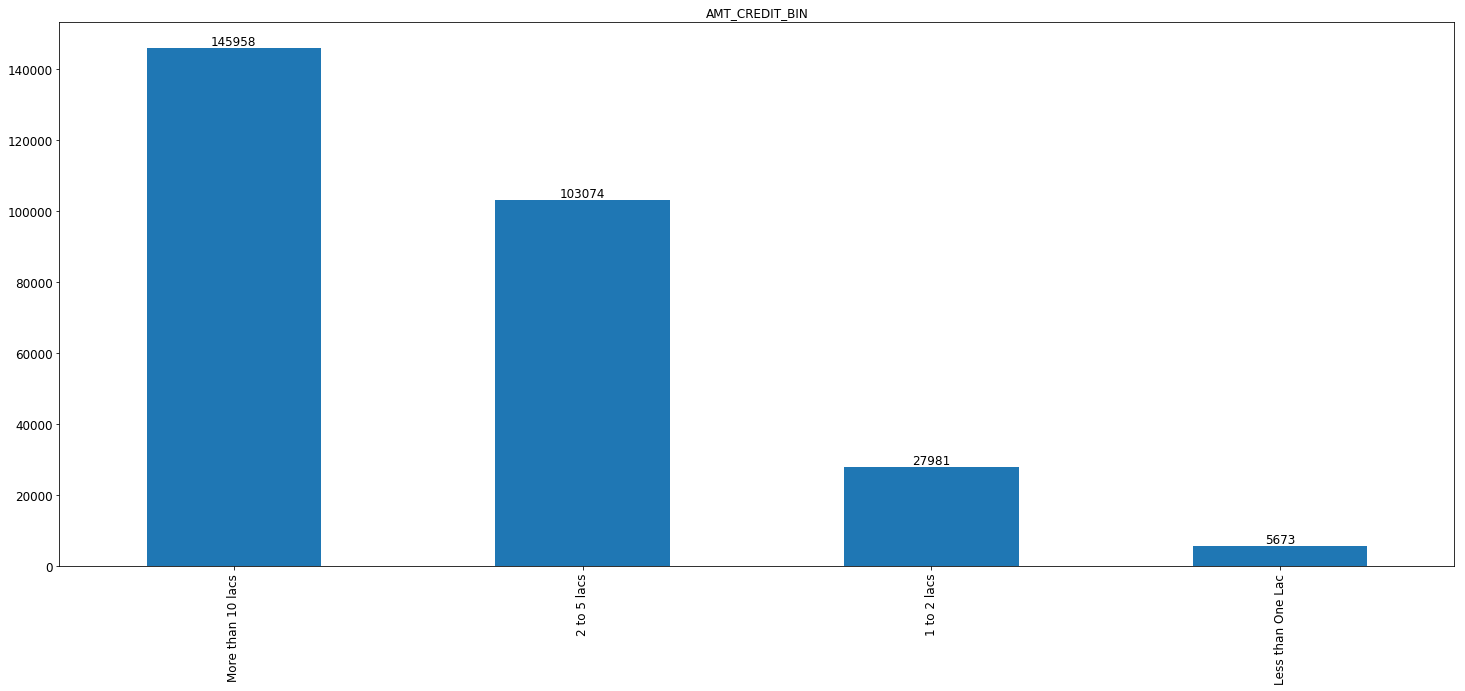

In [120]:
uniCatPLOT(df_others,"AMT_CREDIT_BIN")

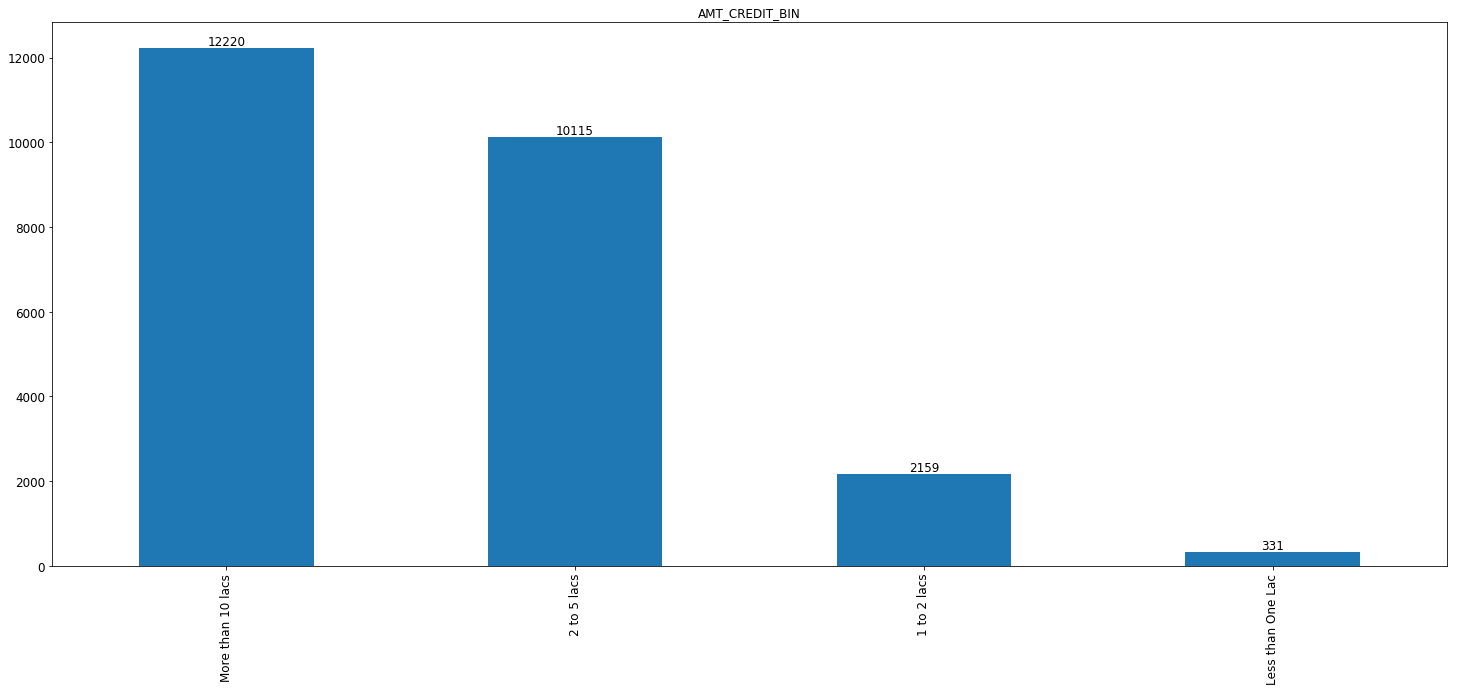

In [121]:
uniCatPLOT(df_diff,"AMT_CREDIT_BIN")

In [122]:
precentagedata(df_diff,"AMT_CREDIT_BIN","More than 10 lacs")
precentagedata(df_others,"AMT_CREDIT_BIN","More than 10 lacs")

49.2245720040282
51.63255343384533


Credit amount not a strong influencer

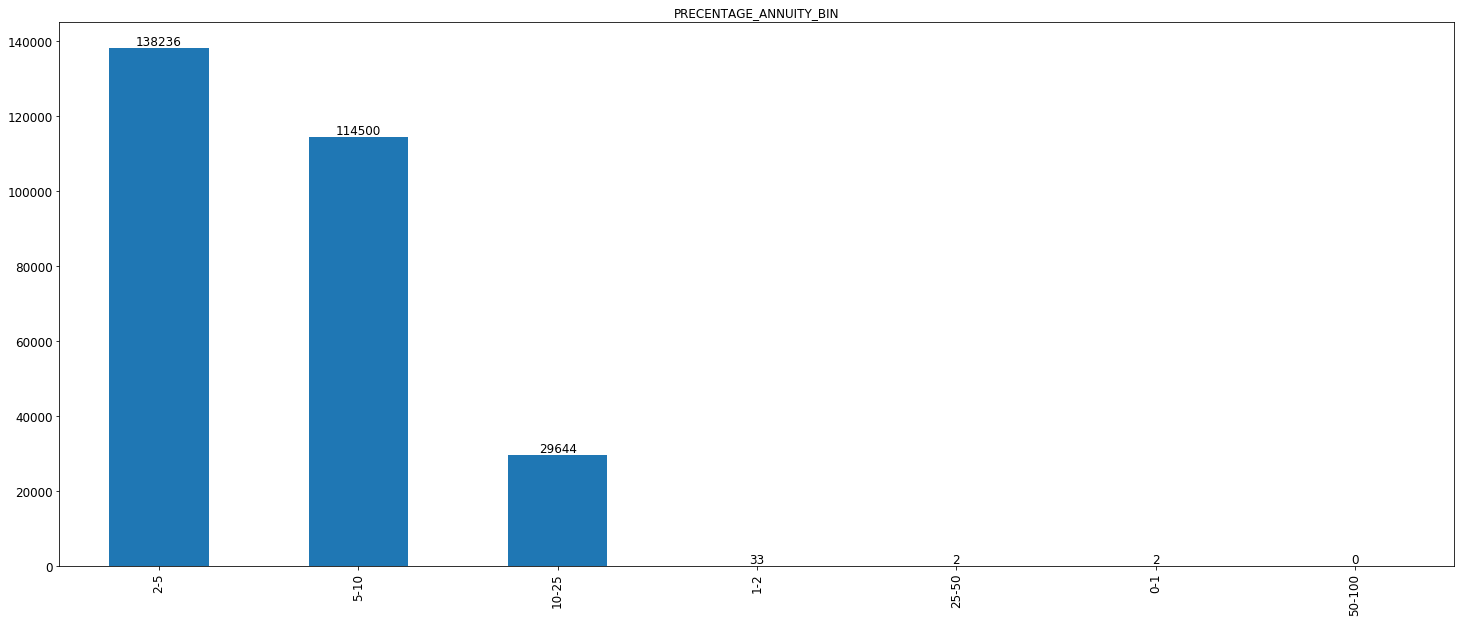

In [123]:
#Lets look at precentage of annuity
uniCatPLOT(df_others,"PRECENTAGE_ANNUITY_BIN")

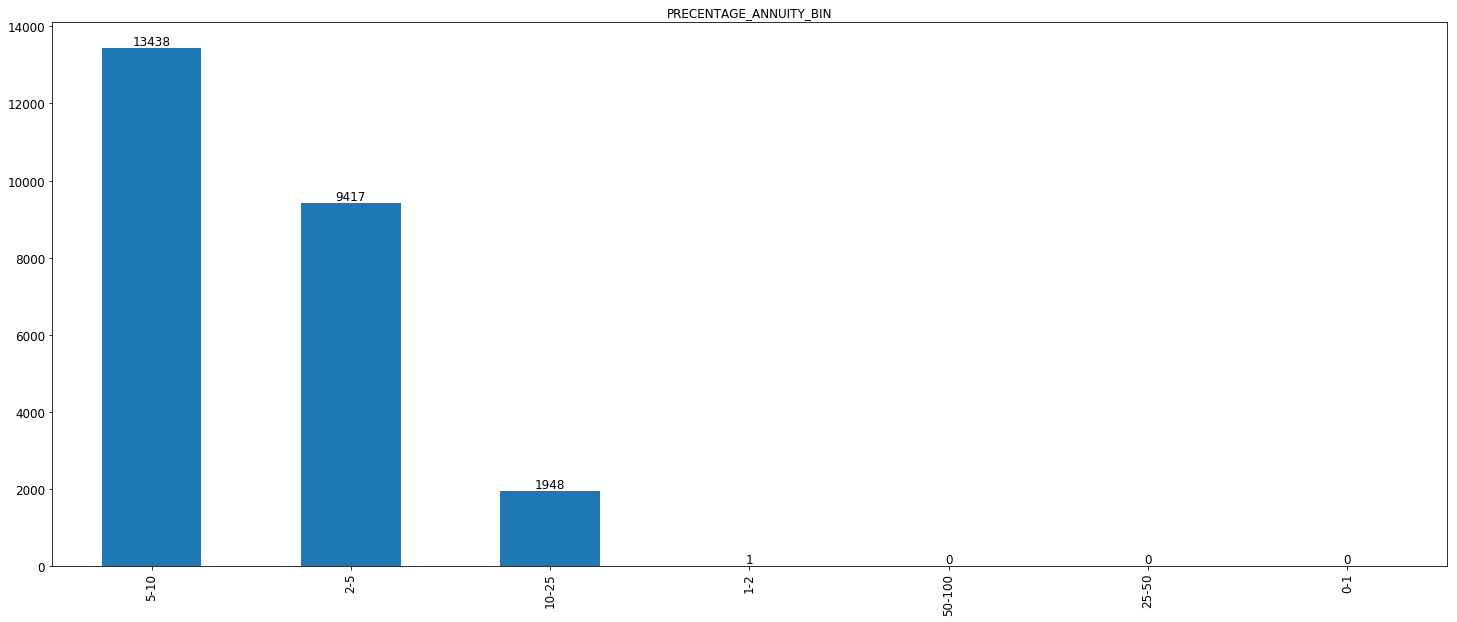

In [124]:
uniCatPLOT(df_diff,"PRECENTAGE_ANNUITY_BIN")

In [125]:
precentagedata(df_diff,"PRECENTAGE_ANNUITY_BIN","5-10")
precentagedata(df_others,"PRECENTAGE_ANNUITY_BIN","5-10")

54.13091641490433
40.50430513007365


If you have high Annunity precentage more likely to face difficulty in repayment

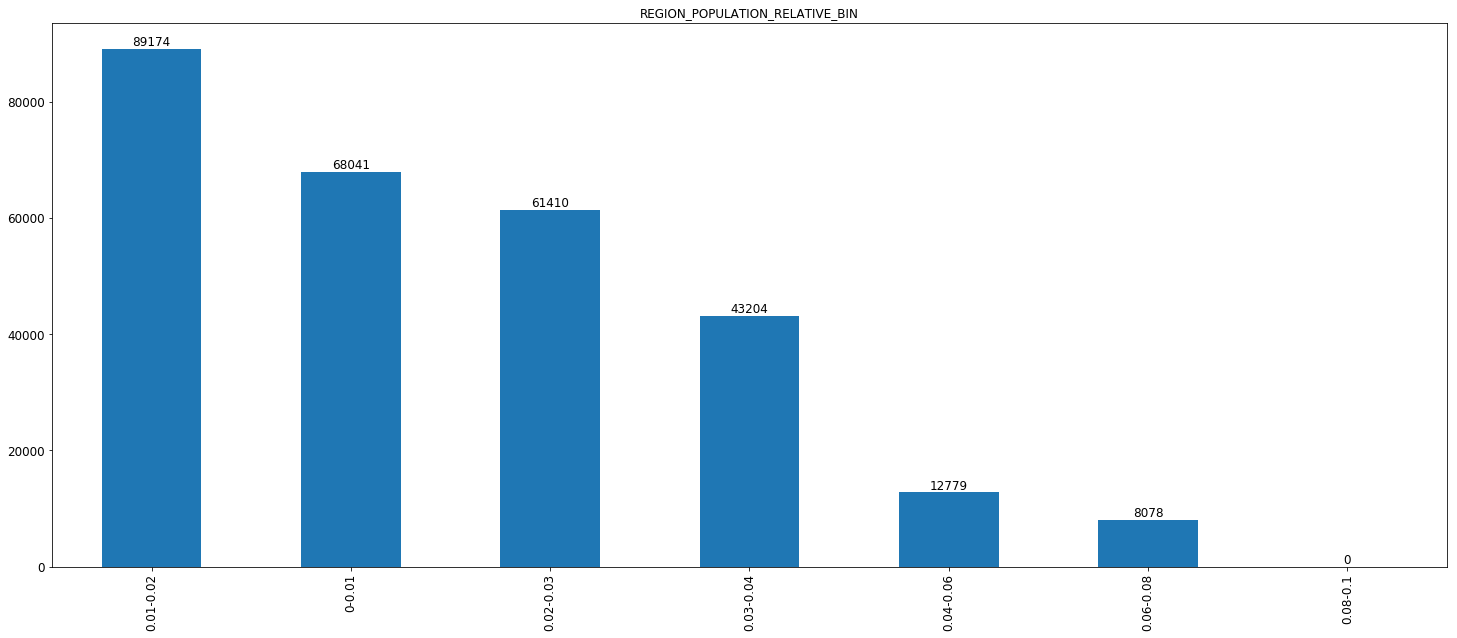

In [126]:
#Lets look at the relative population of applicants
uniCatPLOT(df_others,"REGION_POPULATION_RELATIVE_BIN")

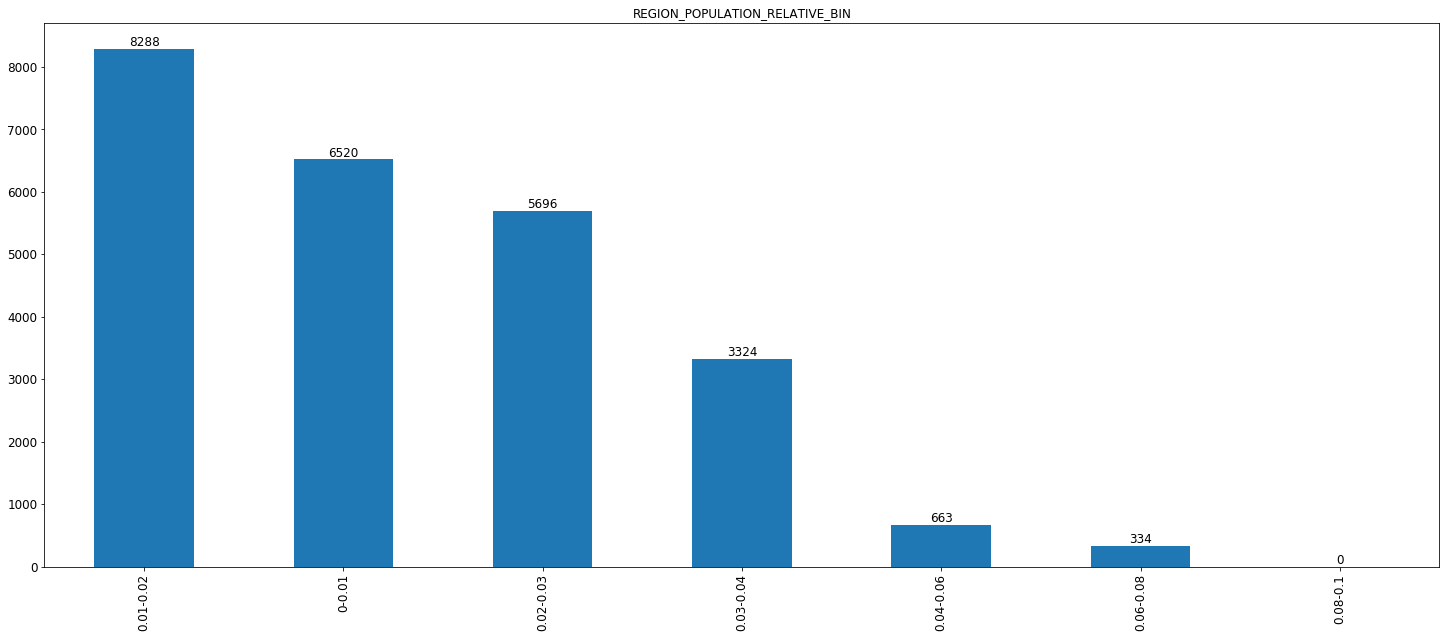

In [127]:
uniCatPLOT(df_diff,"REGION_POPULATION_RELATIVE_BIN")

In [128]:
precentagedata(df_diff,"REGION_POPULATION_RELATIVE_BIN","0.03-0.04")
precentagedata(df_others,"REGION_POPULATION_RELATIVE_BIN","0.03-0.04")

13.389728096676738
15.283388636154601


Relative population of region weak indicator of replayment difficulty

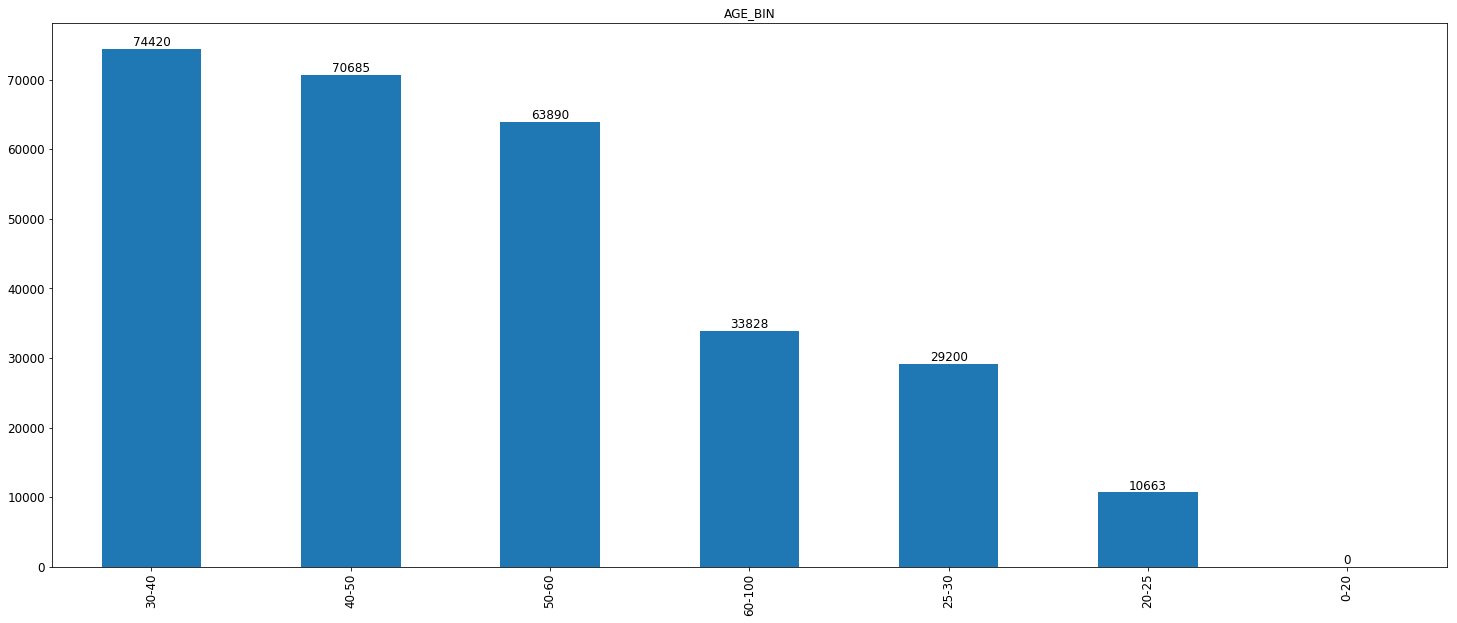

In [129]:
#Lets look at the age
uniCatPLOT(df_others,"AGE_BIN")

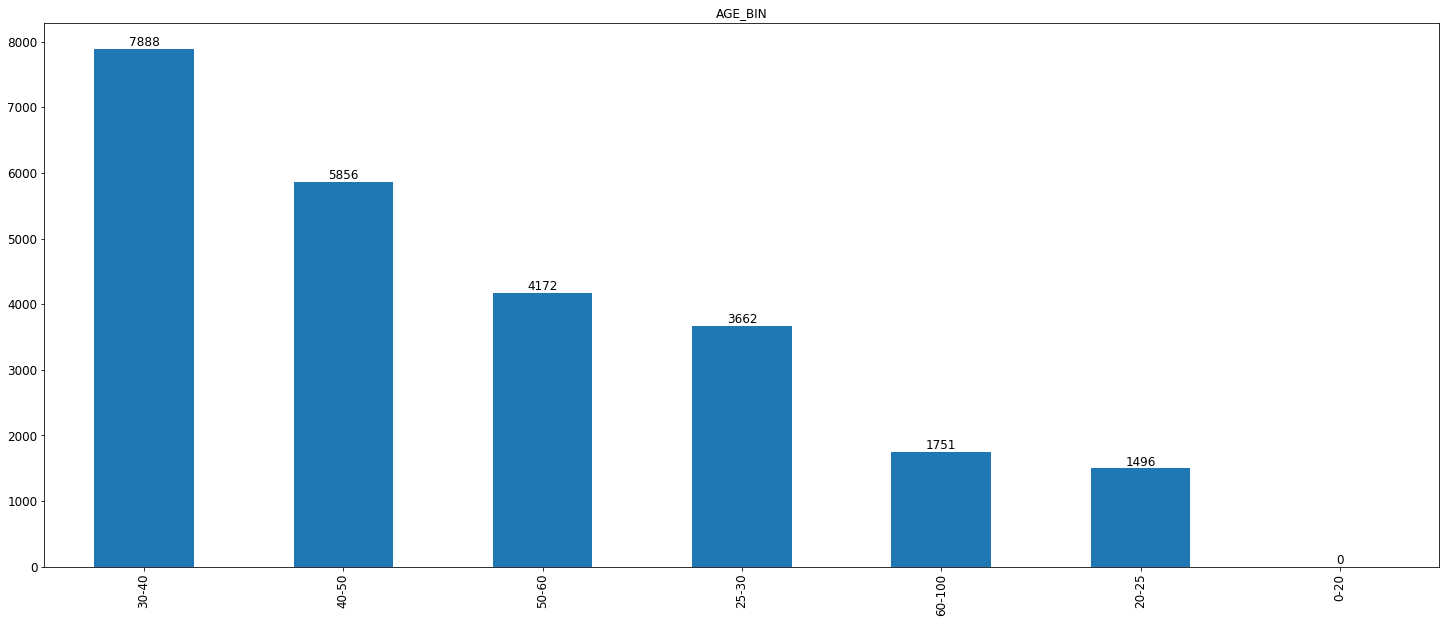

In [130]:
uniCatPLOT(df_diff,"AGE_BIN")

In [131]:
precentagedata(df_diff,"AGE_BIN","60-100")
precentagedata(df_others,"AGE_BIN","60-100")

7.05337361530715
11.966634357555733


Higher the age less likely to face difficulty in repayment

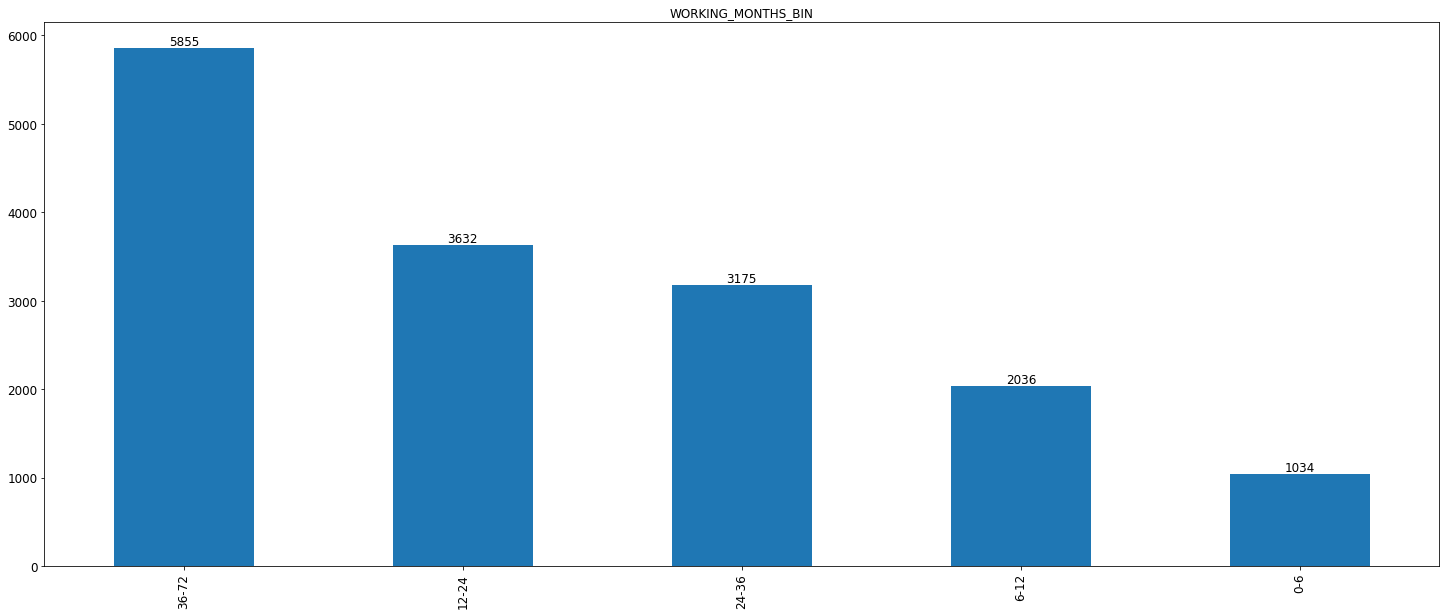

In [132]:
#Lets look at days of employment
uniCatPLOT(df_diff,"WORKING_MONTHS_BIN")

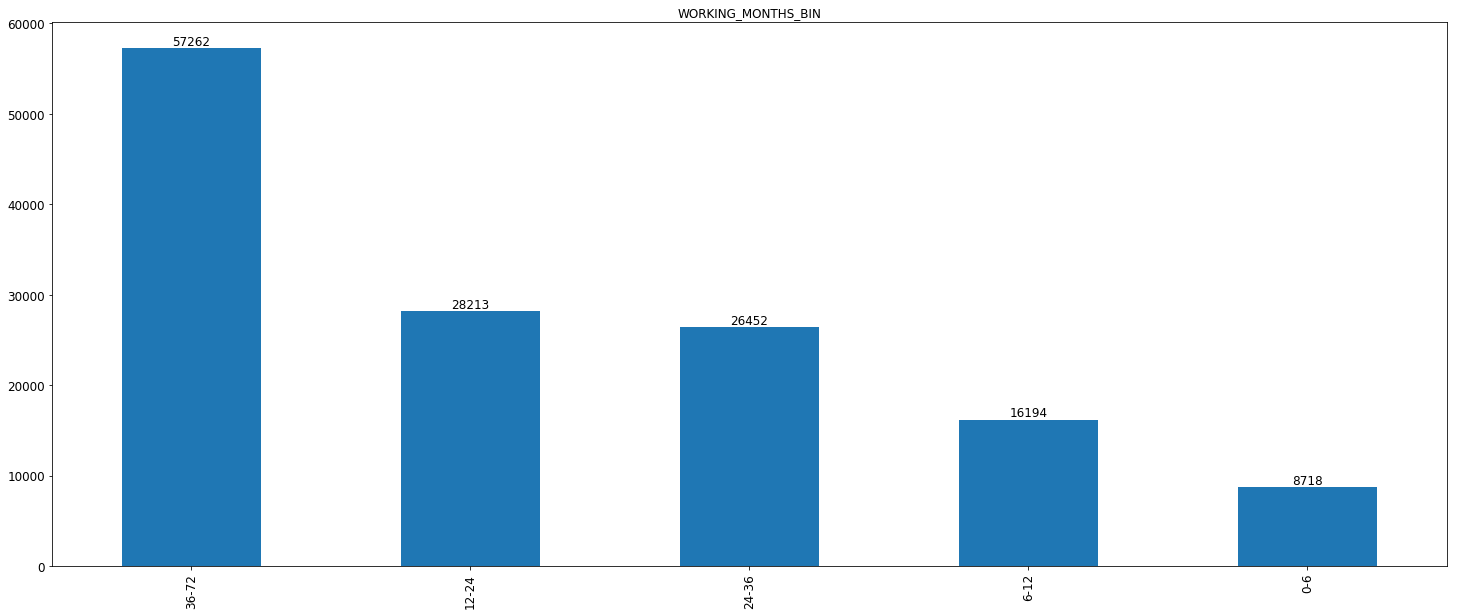

In [133]:
uniCatPLOT(df_others,"WORKING_MONTHS_BIN")

In [134]:
precentagedata(df_diff,"WORKING_MONTHS_BIN","36-72")
precentagedata(df_others,"WORKING_MONTHS_BIN","36-72")

23.585095669687814
20.256397557714212


Most applicants holding jobs for 36-72 months so not variation in the two databases

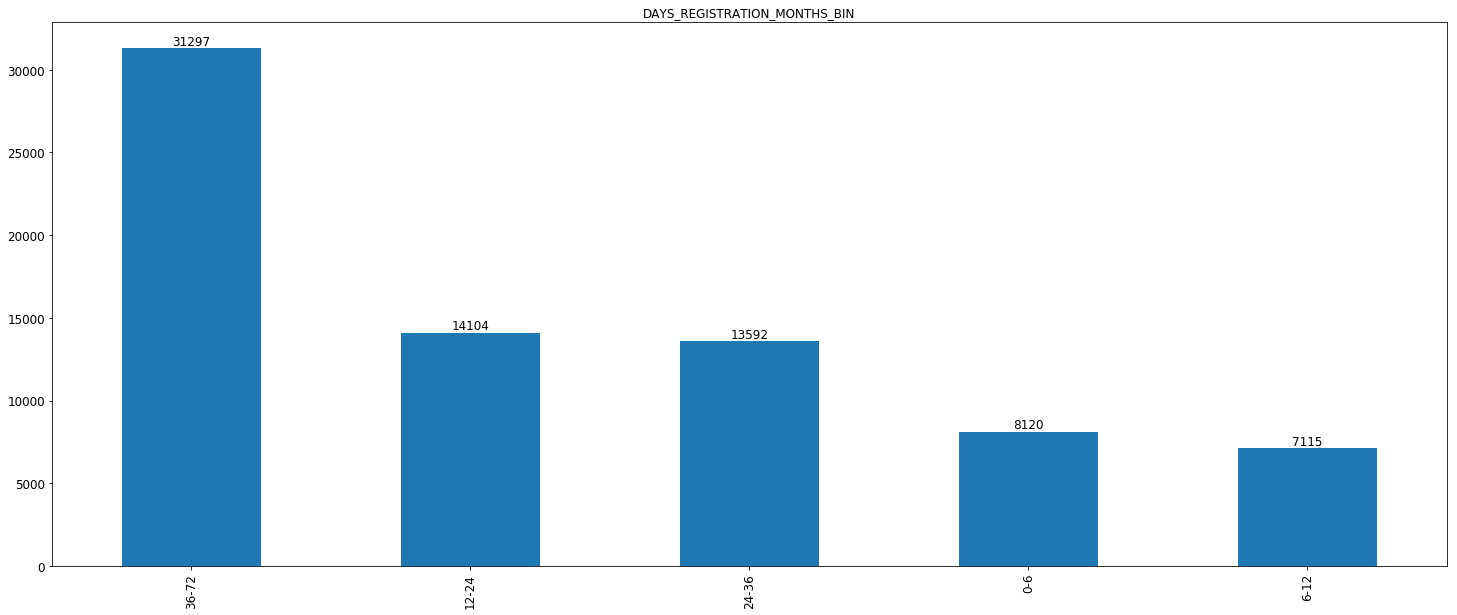

In [135]:
#Lets looking client registration
uniCatPLOT(df_others,"DAYS_REGISTRATION_MONTHS_BIN")

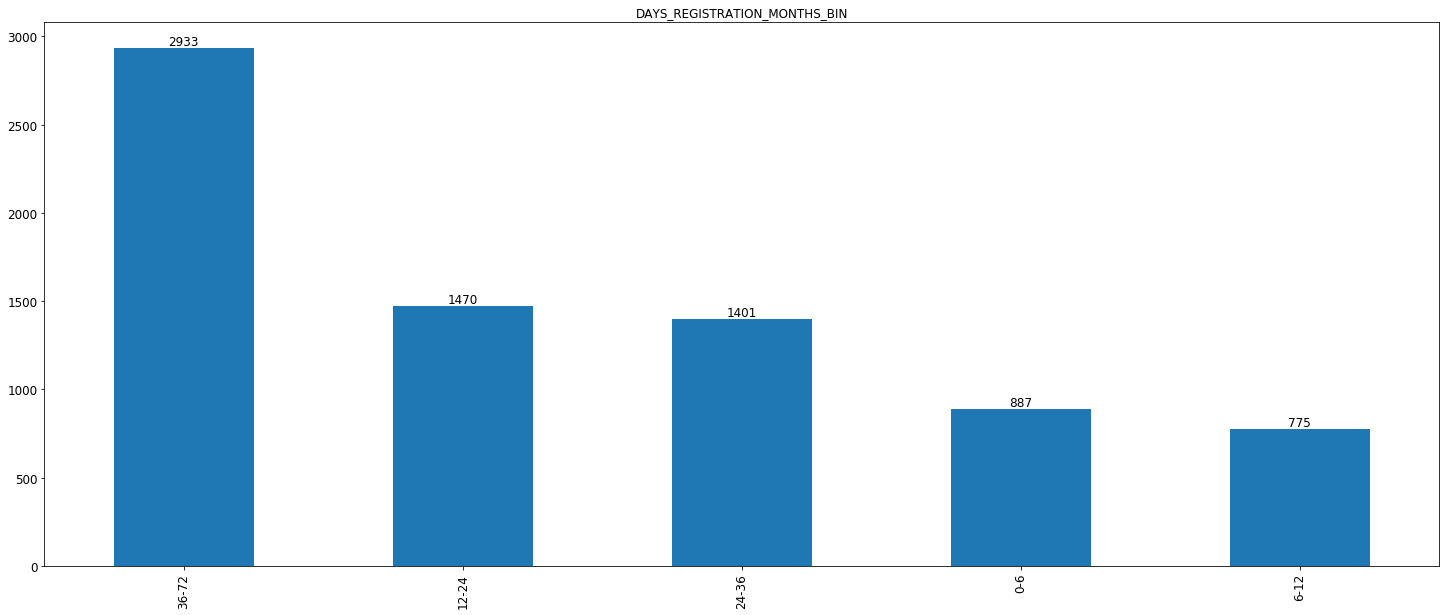

In [136]:
uniCatPLOT(df_diff,"DAYS_REGISTRATION_MONTHS_BIN")

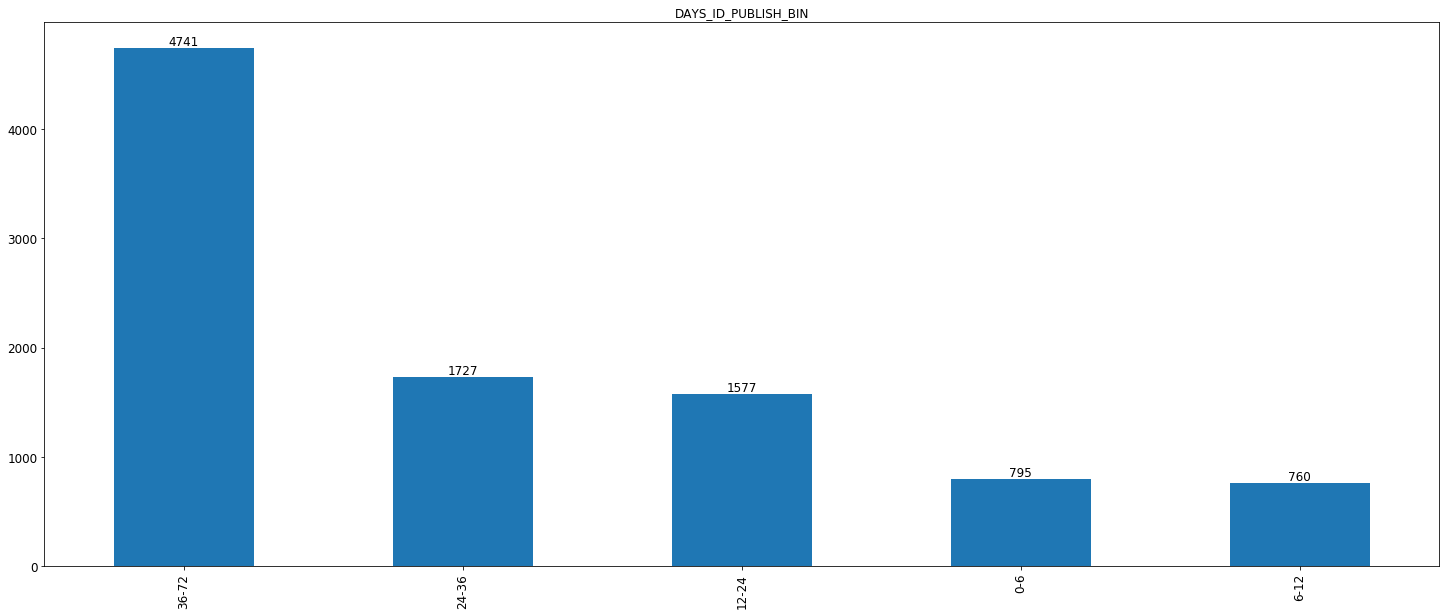

In [137]:
uniCatPLOT(df_diff,"DAYS_ID_PUBLISH_BIN")

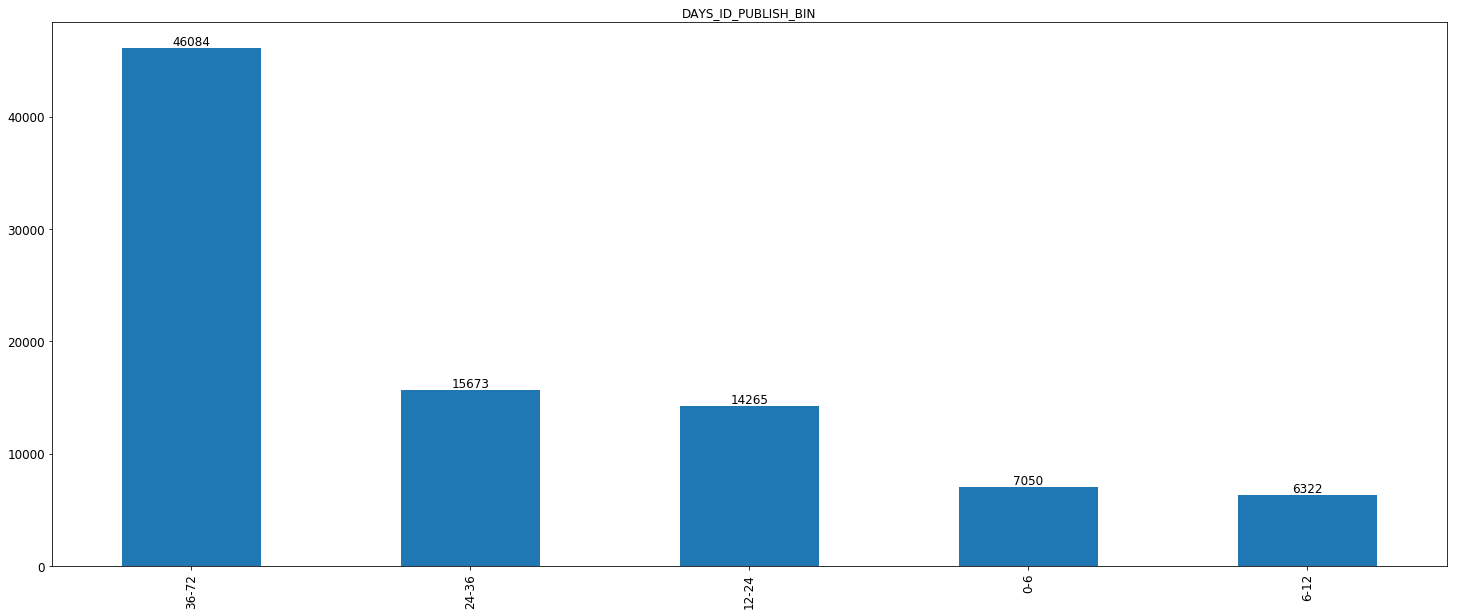

In [138]:
uniCatPLOT(df_others,"DAYS_ID_PUBLISH_BIN")

Most applicants registered for 36-72 months so not variation in the two databases

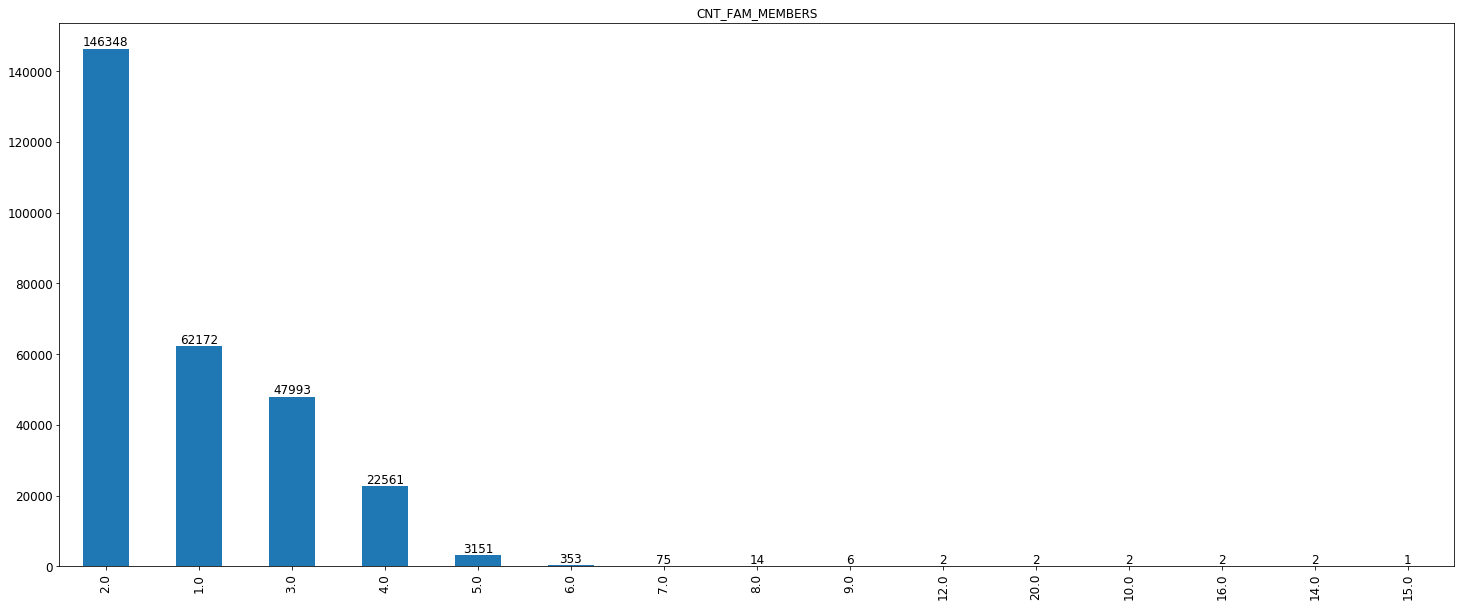

In [139]:
#Lets look at client families
uniCatPLOT(df_others,"CNT_FAM_MEMBERS")

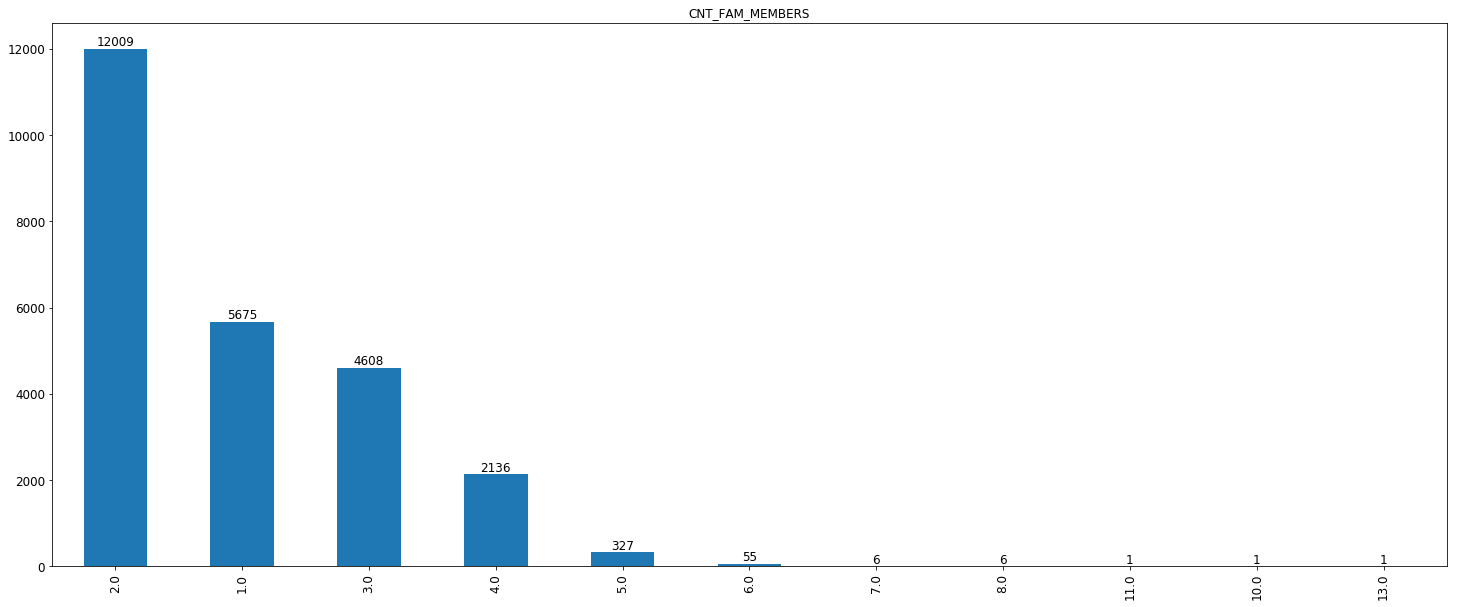

In [140]:
uniCatPLOT(df_diff,"CNT_FAM_MEMBERS")

Similar distribution of family memebers for the 2 databases

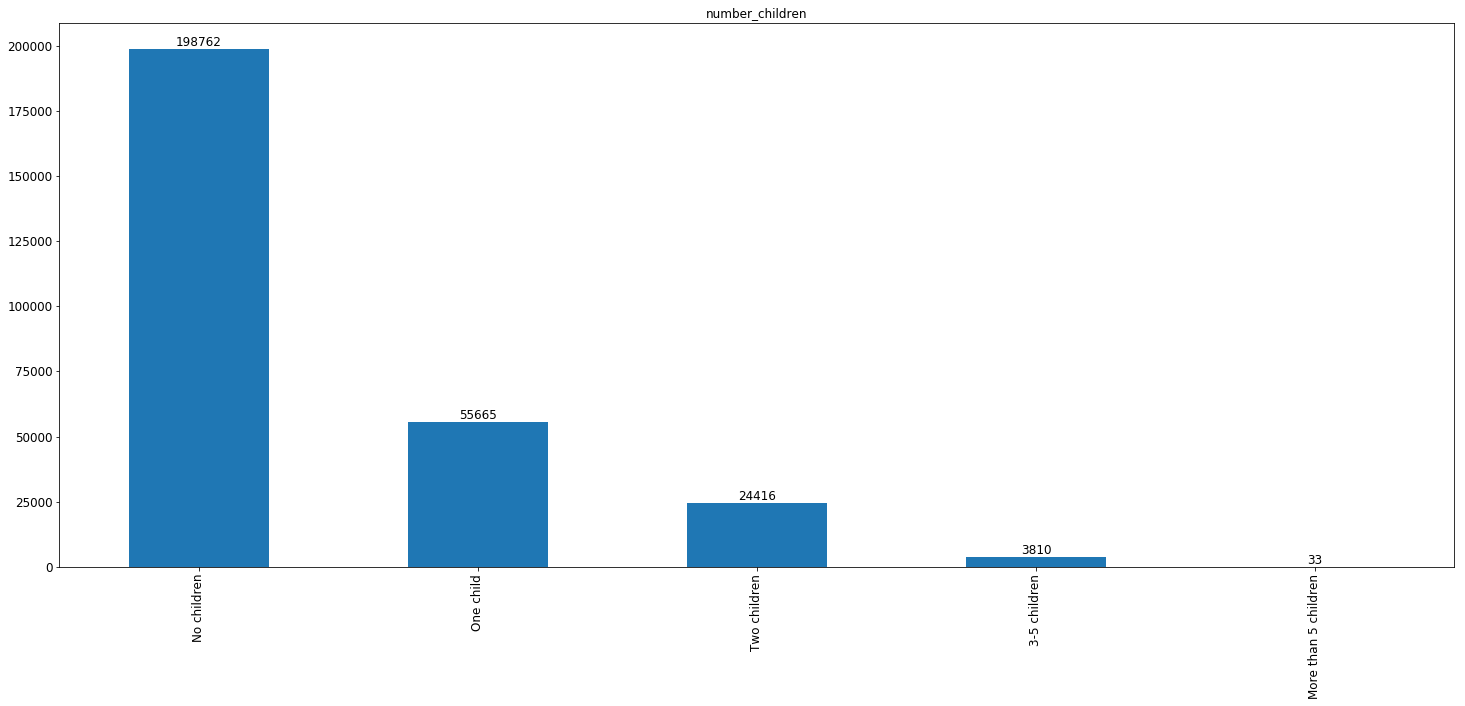

In [141]:
uniCatPLOT(df_others,"number_children")

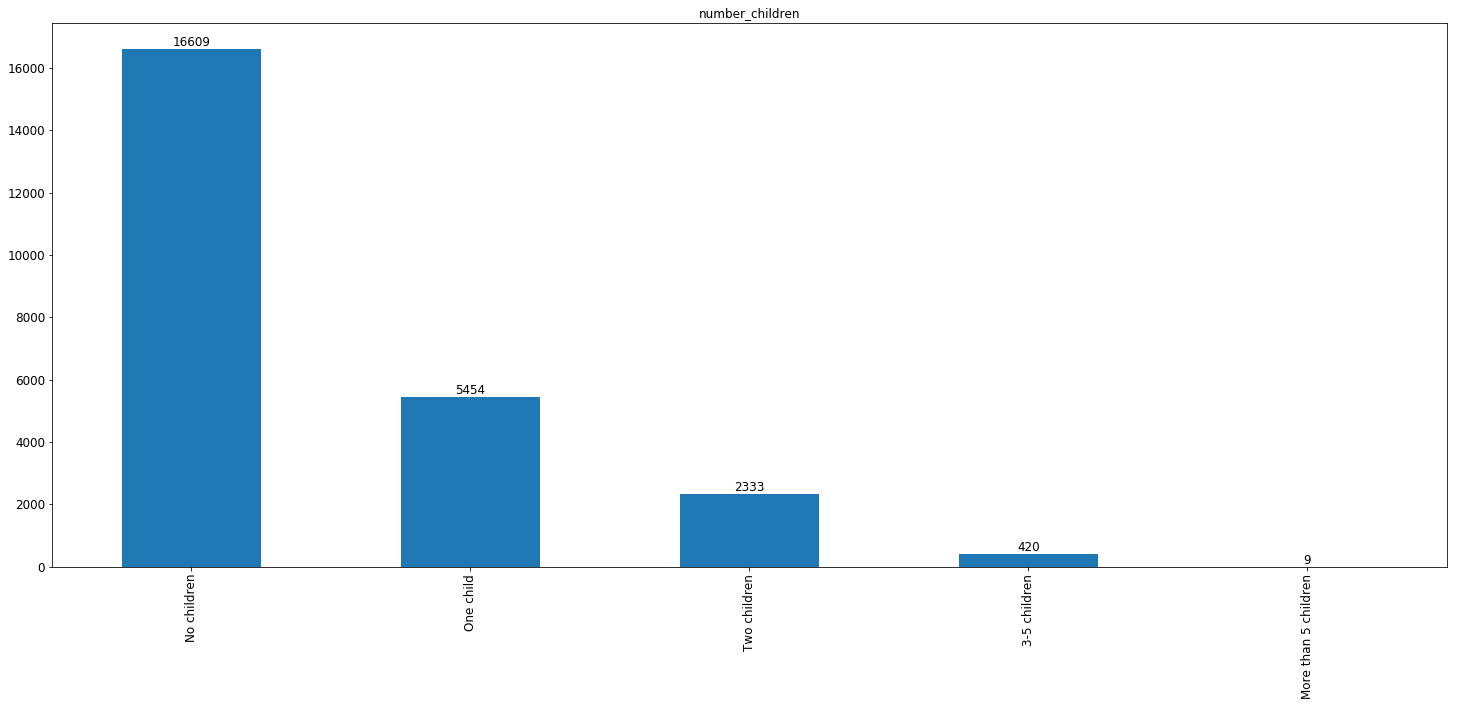

In [142]:
uniCatPLOT(df_diff,"number_children")

In [143]:
precentagedata(df_diff,"number_children","One child")
precentagedata(df_others,"number_children","One child")

21.96978851963746
19.691459782231878


Similar distribution for the two databases

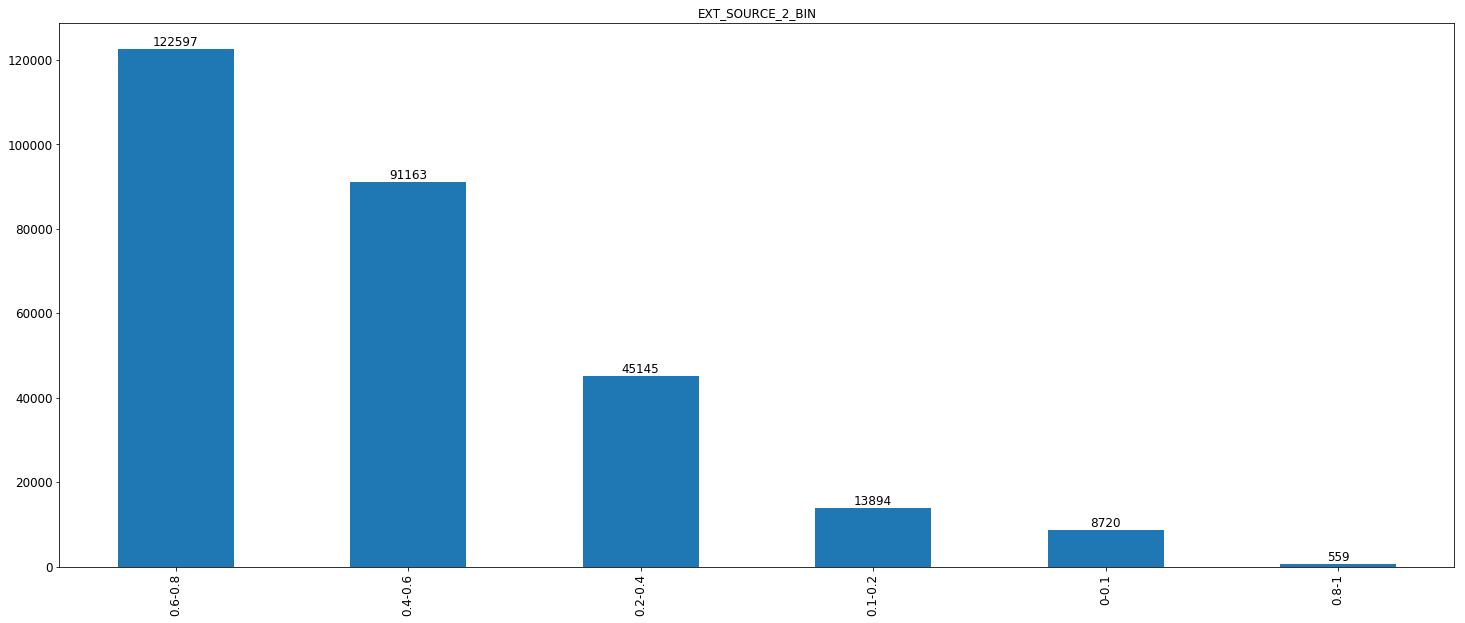

In [144]:
uniCatPLOT(df_others,"EXT_SOURCE_2_BIN")

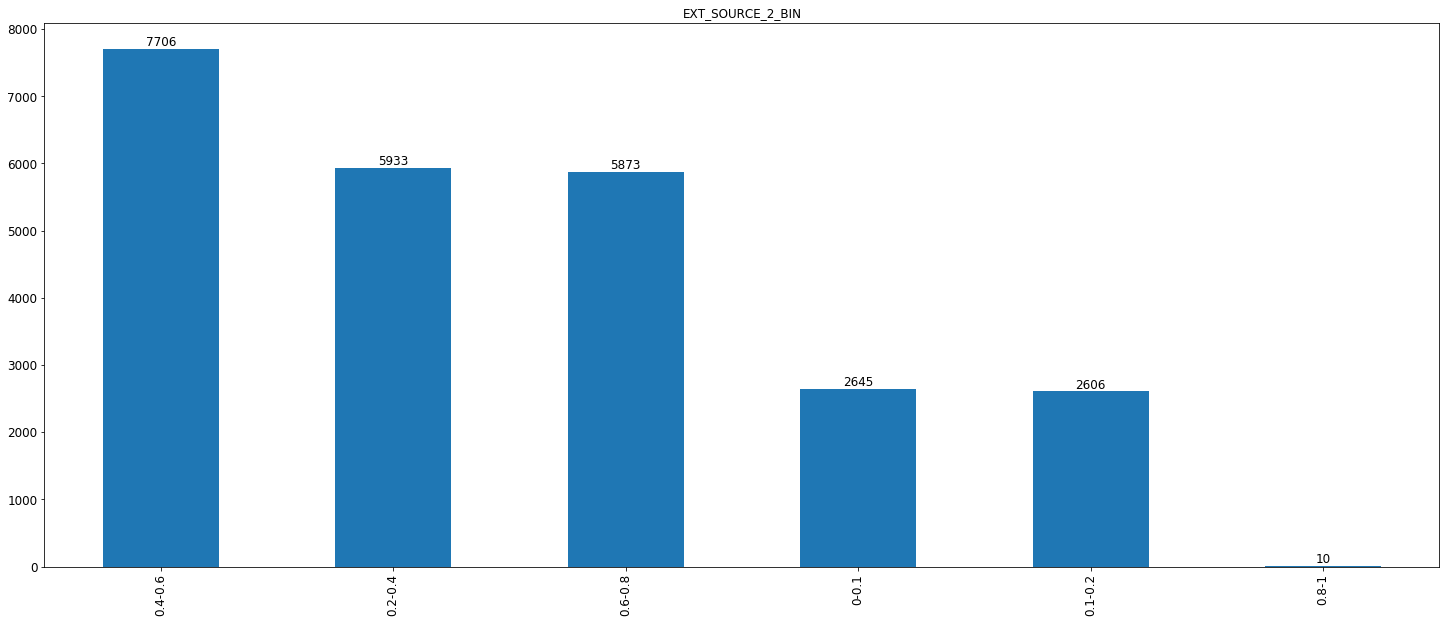

In [145]:
uniCatPLOT(df_diff,"EXT_SOURCE_2_BIN")

External source 02 have much higher number of applicants with lower rating clear indicator of difficulty to repay

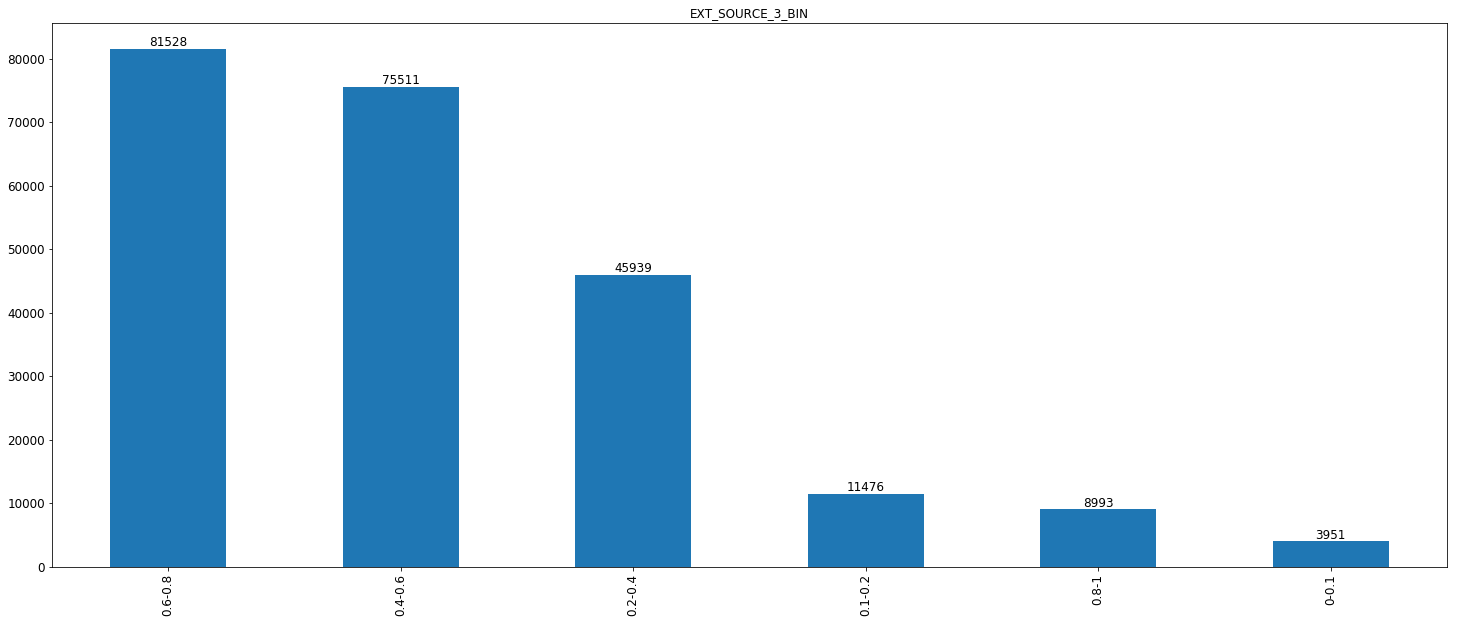

In [146]:
uniCatPLOT(df_others,"EXT_SOURCE_3_BIN")

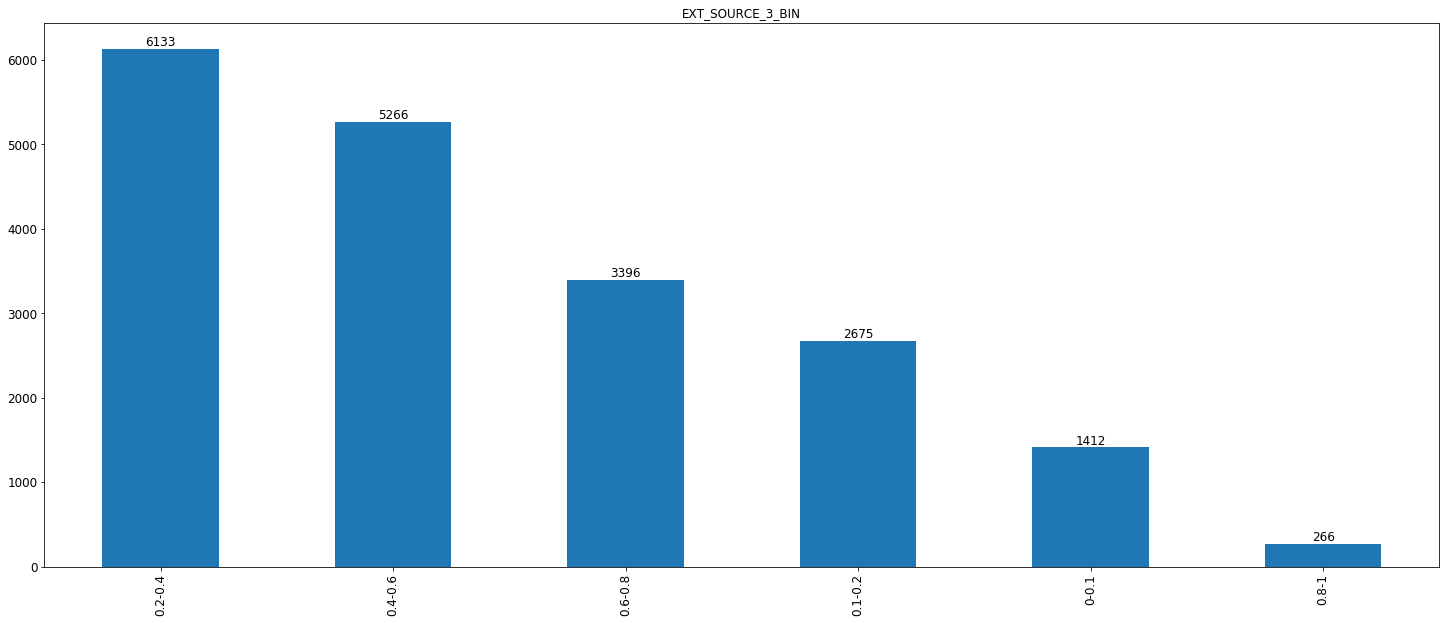

In [147]:
uniCatPLOT(df_diff,"EXT_SOURCE_3_BIN")

Similar to External 02 even in external 03 much higher number of lower scores

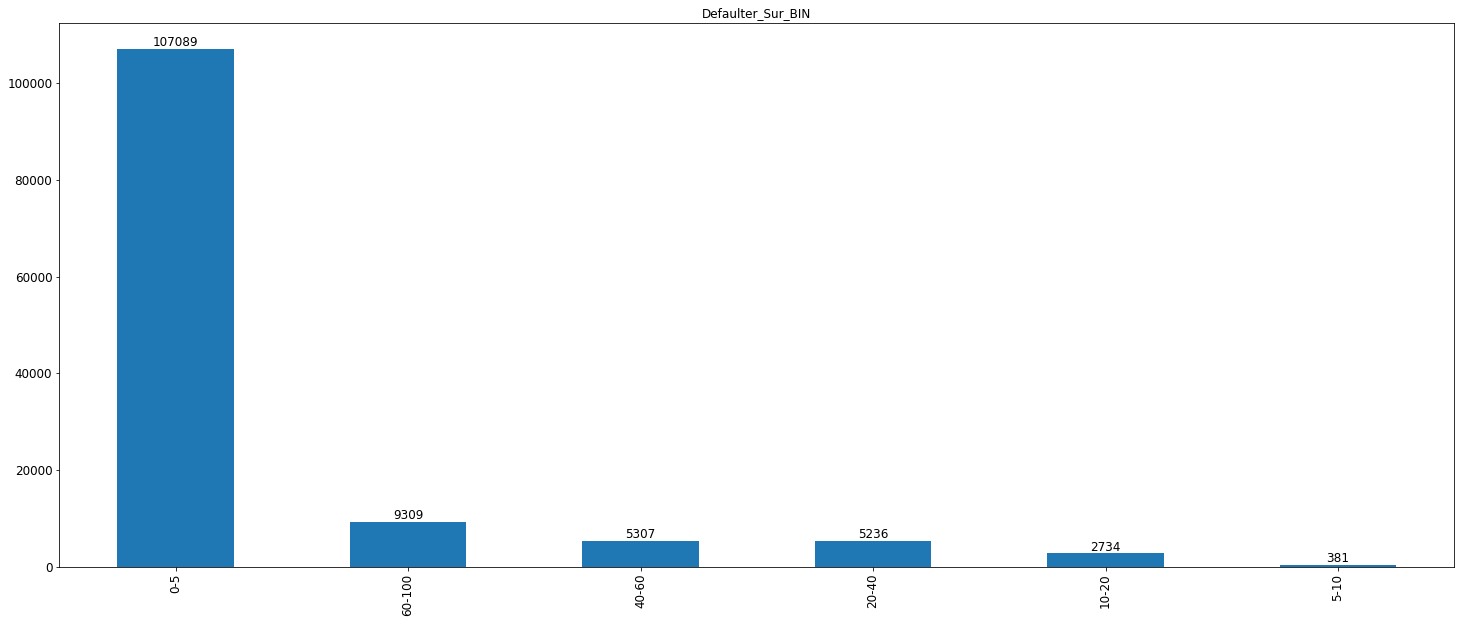

In [148]:
uniCatPLOT(df_others,"Defaulter_Sur_BIN")

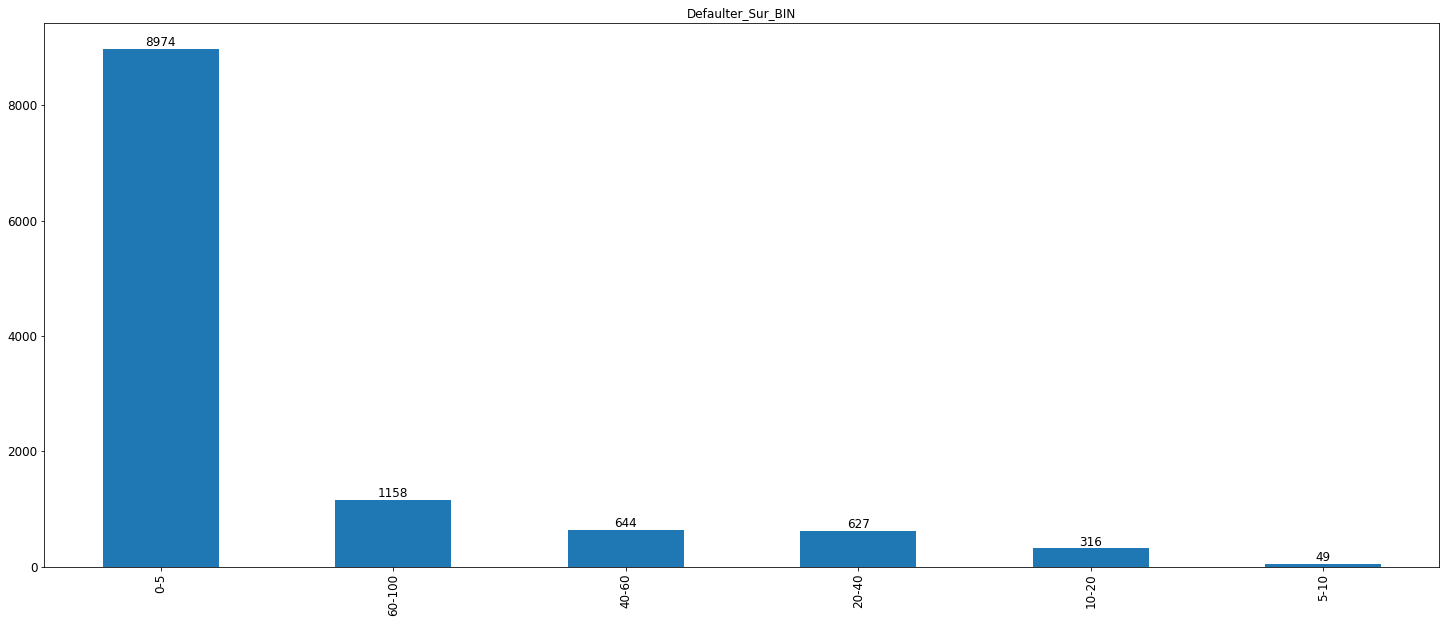

In [149]:
uniCatPLOT(df_diff,"Defaulter_Sur_BIN")

In [150]:
precentagedata(df_diff,"Defaulter_Sur_BIN","60-100")
precentagedata(df_others,"Defaulter_Sur_BIN","60-100")

4.664652567975831
3.293053069483455


Similar distribution of defaulter in the survey

In [151]:
#lets look at the previous loans to see how have the applicant performed previously
df_previous = pd.read_csv(r"C:\Users\esuspam\Documents\Coursera\Data_Science\05_Statistics_and_EDA\16_EDA_Case_Study\Group_Case_Study\Data\previous_application.csv",dtype='object')

In [152]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.18283180324152784,0.8673361522198731,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
#Create new columns to for different contract status
def Columns_Contracts(x):
    if x == "Approved":
        return 1
    return 0


df_previous['Approved']=df_previous['NAME_CONTRACT_STATUS'].apply(lambda x: Columns_Contracts(x))

def Columns_Contracts(x):
    if x == "Refused":
        return 1
    return 0


df_previous['Refused']=df_previous['NAME_CONTRACT_STATUS'].apply(lambda x: Columns_Contracts(x))

def Columns_Contracts(x):
    if x == "Canceled":
        return 1
    return 0


df_previous['Canceled']=df_previous['NAME_CONTRACT_STATUS'].apply(lambda x: Columns_Contracts(x))

def Columns_Contracts(x):
    if x == "Unused offer":
        return 1
    return 0


df_previous['Unused offer']=df_previous['NAME_CONTRACT_STATUS'].apply(lambda x: Columns_Contracts(x))

In [154]:
#Group by to get count of different contract status for different clients
df_grouped = df_previous.groupby(['SK_ID_CURR'], as_index=False)['Approved','Refused','Canceled','Unused offer'].sum()

In [155]:
df_grouped.head()

,SK_ID_CURR,Approved,Refused,Canceled,Unused offer
0,100001,1,0,0,0
1,100002,1,0,0,0
2,100003,3,0,0,0
3,100004,1,0,0,0
4,100005,1,0,1,0


In [156]:
#Add this info to the previously create Databases
df_application_fil = pd.merge(df_application_fil, df_grouped, how='inner', on='SK_ID_CURR')
df_others = pd.merge(df_others, df_grouped, how='inner', on='SK_ID_CURR')
df_diff = pd.merge(df_diff, df_grouped, how='inner', on='SK_ID_CURR')

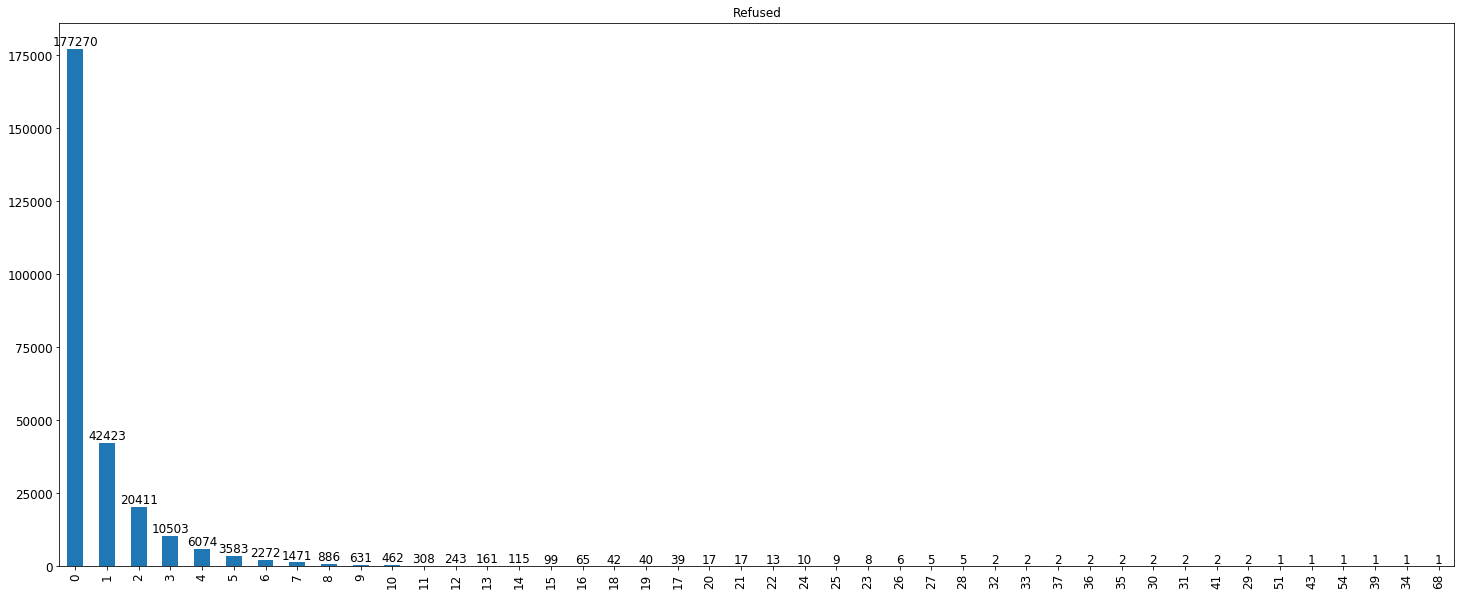

In [157]:
uniCatPLOT(df_others,"Refused")

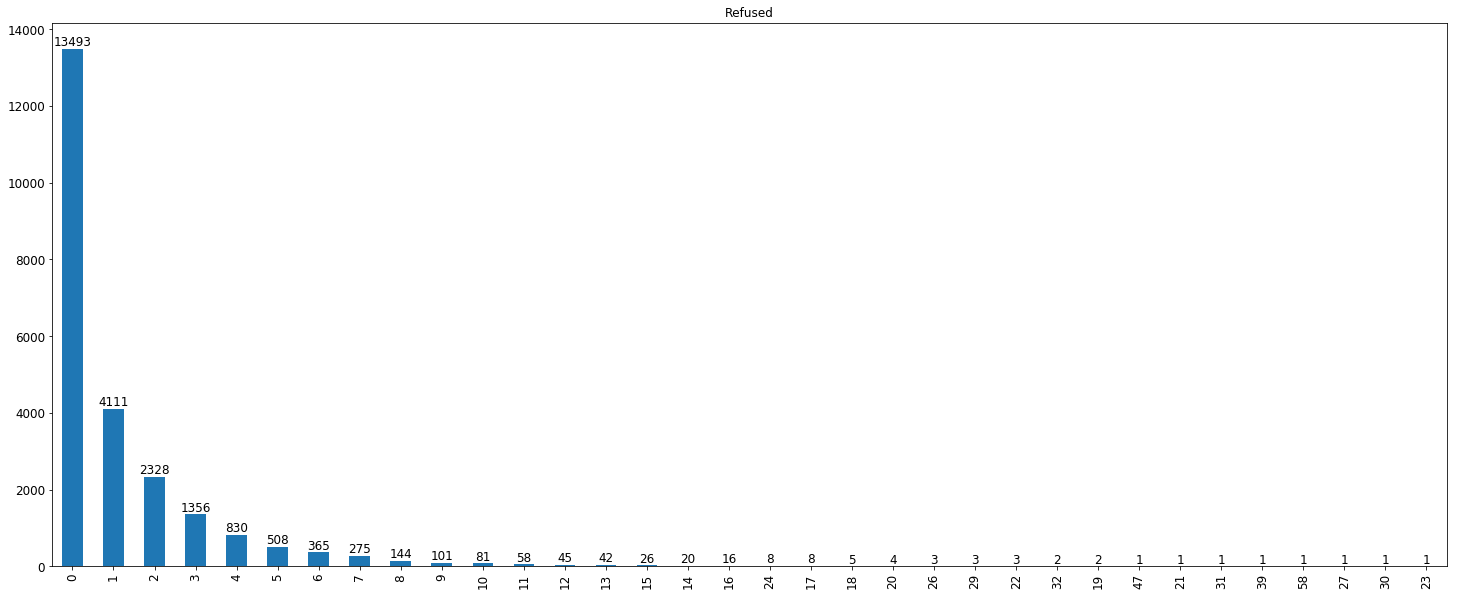

In [158]:
uniCatPLOT(df_diff,"Refused")

In [159]:
precentagedata(df_diff,"Refused",0)
precentagedata(df_others,"Refused",0)


56.586286433214504
66.34058350672875


Previously more loans refused for clients facing difficulty in repayment

Following are strongest influencers:-
    
    1) Precentage of Annuity with respect to goods price
    2) Region population relative
    3) Age of the applicant
    4) Score external source 02
    5) Score external source 03
    6) Number of previous refusals
    7) Education level

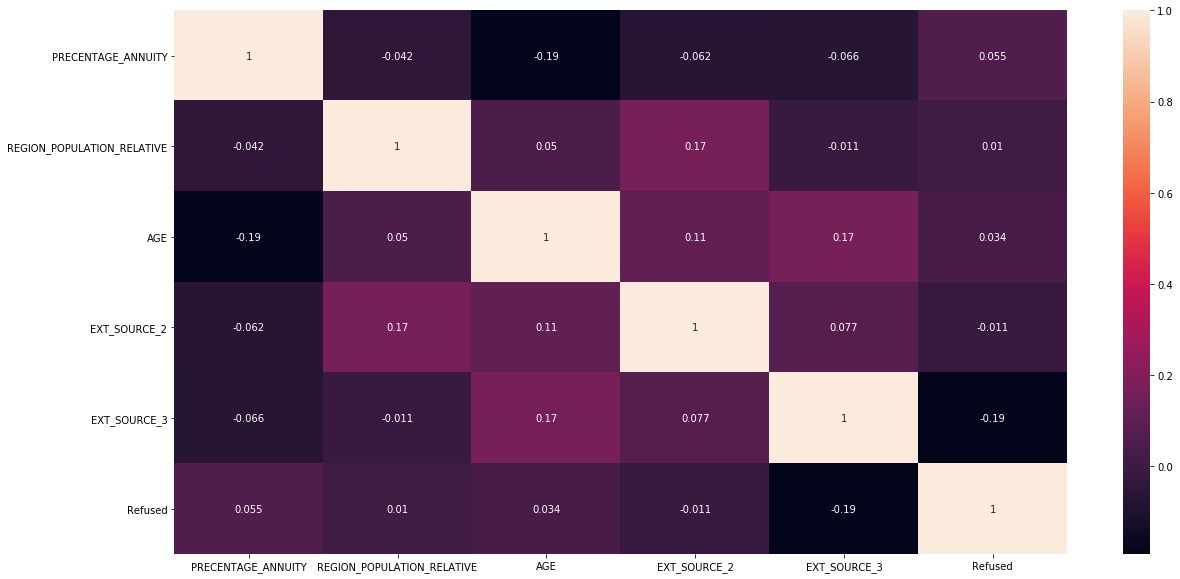

In [160]:
#Now lets look at the correlation between these variable to see if we can gather any insights
cols_top_influ=['PRECENTAGE_ANNUITY','PRECENTAGE_ANNUITY_BIN','REGION_POPULATION_RELATIVE','REGION_POPULATION_RELATIVE_BIN','AGE','AGE_BIN','EXT_SOURCE_2','EXT_SOURCE_2_BIN','EXT_SOURCE_3','EXT_SOURCE_3_BIN','Refused']
plt.figure(figsize=(20,10))
sns.heatmap(df_diff[cols_top_influ].corr(method='pearson'), annot=True)

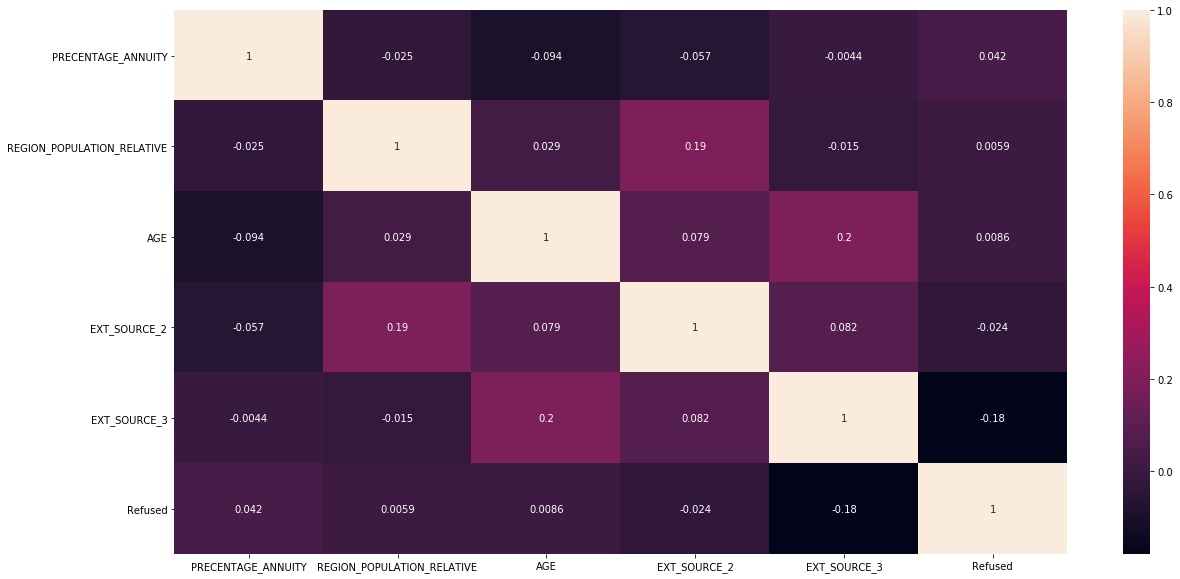

In [161]:
plt.figure(figsize=(20,10))
sns.heatmap(df_others[cols_top_influ].corr(method='pearson'), annot=True)

Correlation amongst selected variables is low whcih mean they can used indivisually for identidifying applicants that might face difficulty in loan repayment 


In [162]:
#Let look at pivot tables to see if we can find any insights based on the bins created
df_diff.pivot_table(values = 'EXT_SOURCE_2', 
                      index = 'AGE_BIN',
                    columns = 'PRECENTAGE_ANNUITY_BIN',
                      aggfunc = 'mean')

PRECENTAGE_ANNUITY_BIN,1-2,2-5,5-10,10-25
AGE_BIN,,,,
20-25,nan,0.3560,0.3202,0.3299
25-30,nan,0.4034,0.3720,0.3623
30-40,0.5914,0.4193,0.3935,0.4077
40-50,nan,0.4474,0.4269,0.4366
50-60,nan,0.4467,0.4347,0.4282
60-100,nan,0.4253,0.4176,0.3867


For applicant having difficulty in payments suprising avg score of 0.59 with low annuity precentage in the age group 30-40